# Primary Election Voter Turnout Predictions through Demographic Research 

Group Members:
* Amrit Abhilash
* Bhavesh Sharma
* Sihoon Yu
* Haiyuan Zhang
* Jonathan Sherman
* Rohan Gupte

##  Introduction  Proposal and Objective

During a Presidential voting year, each state first holds a presidential primary vote for each party to help select which candidate they want their state to back as their presidential candidate. A candidates’ campaign can end earlier than expected if they do not do well early in the first few states that hold their primary election. Iowa, which historically holds the first primary, can be the big benchmark for a candidate on their chances.

Our initial attempt for the first iteration of this project was to dig into key identified demographics from the states selected that are missing from the primary election to help parties identify and target these groups to better show out. However, through the results of our EDA, we found our problem definition to be too vague and hard to find a set path to create results.

Though our EDA did not show clearly who did not arrive, we will pivot to help the main parties presidential candidates in the U.S. predict who will show up to the early U.S. primaries. Each group researching the key demographics of income, ethnicity, and public services will search to find the strongest features in predicting who showed up at the most recent Iowa Presidential primary. We will then test these predicators on more states to see if they can help candidates predict and prepare who likely will show for the next Presidential Primary in 2024 so they can being their campaigns with a strong start by knowing who they need to convince to vote for them.

## Data Source
https://console.cloud.google.com/storage/browser/car-l2-voter-files;tab=objects?prefix=&forceOnObjectsSortingFiltering=false

States Used: Iowa (IA), New Hamshipre (NH) , Nevada (NV)


In [57]:
data = "gs://state_voter_info/"

In [2]:
#libraries
from pyspark.sql import functions as F

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import pandas as pd
import numpy as np
from pyspark.sql.functions import *

In [58]:
df = spark.read.format("csv")\
 .option("header", "true")\
 .option("nullValue", "NA")\
 .option("delimiter","\t")\
 .option("inferSchema", "true")\
 .load(data + "VM2Uniform--IA--2021-03-04.tab")

In [55]:
# Custom columns for ethnics dataframe
columns_ethnic=['SEQUENCE',
'LALVOTERID',
'Voters_Active',
'Voters_StateVoterID',
'Voters_CountyVoterID',
'Ethnic_Description',
'Parties_Description',
'EthnicGroups_EthnicGroup1Desc',
'CountyEthnic_LALEthnicCode',
'CountyEthnic_Description',
'US_Congressional_District',
'AddressDistricts_Change_Changed_CD',
'State_Senate_District',
'AddressDistricts_Change_Changed_SD',
'State_House_District',
'AddressDistricts_Change_Changed_HD',
'State_Legislative_District',
'AddressDistricts_Change_Changed_LD',
'2001_US_Congressional_District',
'2001_State_Senate_District',
'2001_State_House_District',
'2001_State_Legislative_District',
'County',
'Residence_Addresses_State',
'Voters_FIPS',
'AddressDistricts_Change_Changed_County',
'CommercialDataLL_Donates_to_Conservative_Causes',
'CommercialDataLL_Donates_to_Healthcare',
'CommercialDataLL_Donates_to_International_Aid_Causes',
'CommercialDataLL_Donates_to_Liberal_Causes',
'CommercialDataLL_Donates_to_Local_Community',
'CommercialDataLL_Donates_to_Veterans_Causes',
'ElectionReturns_G08_Cnty_Margin_McCain_R',
'ElectionReturns_G08_Cnty_Percent_McCain_R',
'ElectionReturns_G08_Cnty_Vote_McCain_R',
'ElectionReturns_G08_Cnty_Margin_Obama_D',
'ElectionReturns_G08_Cnty_Percent_Obama_D',
'ElectionReturns_G08_Cnty_Vote_Obama_D',
'ElectionReturns_G08CountyTurnoutAllRegisteredVoters',
'ElectionReturns_G08CountyTurnoutDemocrats',
'ElectionReturns_G08CountyTurnoutIndependentsAllOthers',
'ElectionReturns_G08CountyTurnoutRepublicans',
'ElectionReturns_G08PrecinctTurnoutAllRegisteredVoters',
'ElectionReturns_G08PrecinctTurnoutDemocrats',
'ElectionReturns_G08PrecinctTurnoutIndependentsAllOthers',
'ElectionReturns_G08PrecinctTurnoutRepublicans',
'ElectionReturns_G12_Cnty_Margin_Obama_D',
'ElectionReturns_G12_Cnty_Percent_Obama_D',
'ElectionReturns_G12_Cnty_Vote_Obama_D',
'ElectionReturns_G12_Cnty_Margin_Romney_R',
'ElectionReturns_G12_Cnty_Percent_Romney_R',
'ElectionReturns_G12_Cnty_Vote_Romney_R',
'ElectionReturns_G12CountyTurnoutAllRegisteredVoters',
'ElectionReturns_G12CountyTurnoutDemocrats',
'ElectionReturns_G12CountyTurnoutIndependentsAllOthers',
'ElectionReturns_G12CountyTurnoutRepublicans',
'ElectionReturns_G12PrecinctTurnoutAllRegisteredVoters',
'ElectionReturns_G12PrecinctTurnoutDemocrats',
'ElectionReturns_G12PrecinctTurnoutIndependentsAllOthers',
'ElectionReturns_G12PrecinctTurnoutRepublicans',
'ElectionReturns_G16CountyTurnoutAllRegisteredVoters',
'ElectionReturns_G16CountyTurnoutDemocrats',
'ElectionReturns_G16CountyTurnoutIndependentsAllOthers',
'ElectionReturns_G16CountyTurnoutRepublicans',
'ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters',
'ElectionReturns_G16PrecinctTurnoutDemocrats',
'ElectionReturns_G16PrecinctTurnoutIndependentsAllOthers',
'ElectionReturns_G16PrecinctTurnoutRepublicans',
'ElectionReturns_P08CountyTurnoutAllRegisteredVoters',
'ElectionReturns_P08CountyTurnoutDemocrats',
'ElectionReturns_P08CountyTurnoutRepublicans',
'ElectionReturns_P08PrecinctTurnoutAllRegisteredVoters',
'ElectionReturns_P08PrecinctTurnoutDemocrats',
'ElectionReturns_P08PrecinctTurnoutRepublicans',
'ElectionReturns_P12CountyTurnoutAllRegisteredVoters',
'ElectionReturns_P12CountyTurnoutDemocrats',
'ElectionReturns_P12CountyTurnoutRepublicans',
'ElectionReturns_P12PrecinctTurnoutAllRegisteredVoters',
'ElectionReturns_P12PrecinctTurnoutDemocrats',
'ElectionReturns_P12PrecinctTurnoutRepublicans',
'General_2020',
'Primary_2020',
'PresidentialPrimary_2020',
'General_2016',
'Primary_2016',
'PresidentialPrimary_2016',
'General_2012',
'Primary_2012',
'PresidentialPrimary_2012',
'General_2008',
'Primary_2008',
'PresidentialPrimary_2008',
'General_2004',
'Primary_2004',
'PresidentialPrimary_2004',
'General_2000',
'Primary_2000',
'PresidentialPrimary_2000',
]

In [538]:
# Load custom columns into df_ethnics dataframe
from pyspark.sql.functions import *
df_ethnic = df.select(*columns_ethnic)


In [539]:
# Drop null ethnic records
from pyspark.sql.functions import *
df_ethnic= df_ethnic.na.drop(subset=["Ethnic_Description"])

In [540]:
# Drop duplicates and cache dataset
df_ethnic = df_ethnic.drop_duplicates()
df_ethnic.cache()

22/05/01 20:14:08 WARN org.apache.spark.sql.execution.CacheManager: Asked to cache already cached data.


DataFrame[SEQUENCE: int, LALVOTERID: string, Voters_Active: string, Voters_StateVoterID: int, Voters_CountyVoterID: string, Ethnic_Description: string, Parties_Description: string, EthnicGroups_EthnicGroup1Desc: string, CountyEthnic_LALEthnicCode: string, CountyEthnic_Description: string, US_Congressional_District: int, AddressDistricts_Change_Changed_CD: string, State_Senate_District: int, AddressDistricts_Change_Changed_SD: string, State_House_District: int, AddressDistricts_Change_Changed_HD: string, State_Legislative_District: string, AddressDistricts_Change_Changed_LD: string, 2001_US_Congressional_District: int, 2001_State_Senate_District: int, 2001_State_House_District: int, 2001_State_Legislative_District: string, County: string, Residence_Addresses_State: string, Voters_FIPS: int, AddressDistricts_Change_Changed_County: string, CommercialDataLL_Donates_to_Conservative_Causes: string, CommercialDataLL_Donates_to_Healthcare: string, CommercialDataLL_Donates_to_International_Aid_

In [541]:
#Replace all null values with 'N'

df_ethnic = df_ethnic.na.fill(value='N',subset=['General_2020',
'Primary_2020',
'PresidentialPrimary_2020',
'General_2016',
'Primary_2016',
'PresidentialPrimary_2016',
'General_2012',
'Primary_2012',
'PresidentialPrimary_2012',
'General_2008',
'Primary_2008',
'PresidentialPrimary_2008',
'General_2004',
'Primary_2004',
'PresidentialPrimary_2004',
'General_2000',
'Primary_2000',
'PresidentialPrimary_2000'])



# Iowa

## Iowa Ethnic EDA

### Iowa Ethnic Demographic Voter Turnout Summary 

In [542]:
# Split-up primary votes by years and decision and aggegate by Ethnic group

import pyspark.sql.functions as F


df_ethnic_P2020count_Y=df_ethnic.filter(F.col('Primary_2020')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2020').alias('P_Y_Count20'))
df_ethnic_P2020count_N=df_ethnic.filter(F.col('Primary_2020')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2020').alias('P_N_Count20'))
df_ethnic_P2016count_Y=df_ethnic.filter(F.col('Primary_2016')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2016').alias('P_Y_Count16'))
df_ethnic_P2016count_N=df_ethnic.filter(F.col('Primary_2016')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2016').alias('P_N_Count16'))
df_ethnic_G2020count_Y=df_ethnic.filter(F.col('General_2020')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2020').alias('G_Y_Count20'))
df_ethnic_G2020count_N=df_ethnic.filter(F.col('General_2020')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2020').alias('G_N_Count20'))
df_ethnic_G2016count_Y=df_ethnic.filter(F.col('General_2016')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2016').alias('G_Y_Count16'))
df_ethnic_G2016count_N=df_ethnic.filter(F.col('General_2016')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2016').alias('G_N_Count16'))



In [543]:
# Total count of 'Y' for last two general and primary elections  across EthnicGroups

df_total_vote_Y = df_ethnic_G2020count_Y.join(df_ethnic_P2020count_Y,["EthnicGroups_EthnicGroup1Desc"])\
            .join(df_ethnic_G2016count_Y,["EthnicGroups_EthnicGroup1Desc"])\
            .join(df_ethnic_P2016count_Y,["EthnicGroups_EthnicGroup1Desc"])
    
df_total_vote_Y.show(truncate=False)

+-----------------------------+-----------+-----------+-----------+-----------+
|EthnicGroups_EthnicGroup1Desc|G_Y_Count20|P_Y_Count20|G_Y_Count16|P_Y_Count16|
+-----------------------------+-----------+-----------+-----------+-----------+
|East and South Asian         |22636      |5419       |15492      |1202       |
|European                     |1377779    |441538     |1178451    |157504     |
|Other                        |20015      |5332       |15900      |1558       |
|Likely African-American      |15972      |5014       |13362      |1338       |
|Hispanic and Portuguese      |46759      |9571       |35275      |2300       |
+-----------------------------+-----------+-----------+-----------+-----------+



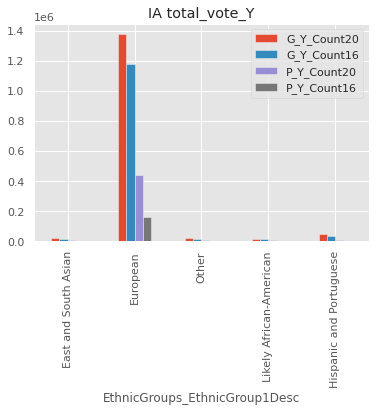

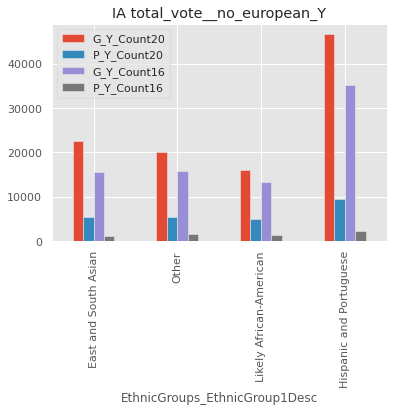

In [544]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd




# Plot primary election 'Y' totals

df_total_votes_Y = df_total_vote_Y.toPandas()

df = df_total_votes_Y.set_index('EthnicGroups_EthnicGroup1Desc')
df[["G_Y_Count20", "G_Y_Count16", "P_Y_Count20", "P_Y_Count16"]].plot.bar()
plt.title("IA total_vote_Y");

# Take a closer look at no european columns  
no_euro = df_total_vote_Y.filter("EthnicGroups_EthnicGroup1Desc != 'European'")
no_euro = no_euro.toPandas()

df = no_euro.set_index('EthnicGroups_EthnicGroup1Desc')
df[["G_Y_Count20", "P_Y_Count20", "G_Y_Count16", "P_Y_Count16"]].plot.bar()
plt.title('IA total_vote__no_european_Y');





There is a overall declin between the primary and general elections overall. This is expected as the percieved most important election (general) will always draw a bigger crowd. Overall particaptaion has gone up over the last two Election cycles. Both parties and the state can utilize social media to do a better job promoting the goal to go vote 

### Democratic Party breakdown by group

In [545]:
# Total count of 'Y' for all primaries across EthnicGroups for Dems
df_ethnic_dems = df_ethnic.filter(df_ethnic.Parties_Description == 'Democratic')
df_ethnic_rep = df_ethnic.filter(df_ethnic.Parties_Description == 'Republican')
df_ethnic_other = df_ethnic.filter( (df_ethnic.Parties_Description !='Republican') & (df_ethnic.Parties_Description !='Democratic') )



In [546]:
# Split-up primary Dem votes by years and decision and aggegate by Ethnic group

import pyspark.sql.functions as F


df_ethnic_P2020count_Y=df_ethnic_dems.filter(F.col('Primary_2020')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2020').alias('P_Y_Count20'))
df_ethnic_P2020count_N=df_ethnic_dems.filter(F.col('Primary_2020')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2020').alias('P_N_Count20'))
df_ethnic_P2016count_Y=df_ethnic_dems.filter(F.col('Primary_2016')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2016').alias('P_Y_Count16'))
df_ethnic_P2016count_N=df_ethnic_dems.filter(F.col('Primary_2016')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2016').alias('P_N_Count16'))
df_ethnic_G2020count_Y=df_ethnic_dems.filter(F.col('General_2020')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2020').alias('G_Y_Count20'))
df_ethnic_G2020count_N=df_ethnic_dems.filter(F.col('General_2020')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2020').alias('G_N_Count20'))
df_ethnic_G2016count_Y=df_ethnic_dems.filter(F.col('General_2016')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2016').alias('G_Y_Count16'))
df_ethnic_G2016count_N=df_ethnic_dems.filter(F.col('General_2016')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2016').alias('G_N_Count16'))






In [547]:
# Dems that voted in primaries by ethnic group

df_dems_total_vote_Y = df_ethnic_G2020count_Y.join(df_ethnic_P2020count_Y,["EthnicGroups_EthnicGroup1Desc"])\
            .join(df_ethnic_G2016count_Y,["EthnicGroups_EthnicGroup1Desc"])\
            .join(df_ethnic_P2016count_Y,["EthnicGroups_EthnicGroup1Desc"])
df_dems_total_vote_Y.show(truncate=False)

+-----------------------------+-----------+-----------+-----------+-----------+
|EthnicGroups_EthnicGroup1Desc|G_Y_Count20|P_Y_Count20|G_Y_Count16|P_Y_Count16|
+-----------------------------+-----------+-----------+-----------+-----------+
|East and South Asian         |9548       |3463       |6881       |675        |
|European                     |458400     |227533     |404803     |75938      |
|Other                        |9316       |3547       |7617       |948        |
|Likely African-American      |13713      |4885       |11801      |1294       |
|Hispanic and Portuguese      |23914      |6969       |18683      |1475       |
+-----------------------------+-----------+-----------+-----------+-----------+



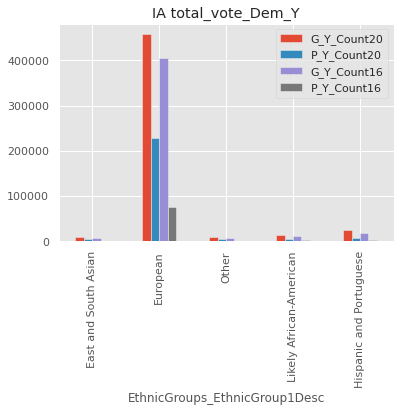

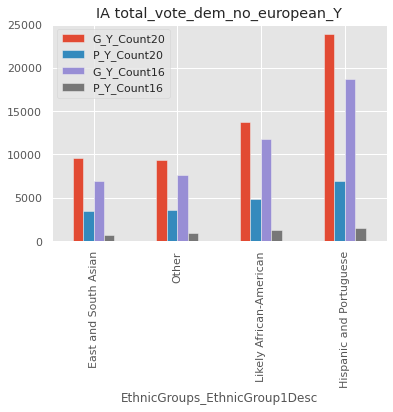

In [548]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd




# Plot total vote election Dem 'Y' totals

pd_df_total_vote_Y = df_dems_total_vote_Y.toPandas()

df = pd_df_total_vote_Y.set_index('EthnicGroups_EthnicGroup1Desc')
df[["G_Y_Count20", "P_Y_Count20", "G_Y_Count16", "P_Y_Count16"]].plot.bar()
plt.title('IA total_vote_Dem_Y');


# Take a closer look at no european columns  
dem_no_euro = df_dems_total_vote_Y.filter("EthnicGroups_EthnicGroup1Desc != 'European'")
dem_no_euro = dem_no_euro.toPandas()

df = dem_no_euro.set_index('EthnicGroups_EthnicGroup1Desc')
df[["G_Y_Count20", "P_Y_Count20", "G_Y_Count16", "P_Y_Count16"]].plot.bar()
plt.title('IA total_vote_dem_no_european_Y');




Same trend as the total election numbers, low turnout for prior years for primaries, 
with a stark increase in 2020. Moving forward we can identify which specific 
'Ethnic_Description' show up to primaries and which don't. 

General elections tend to have an increase in voter turnout for democrats. Moving forward we can look to see which groups tend not to vote for both primaries and general elections and making suggestions to candidate to focus their efforts on these unreached populations.


### Republican Party breakdown by group

In [549]:
# Split-up primary Rep votes by years and decision and aggegate by Ethnic group

import pyspark.sql.functions as F


df_ethnic_P2020count_Y=df_ethnic_rep.filter(F.col('Primary_2020')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2020').alias('P_Y_Count20'))
df_ethnic_P2020count_N=df_ethnic_rep.filter(F.col('Primary_2020')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2020').alias('P_N_Count20'))
df_ethnic_P2016count_Y=df_ethnic_rep.filter(F.col('Primary_2016')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2016').alias('P_Y_Count16'))
df_ethnic_P2016count_N=df_ethnic_rep.filter(F.col('Primary_2016')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2016').alias('P_N_Count16'))
df_ethnic_G2020count_Y=df_ethnic_rep.filter(F.col('General_2020')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2020').alias('G_Y_Count20'))
df_ethnic_G2020count_N=df_ethnic_rep.filter(F.col('General_2020')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2020').alias('G_N_Count20'))
df_ethnic_G2016count_Y=df_ethnic_rep.filter(F.col('General_2016')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2016').alias('G_Y_Count16'))
df_ethnic_G2016count_N=df_ethnic_rep.filter(F.col('General_2016')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2016').alias('G_N_Count16'))



In [550]:
# Rep that voted in primaries by ethnic group

df_rep_total_vote_Y = df_ethnic_G2020count_Y.join(df_ethnic_P2020count_Y,["EthnicGroups_EthnicGroup1Desc"])\
            .join(df_ethnic_G2016count_Y,["EthnicGroups_EthnicGroup1Desc"])\
            .join(df_ethnic_P2016count_Y,["EthnicGroups_EthnicGroup1Desc"])
    
df_rep_total_vote_Y.show(truncate=False)

+-----------------------------+-----------+-----------+-----------+-----------+
|EthnicGroups_EthnicGroup1Desc|G_Y_Count20|P_Y_Count20|G_Y_Count16|P_Y_Count16|
+-----------------------------+-----------+-----------+-----------+-----------+
|East and South Asian         |5814       |1864       |4139       |483        |
|European                     |533020     |207879     |470266     |76172      |
|Other                        |5104       |1693       |4294       |541        |
|Likely African-American      |319        |108        |248        |26         |
|Hispanic and Portuguese      |8203       |2407       |6401       |730        |
+-----------------------------+-----------+-----------+-----------+-----------+



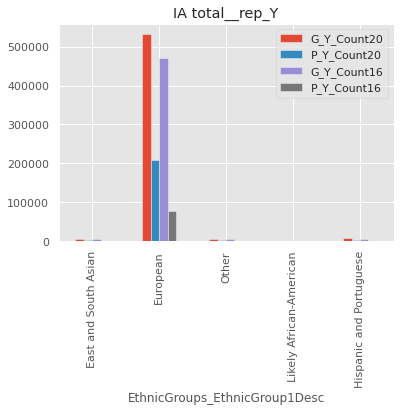

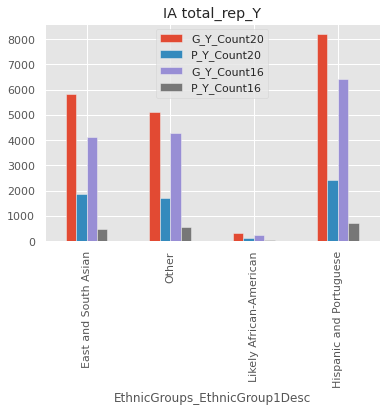

In [551]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd




# Plot primary election Rep 'Y' totals

pd_df_total_vote_Y = df_rep_total_vote_Y.toPandas()

df = pd_df_total_vote_Y.set_index('EthnicGroups_EthnicGroup1Desc')
df[["G_Y_Count20", "P_Y_Count20", "G_Y_Count16", "P_Y_Count16"]].plot.bar()
plt.title('IA total__rep_Y');

# Take a closer look at no european columns  
rep_no_euro = df_rep_total_vote_Y.filter("EthnicGroups_EthnicGroup1Desc != 'European'")
rep_no_euro = rep_no_euro.toPandas()

df = rep_no_euro.set_index('EthnicGroups_EthnicGroup1Desc')
df[["G_Y_Count20", "P_Y_Count20", "G_Y_Count16", "P_Y_Count16"]].plot.bar()
plt.title('IA total_rep_Y');





Overall, increase in number of minority groups has increased in the republican party in Iowa. They still are small in numbers and rarely vote in Primaries. Candidates could find an edge by trying to appeal to minority groups in Iowa, primimary, but the very dominant european heavy demographic would predict that increase their participation in the primary would be a safer bet.

## Ethnic model 

In [19]:
df_ml = df_ethnic.select(
'Parties_Description',
'Ethnic_Description',
'Primary_2020')
df_ml= df_ml.na.fill(value='N')
#'Ethnic_Description', 'EthnicGroups_EthnicGroup1Desc','General_2020','County','Residence_Addresses_State','Voters_FIPS',

In [20]:
[(c, df_ml.where(col(c).isNull()).count()) for c in df_ml.columns]

[('Parties_Description', 0), ('Ethnic_Description', 0), ('Primary_2020', 0)]

### Model for training and predicting on primaries

## Dem Presidential Primary 2020

In [21]:
df_ml_dem=df_ml.filter(df_ml.Parties_Description == 'Democratic')

df_ml_dem = df_ml_dem.drop('Parties_Description')




df_ml_dem.printSchema



<bound method DataFrame.printSchema of DataFrame[Ethnic_Description: string, Primary_2020: string]>

In [22]:
from pyspark.ml.feature import RFormula

supervised = RFormula(formula="Primary_2020 ~ .")

print(supervised)

RFormula(Primary_2020 ~ .) (uid=RFormula_fba3faab4ad4)


In [23]:
df_ml_dem.select(
'Ethnic_Description',
'Primary_2020').distinct().show()

+-------------------+------------+
| Ethnic_Description|Primary_2020|
+-------------------+------------+
|       Indian/Hindu|           Y|
|              Irish|           N|
|            Turkish|           Y|
|          Slovakian|           Y|
|          Bulgarian|           Y|
|              Irish|           Y|
|Dutch (Netherlands)|           Y|
|            Chinese|           Y|
|            Laotian|           N|
|         Portuguese|           N|
|            Italian|           Y|
|            Swedish|           N|
|            Serbian|           N|
|     Bosnian Muslim|           N|
|             German|           N|
|           Armenian|           Y|
|            Chinese|           N|
|            Turkish|           N|
|      English/Welsh|           Y|
|         Portuguese|           Y|
+-------------------+------------+
only showing top 20 rows



In [24]:
import pandas as pd
import numpy as np
from pyspark.sql.functions import *
fittedRF = supervised.fit(df_ml_dem)

In [25]:
import pandas as pd
import numpy as np
from pyspark.sql.functions import *

preparedDF = fittedRF.transform(df_ml_dem)

In [26]:
preparedDF.select('features', 'label').distinct().show( truncate=False)

+---------------+-----+
|features       |label|
+---------------+-----+
|(75,[43],[1.0])|1.0  |
|(75,[37],[1.0])|0.0  |
|(75,[2],[1.0]) |1.0  |
|(75,[10],[1.0])|0.0  |
|(75,[34],[1.0])|0.0  |
|(75,[50],[1.0])|1.0  |
|(75,[32],[1.0])|1.0  |
|(75,[15],[1.0])|1.0  |
|(75,[8],[1.0]) |0.0  |
|(75,[5],[1.0]) |0.0  |
|(75,[1],[1.0]) |0.0  |
|(75,[45],[1.0])|0.0  |
|(75,[4],[1.0]) |0.0  |
|(75,[20],[1.0])|1.0  |
|(75,[2],[1.0]) |0.0  |
|(75,[38],[1.0])|0.0  |
|(75,[6],[1.0]) |0.0  |
|(75,[41],[1.0])|0.0  |
|(75,[57],[1.0])|1.0  |
|(75,[4],[1.0]) |1.0  |
+---------------+-----+
only showing top 20 rows



In [27]:
featureCols = pd.DataFrame(preparedDF.schema["features"].metadata["ml_attr"]["attrs"]["binary"]+
  preparedDF.schema["features"].metadata["ml_attr"]["attrs"]["binary"]).sort_values("idx")

featureCols = featureCols.set_index('idx')
featureCols.head(15)


,name
idx,
0,Ethnic_Description_English/Welsh
0,Ethnic_Description_English/Welsh
1,Ethnic_Description_German
1,Ethnic_Description_German
2,Ethnic_Description_Irish
2,Ethnic_Description_Irish
3,Ethnic_Description_Scots
3,Ethnic_Description_Scots
4,Ethnic_Description_Hispanic


In [28]:
train, test = preparedDF.randomSplit([0.7, 0.3], seed = 891)

In [463]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(regParam = .01,threshold=.7)

In [30]:
print(lr.explainParams())

aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)
family: The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial (default: auto)
featuresCol: features column name. (default: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label)
lowerBoundsOnCoefficients: The lower bounds on coefficients if fitting under bound constrained optimization. The bound matrix must be compatible with the shape (1, number of features) for binomial regression, or (number of classes, number of features) for multinomial regression. (undefined)
lowerBoundsOnIntercepts: The lower bounds on intercepts if fitting under bound constrained optimization. The bounds vector size must beequal wi

In [31]:
lrModel = lr.fit(train)

22/05/01 13:48:33 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
22/05/01 13:48:33 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


In [32]:
coefsArray = np.array(lrModel.coefficients)  # convert to np.array
coefsDF = pd.DataFrame(coefsArray, columns=['coefs'])  # to pandas

coefsDF = coefsDF.merge(featureCols, left_index=True, right_index=True)  # join it with featureCols we created above
coefsDF.sort_values('coefs', inplace=True)  # Sort them
coefsDF.head(100)



,coefs,name
65,-3.031032,Ethnic_Description_Bhutanese
65,-3.031032,Ethnic_Description_Bhutanese
66,-3.031030,Ethnic_Description_Chechnian
66,-3.031030,Ethnic_Description_Chechnian
69,-3.031030,Ethnic_Description_Azerb
...,...,...
17,0.134055,Ethnic_Description_Danish
60,0.140508,Ethnic_Description_Bangladeshi
60,0.140508,Ethnic_Description_Bangladeshi
54,0.140508,Ethnic_Description_Sri Lankan


In [33]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
print(coefsDF)

       coefs                                                        name
65 -3.031032  Ethnic_Description_Bhutanese                              
65 -3.031032  Ethnic_Description_Bhutanese                              
66 -3.031030  Ethnic_Description_Chechnian                              
66 -3.031030  Ethnic_Description_Chechnian                              
69 -3.031030  Ethnic_Description_Azerb                                  
69 -3.031030  Ethnic_Description_Azerb                                  
68 -3.031030  Ethnic_Description_Australian                             
68 -3.031030  Ethnic_Description_Australian                             
74 -3.031028  Ethnic_Description_Malay                                  
67 -3.031028  Ethnic_Description_Mongolian                              
67 -3.031028  Ethnic_Description_Mongolian                              
74 -3.031028  Ethnic_Description_Malay                                  
73 -3.031028  Ethnic_Description_Kirghiz           

/tmp/ipykernel_2563/2581669713.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [34]:
summary = lrModel.summary

Text(0, 0.5, 'precision')

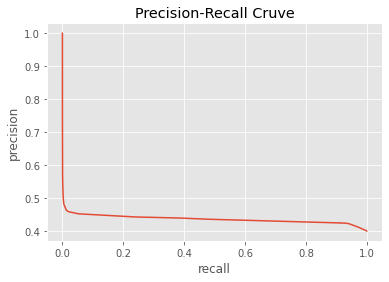

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pr = summary.pr.toPandas()
pr.plot(x='recall', y='precision', style='-', legend=False)
plt.title('Precision-Recall Cruve')
plt.ylabel('precision')

In [36]:
lrModel.params

[Param(parent='LogisticRegression_9c9e84db6bcd', name='aggregationDepth', doc='suggested depth for treeAggregate (>= 2).'),
 Param(parent='LogisticRegression_9c9e84db6bcd', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'),
 Param(parent='LogisticRegression_9c9e84db6bcd', name='family', doc='The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial'),
 Param(parent='LogisticRegression_9c9e84db6bcd', name='featuresCol', doc='features column name.'),
 Param(parent='LogisticRegression_9c9e84db6bcd', name='fitIntercept', doc='whether to fit an intercept term.'),
 Param(parent='LogisticRegression_9c9e84db6bcd', name='labelCol', doc='label column name.'),
 Param(parent='LogisticRegression_9c9e84db6bcd', name='lowerBoundsOnCoefficients', doc='The lower bounds on coefficients if fitting under bound cons

In [37]:
# Your answer goes here
fittedTest = lrModel.transform(test)

In [38]:
fittedTest.select("label", "prediction", "rawPrediction").show(30, False)
fittedTest.select('prediction').distinct()

+-----+----------+------------------------------------------+
|label|prediction|rawPrediction                             |
+-----+----------+------------------------------------------+
|0.0  |0.0       |[1.176504343742217,-1.176504343742217]    |
|0.0  |0.0       |[1.176504343742217,-1.176504343742217]    |
|0.0  |0.0       |[1.176504343742217,-1.176504343742217]    |
|0.0  |0.0       |[1.176504343742217,-1.176504343742217]    |
|0.0  |0.0       |[1.176504343742217,-1.176504343742217]    |
|0.0  |0.0       |[1.176504343742217,-1.176504343742217]    |
|0.0  |0.0       |[1.176504343742217,-1.176504343742217]    |
|0.0  |0.0       |[1.176504343742217,-1.176504343742217]    |
|1.0  |0.0       |[1.176504343742217,-1.176504343742217]    |
|0.0  |0.0       |[0.38581394168596067,-0.38581394168596067]|
|0.0  |0.0       |[0.20960776639285122,-0.20960776639285122]|
|1.0  |0.0       |[0.20960776639285122,-0.20960776639285122]|
|1.0  |0.0       |[0.20960776639285122,-0.20960776639285122]|
|1.0  |0

DataFrame[prediction: double]

In [39]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

aucEvaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')

In [40]:
# Your answer goes here
print('Test AUC:', aucEvaluator.evaluate(lrModel.transform(test)))
print('Train AUC:', summary.areaUnderROC)

Test AUC: 0.5565069888396259
Train AUC: 0.5555627771731856


## Rep Presidential Primary 2020


In [41]:
df_ml_rep=df_ml.filter(df_ml.Parties_Description == 'Republican')

df_ml_rep = df_ml_rep.drop('Parties_Description')




df_ml_dem.printSchema



<bound method DataFrame.printSchema of DataFrame[Ethnic_Description: string, Primary_2020: string]>

In [42]:
from pyspark.ml.feature import RFormula

supervised = RFormula(formula="Primary_2020 ~ .")

print(supervised)

RFormula(Primary_2020 ~ .) (uid=RFormula_9cd2cd3a0cf8)


In [43]:
df_ml_rep.select(
'Ethnic_Description',
'Primary_2020').distinct().show()


+-------------------+------------+
| Ethnic_Description|Primary_2020|
+-------------------+------------+
|              Irish|           N|
|            Turkish|           Y|
|          Slovakian|           Y|
|          Bulgarian|           Y|
|         Vietnamese|           Y|
|              Irish|           Y|
|Dutch (Netherlands)|           Y|
|            Chinese|           Y|
|            Laotian|           N|
|            Italian|           Y|
|            Swedish|           N|
|            Serbian|           N|
|             German|           N|
|            Chinese|           N|
|    Native American|           Y|
|      English/Welsh|           Y|
|       Indian/Hindu|           Y|
|            Turkish|           N|
|         Portuguese|           N|
|           Armenian|           Y|
+-------------------+------------+
only showing top 20 rows



In [44]:
import pandas as pd
import numpy as np
from pyspark.sql.functions import *
fittedRF = supervised.fit(df_ml_rep)


In [45]:
import pandas as pd
import numpy as np
from pyspark.sql.functions import *

preparedDF = fittedRF.transform(df_ml_rep)

In [46]:
preparedDF.select('features', 'label').show( truncate=False)

+--------------+-----+
|features      |label|
+--------------+-----+
|(65,[1],[1.0])|0.0  |
|(65,[1],[1.0])|0.0  |
|(65,[0],[1.0])|0.0  |
|(65,[1],[1.0])|0.0  |
|(65,[0],[1.0])|1.0  |
|(65,[1],[1.0])|1.0  |
|(65,[1],[1.0])|0.0  |
|(65,[0],[1.0])|0.0  |
|(65,[6],[1.0])|0.0  |
|(65,[0],[1.0])|0.0  |
|(65,[9],[1.0])|1.0  |
|(65,[4],[1.0])|0.0  |
|(65,[0],[1.0])|0.0  |
|(65,[1],[1.0])|0.0  |
|(65,[5],[1.0])|0.0  |
|(65,[0],[1.0])|0.0  |
|(65,[7],[1.0])|0.0  |
|(65,[1],[1.0])|0.0  |
|(65,[5],[1.0])|0.0  |
|(65,[2],[1.0])|0.0  |
+--------------+-----+
only showing top 20 rows



In [47]:
featureCols = pd.DataFrame(preparedDF.schema["features"].metadata["ml_attr"]["attrs"]["binary"]+
  preparedDF.schema["features"].metadata["ml_attr"]["attrs"]["binary"]).sort_values("idx")

featureCols = featureCols.set_index('idx')
featureCols.head(15)

,name
idx,
0,Ethnic_Description_English/Welsh
0,Ethnic_Description_English/Welsh
1,Ethnic_Description_German
1,Ethnic_Description_German
2,Ethnic_Description_Irish
2,Ethnic_Description_Irish
3,Ethnic_Description_Scots
3,Ethnic_Description_Scots
4,Ethnic_Description_Dutch (Netherlands)


In [48]:
from pyspark.ml.classification import LogisticRegression
train, test = preparedDF.randomSplit([0.7, 0.3], seed = 891)

lr = LogisticRegression(threshold=.35)
lrModel = lr.fit(train)
from pyspark.ml.evaluation import BinaryClassificationEvaluator
summary = lrModel.summary
# Your answer goes here
fittedTest = lrModel.transform(test)
fittedTest.select("label", "prediction", "rawPrediction").show(30, False)


aucEvaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')
# Your answer goes here
print('Test AUC:', aucEvaluator.evaluate(lrModel.transform(test)))
print('Train AUC:', summary.areaUnderROC)

+-----+----------+------------------------------------------+
|label|prediction|rawPrediction                             |
+-----+----------+------------------------------------------+
|0.0  |0.0       |[1.1376389045160102,-1.1376389045160102]  |
|1.0  |0.0       |[1.1376389045160102,-1.1376389045160102]  |
|0.0  |0.0       |[0.7218643610323848,-0.7218643610323848]  |
|1.0  |0.0       |[0.7218643610323848,-0.7218643610323848]  |
|1.0  |0.0       |[0.7218643610323848,-0.7218643610323848]  |
|0.0  |0.0       |[0.7281787128544834,-0.7281787128544834]  |
|0.0  |0.0       |[0.7281787128544834,-0.7281787128544834]  |
|0.0  |0.0       |[0.7281787128544834,-0.7281787128544834]  |
|1.0  |0.0       |[0.7281787128544834,-0.7281787128544834]  |
|0.0  |1.0       |[0.24520074367808403,-0.24520074367808403]|
|0.0  |0.0       |[0.6521357679474716,-0.6521357679474716]  |
|1.0  |0.0       |[0.9093011162817708,-0.9093011162817708]  |
|1.0  |0.0       |[0.9093011162817708,-0.9093011162817708]  |
|0.0  |0

Test AUC: 0.5243629838651362


Train AUC: 0.5232984163672019


## Iowa Income EDA

In [76]:
## Income Demographic columns

income = df.select('SEQUENCE',
'LALVOTERID',
'Voters_Active',
'Voters_StateVoterID',
'Voters_CountyVoterID',
'Parties_Description',
'Mailing_Addresses_City',
'Mailing_Addresses_State',
'Mailing_Addresses_Zip',
'Mailing_Addresses_ZipPlus4',
'CommercialData_EstHomeValue','CommercialData_EstimatedHHIncome','CommercialData_EstimatedHHIncomeAmount',
'CommercialData_EstimatedAreaMedianHHIncome',
'CommercialData_HomePurchasePrice',
'CommercialData_ISPSA',
'CommercialData_LandValue',
'State_Legislative_District',
'CommercialData_AreaMedianHousingValue',
'General_2020',
'Primary_2020',
'PresidentialPrimary_2020',
'General_2016',
'Primary_2016',
'PresidentialPrimary_2016',
'General_2012',
'Primary_2012',
'PresidentialPrimary_2012',
'General_2008',
'Primary_2008',
'PresidentialPrimary_2008',
'General_2004',
'Primary_2004',
'PresidentialPrimary_2004',
'General_2000',
'Primary_2000',
'PresidentialPrimary_2000')

### Income Data Cleaning

In [77]:
import pyspark.sql.functions as f
income = income.withColumn('CommercialData_EstHomeValue', f.regexp_replace('CommercialData_EstHomeValue', '[$,]', '').cast('integer'))
income = income.withColumn('CommercialData_EstimatedHHIncome', f.regexp_replace('CommercialData_EstimatedHHIncome', '[$,]', '').cast('integer'))
income = income.withColumn('CommercialData_EstimatedHHIncomeAmount', f.regexp_replace('CommercialData_EstimatedHHIncomeAmount', '[$,]', '').cast('integer'))
income = income.withColumn('CommercialData_HomePurchasePrice', f.regexp_replace('CommercialData_HomePurchasePrice', '[$,]', '').cast('integer'))
income = income.withColumn('CommercialData_LandValue', f.regexp_replace('CommercialData_LandValue', '[$,]', '').cast('integer'))
income = income.withColumn('CommercialData_AreaMedianHousingValue', f.regexp_replace('CommercialData_AreaMedianHousingValue', '[$,]', '').cast('integer'))
income = income.withColumn('CommercialData_EstimatedAreaMedianHHIncome', f.regexp_replace('CommercialData_EstimatedAreaMedianHHIncome', '[$,]', '').cast('integer'))

In [78]:
income=income\
.withColumn('General_2020',when(income.General_2020 =='Y', 1).otherwise(0))\
.withColumn('General_2016',when(income.General_2016 =='Y', 1).otherwise(0))\
.withColumn('General_2012',when(income.General_2012 =='Y', 1).otherwise(0))\
.withColumn('General_2008',when(income.General_2008 =='Y', 1).otherwise(0))\
.withColumn('General_2004',when(income.General_2004 =='Y', 1).otherwise(0))\
.withColumn('General_2000',when(income.General_2000 =='Y', 1).otherwise(0))

In [79]:
from pyspark.sql.functions import *
from pyspark.sql.types import IntegerType
income = income.withColumn("General_2020", income["General_2020"].cast(IntegerType()))\
.withColumn("General_2016", income["General_2016"].cast(IntegerType()))\
.withColumn("General_2012", income["General_2012"].cast(IntegerType()))\
.withColumn("General_2008", income["General_2008"].cast(IntegerType()))\
.withColumn("General_2004", income["General_2004"].cast(IntegerType()))\
.withColumn("General_2000", income["General_2000"].cast(IntegerType()))

In [80]:
income=income\
.withColumn('Primary_2020',when(income.Primary_2020 =='Y', 1).otherwise(0))\
.withColumn('PresidentialPrimary_2020',when(income.PresidentialPrimary_2020 =='Y', 1).otherwise(0))\
.withColumn('Primary_2016',when(income.Primary_2016 =='Y', 1).otherwise(0))\
.withColumn('PresidentialPrimary_2016',when(income.PresidentialPrimary_2016 =='Y', 1).otherwise(0))\
.withColumn('Primary_2012',when(income.Primary_2012 =='Y', 1).otherwise(0))\
.withColumn('PresidentialPrimary_2012',when(income.PresidentialPrimary_2012 =='Y', 1).otherwise(0))\
.withColumn('Primary_2008',when(income.Primary_2008 =='Y', 1).otherwise(0))\
.withColumn('PresidentialPrimary_2008',when(income.PresidentialPrimary_2008 =='Y', 1).otherwise(0))\
.withColumn('PresidentialPrimary_2004',when(income.PresidentialPrimary_2004 =='Y', 1).otherwise(0))\
.withColumn('Primary_2004',when(income.Primary_2004 =='Y', 1).otherwise(0))\
.withColumn('Primary_2000',when(income.Primary_2000 =='Y', 1).otherwise(0))\
.withColumn('PresidentialPrimary_2000',when(income.PresidentialPrimary_2000 =='Y', 1).otherwise(0))

In [81]:
income = income.withColumn("PresidentialPrimary_2000", income["PresidentialPrimary_2000"].cast(IntegerType()))\
.withColumn("Primary_2020", income["Primary_2020"].cast(IntegerType()))\
.withColumn("PresidentialPrimary_2020", income["PresidentialPrimary_2020"].cast(IntegerType()))\
.withColumn("Primary_2016", income["Primary_2016"].cast(IntegerType()))\
.withColumn("PresidentialPrimary_2016", income["PresidentialPrimary_2016"].cast(IntegerType()))\
.withColumn("Primary_2012", income["Primary_2012"].cast(IntegerType()))\
.withColumn("PresidentialPrimary_2012", income["PresidentialPrimary_2012"].cast(IntegerType()))\
.withColumn("Primary_2008", income["Primary_2008"].cast(IntegerType()))\
.withColumn("PresidentialPrimary_2008", income["PresidentialPrimary_2008"].cast(IntegerType()))\
.withColumn("PresidentialPrimary_2004", income["PresidentialPrimary_2004"].cast(IntegerType()))\
.withColumn("Primary_2004", income["Primary_2004"].cast(IntegerType()))\
.withColumn("CommercialData_EstimatedHHIncomeAmount", income["CommercialData_EstimatedHHIncomeAmount"].cast(IntegerType()))\
.withColumn("Primary_2000", income["Primary_2000"].cast(IntegerType()))

In [82]:
import pyspark.sql.functions as F
def drop_null_columns(df):
    """
    This function drops all columns which contain null values.
    :param df: A PySpark DataFrame
    """
    null_counts = df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df.columns]).collect()[0].asDict()
    to_drop = [k for k, v in null_counts.items() if v > 2100358*.3]
    df = df.drop(*to_drop)
    return df

In [83]:
income = drop_null_columns(income)
income = income.dropna()
income.cache()

DataFrame[SEQUENCE: int, LALVOTERID: string, Voters_Active: string, Voters_StateVoterID: int, Parties_Description: string, Mailing_Addresses_City: string, Mailing_Addresses_State: string, Mailing_Addresses_Zip: int, Mailing_Addresses_ZipPlus4: int, CommercialData_EstHomeValue: int, CommercialData_EstimatedHHIncomeAmount: int, CommercialData_EstimatedAreaMedianHHIncome: int, CommercialData_ISPSA: int, CommercialData_AreaMedianHousingValue: int, General_2020: int, Primary_2020: int, PresidentialPrimary_2020: int, General_2016: int, Primary_2016: int, PresidentialPrimary_2016: int, General_2012: int, Primary_2012: int, PresidentialPrimary_2012: int, General_2008: int, Primary_2008: int, PresidentialPrimary_2008: int, General_2004: int, Primary_2004: int, PresidentialPrimary_2004: int, General_2000: int, Primary_2000: int, PresidentialPrimary_2000: int]

### Income Demographic Breakdown By Mailing Address

<AxesSubplot:xlabel='Primary_2020'>

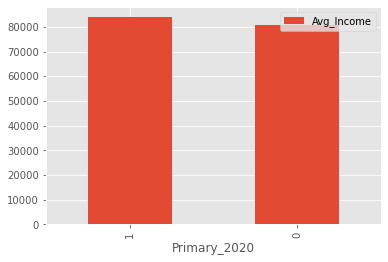

In [84]:
Pr_2020 = income.groupBy("Primary_2020").agg(F.mean('CommercialData_EstimatedAreaMedianHHIncome').alias("Avg_Income"))
Pr_2020_df = Pr_2020.toPandas()
Pr_2020_df.plot.bar(x = 'Primary_2020', y = 'Avg_Income')

<AxesSubplot:xlabel='General_2020'>

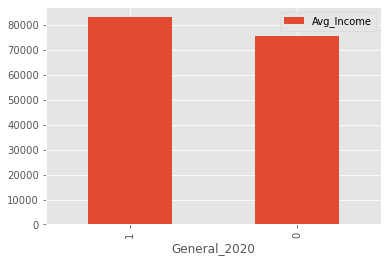

In [85]:
Gn_2020 = income.groupBy("General_2020").agg(F.mean('CommercialData_EstimatedAreaMedianHHIncome').alias("Avg_Income"))
Gn_2020_df = Gn_2020.toPandas()
Gn_2020_df.plot.bar(x = 'General_2020', y = 'Avg_Income')

<AxesSubplot:xlabel='General_2016'>

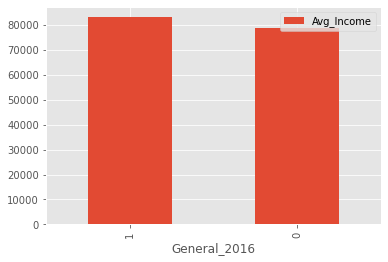

In [86]:
Gn_2016 = income.groupBy("General_2016").agg(F.mean('CommercialData_EstimatedAreaMedianHHIncome').alias("Avg_Income"))
Gn_2016_df = Gn_2016.toPandas()
Gn_2016_df.plot.bar(x = 'General_2016', y = 'Avg_Income')

<AxesSubplot:xlabel='Primary_2016'>

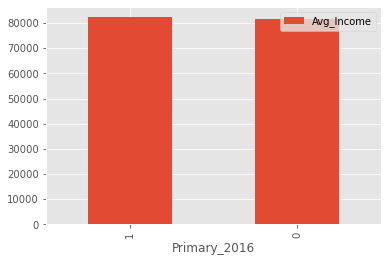

In [87]:
Pr_2016 = income.groupBy("Primary_2016").agg(F.mean('CommercialData_EstimatedAreaMedianHHIncome').alias("Avg_Income"))
Pr_2016_df = Pr_2016.toPandas()
Pr_2016_df.plot.bar(x = 'Primary_2016', y = 'Avg_Income')

### What are some of the highly correlated values that affect voter turnout?

In [88]:
ic = income.toPandas()
ic.drop(columns=["Mailing_Addresses_State","Mailing_Addresses_City"],inplace=True)

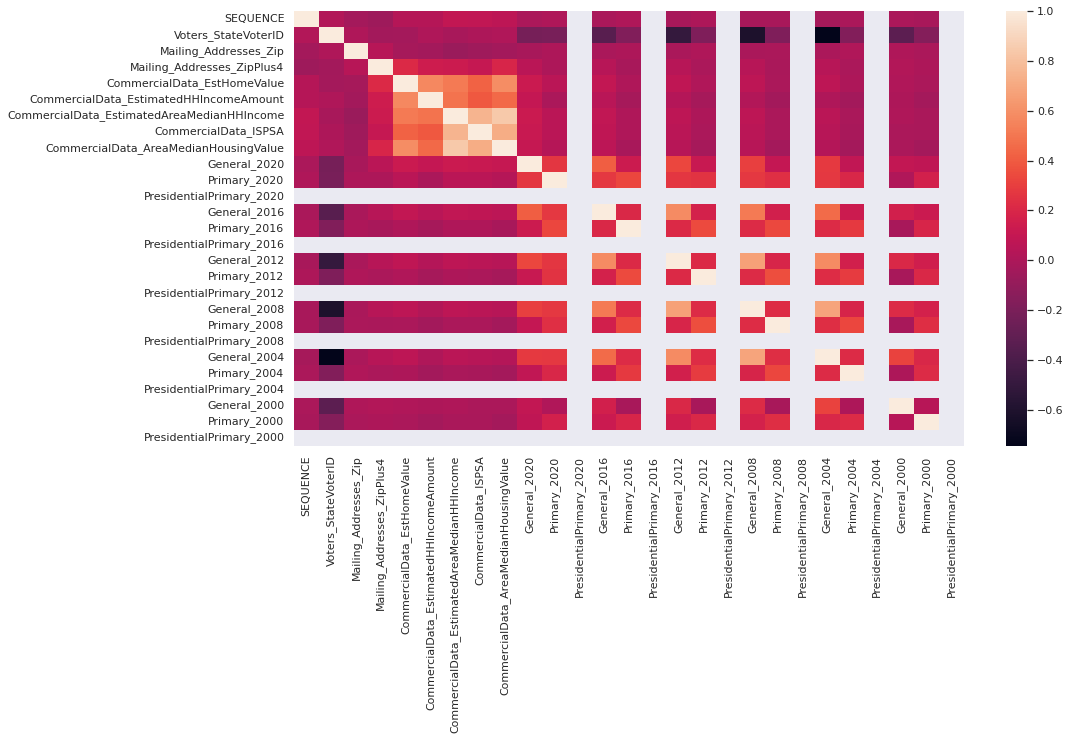

In [89]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(ic.corr())
plt.show()

From the heatmap we analyzed correlation between all the variables.
Besides from correlation in between variables related to finance,
Some of the highlights we discovered is that whether or not an individual voted in one election
is highly correlated with voter turnout in the previous election.
For instance, if you voted in the general election 2008, then you are more likely to go vote in 2012.
Using this information, politicians can target people who have voted in the previous election to secure their votes.
In order for the government to increase the turnout rate, it would be more effective for them to target ones who
did not vote in the previous one, because the ones who did are likely to vote anyways.

In [90]:
icc = income.groupBy("Mailing_Addresses_City").agg(F.mean('CommercialData_EstimatedAreaMedianHHIncome').alias("Avg_Income"),F.sum('General_2020').alias('General_2020'),
                                                   F.mean('CommercialData_AreaMedianHousingValue').alias("Avg_Housing_Value"))
iccc = icc.toPandas()
iccc = iccc.sort_values(by = 'General_2020', ascending = False).head(15)
iccc

,Mailing_Addresses_City,Avg_Income,General_2020,Avg_Housing_Value
1802,Des Moines,75941.799354,99148,155311.372900
624,Cedar Rapids,85092.063619,74611,163166.912792
1836,Davenport,72617.322162,48080,157112.391065
1827,Iowa City,95385.588295,43295,239726.837645
1809,Ankeny,107631.339357,42265,222976.302621
1237,Dubuque,80012.312730,38071,179142.895506
1807,West Des Moines,110644.131196,37322,236196.398362
1878,Sioux City,75195.776108,35153,128556.553164
8,Council Bluffs,76519.641825,31610,156480.527018
64,Ames,96477.535439,31392,211422.590763


### Does Average Income and Average Housing Value in different cities affect voter turnout?

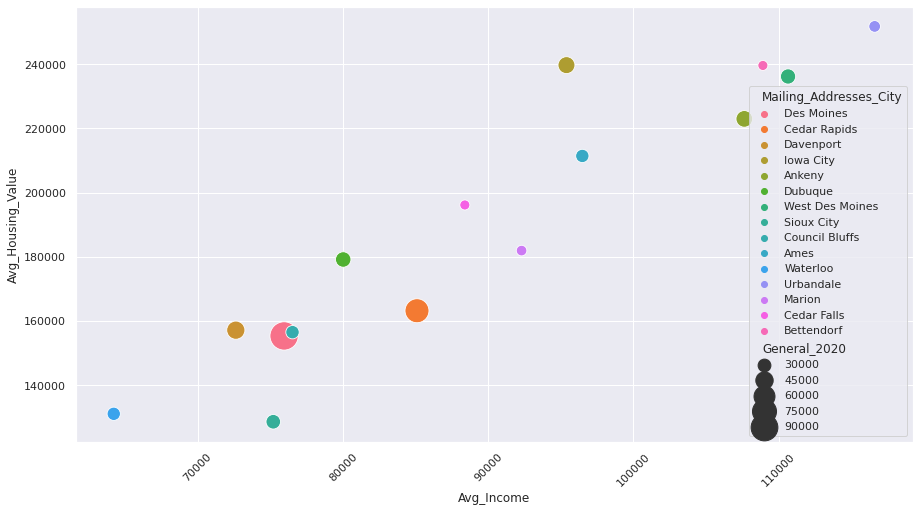

In [91]:
sns.scatterplot(x = 'Avg_Income', y='Avg_Housing_Value', hue = 'Mailing_Addresses_City', size = 'General_2020', sizes=(100, 800), data = iccc)
plt.xticks(rotation=45)
plt.show()

In General 2020 Election there does not seem to be any pattern of specific cities average income and value that shows voting habits. Overall the wealthiest cities in Iowa do not turn out in high rates to votes while lower end of middle income cities have some cities like that turn out to vote in high numbers. This may be due to these are the largerst cities in Iowa a state with few large population centrs.

### Total Income Demographic Breakdown by Income Range

In [92]:
# We take a look at the estimated house hold income amount and split it into low, middle and upper income range
from pyspark.sql.functions import when

income = income.withColumn("Income_Range", \
   when((income.CommercialData_EstimatedHHIncomeAmount >= 0) & (income.CommercialData_EstimatedHHIncomeAmount <= 53413), lit("low income")) \
     .when((income.CommercialData_EstimatedHHIncomeAmount > 53413) & (income.CommercialData_EstimatedHHIncomeAmount <= 106827), lit("middle income")) \
     .otherwise(lit("upper income")) \
  )

In [93]:
income.createOrReplaceTempView("income_table")

In [94]:
# how does the total voter distrution in income range look like in IA state
spark.sql("""
select
      Income_Range, count(*) as TotalWithinRange
   from
      income_table
   group by Income_Range
""").show()

+-------------+----------------+
| Income_Range|TotalWithinRange|
+-------------+----------------+
|   low income|          455205|
| upper income|          532649|
|middle income|         1030314|
+-------------+----------------+



In [95]:
# Total voter who vote in primary in election years
df_total_primary_yes = spark.sql("""
select
      Income_Range,
      sum(case when Primary_2020 == 1 then 1 else 0 end) as Primary_2020_yes,
      sum(case when Primary_2016 == 1 then 1 else 0 end) as Primary_2016_yes,
      sum(case when Primary_2012 == 1 then 1 else 0 end) as Primary_2012_yes,
      sum(case when Primary_2008 == 1 then 1 else 0 end) as Primary_2008_yes,
      sum(case when Primary_2004 == 1 then 1 else 0 end) as Primary_2004_yes,
      sum(case when Primary_2000 == 1 then 1 else 0 end) as Primary_2000_yes
   from
      income_table
   group by Income_Range
""")
df_total_primary_yes.show()

+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
| Income_Range|Primary_2020_yes|Primary_2016_yes|Primary_2012_yes|Primary_2008_yes|Primary_2004_yes|Primary_2000_yes|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   low income|          125332|           48542|           40220|           37642|           27631|           24898|
| upper income|          135242|           40645|           32454|           26122|           18281|           17023|
|middle income|          249276|           87376|           71012|           61885|           46011|           42398|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+



In [96]:
# Total voter who don't vote in primary in election years
df_total_primary_no = spark.sql("""
select
      Income_Range,
      sum(case when Primary_2020 == 0 then 1 else 0 end) as Primary_2020_no,
      sum(case when Primary_2016 == 0 then 1 else 0 end) as Primary_2016_no,
      sum(case when Primary_2012 == 0 then 1 else 0 end) as Primary_2012_no,
      sum(case when Primary_2008 == 0 then 1 else 0 end) as Primary_2008_no,
      sum(case when Primary_2004 == 0 then 1 else 0 end) as Primary_2004_no,
      sum(case when Primary_2000 == 0 then 1 else 0 end) as Primary_2000_no
   from
      income_table
   group by Income_Range
""")
df_total_primary_no.show()

+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
| Income_Range|Primary_2020_no|Primary_2016_no|Primary_2012_no|Primary_2008_no|Primary_2004_no|Primary_2000_no|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
|   low income|         329873|         406663|         414985|         417563|         427574|         430307|
| upper income|         397407|         492004|         500195|         506527|         514368|         515626|
|middle income|         781038|         942938|         959302|         968429|         984303|         987916|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+



In [97]:
# Total voter who vote in general in election years
df_total_general_yes = spark.sql("""
select
      Income_Range,
      sum(case when General_2020 == 1 then 1 else 0 end) as General_2020_yes,
      sum(case when General_2016 == 1 then 1 else 0 end) as General_2016_yes,
      sum(case when General_2012 == 1 then 1 else 0 end) as General_2012_yes,
      sum(case when General_2008 == 1 then 1 else 0 end) as General_2008_yes,
      sum(case when General_2004 == 1 then 1 else 0 end) as General_2004_yes,
      sum(case when General_2000 == 1 then 1 else 0 end) as General_2000_yes
   from
      income_table
   group by Income_Range
""")
df_total_general_yes.show()

+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
| Income_Range|General_2020_yes|General_2016_yes|General_2012_yes|General_2008_yes|General_2004_yes|General_2000_yes|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   low income|          349247|          303583|          280049|          251431|          229956|           70627|
| upper income|          459448|          381496|          336576|          299582|          261425|           82124|
|middle income|          812679|          683292|          608530|          539009|          477456|          153347|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+



In [98]:
# Total voter who don't vote in general in election years
df_total_general_no = spark.sql("""
select
      Income_Range,
      sum(case when General_2020 == 0 then 1 else 0 end) as General_2020_no,
      sum(case when General_2016 == 0 then 1 else 0 end) as General_2016_no,
      sum(case when General_2012 == 0 then 1 else 0 end) as General_2012_no,
      sum(case when General_2008 == 0 then 1 else 0 end) as General_2008_no,
      sum(case when General_2004 == 0 then 1 else 0 end) as General_2004_no,
      sum(case when General_2000 == 0 then 1 else 0 end) as General_2000_no
   from
      income_table
   group by Income_Range
""")
df_total_general_no.show()

+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
| Income_Range|General_2020_no|General_2016_no|General_2012_no|General_2008_no|General_2004_no|General_2000_no|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
|   low income|         105958|         151622|         175156|         203774|         225249|         384578|
| upper income|          73201|         151153|         196073|         233067|         271224|         450525|
|middle income|         217635|         347022|         421784|         491305|         552858|         876967|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+



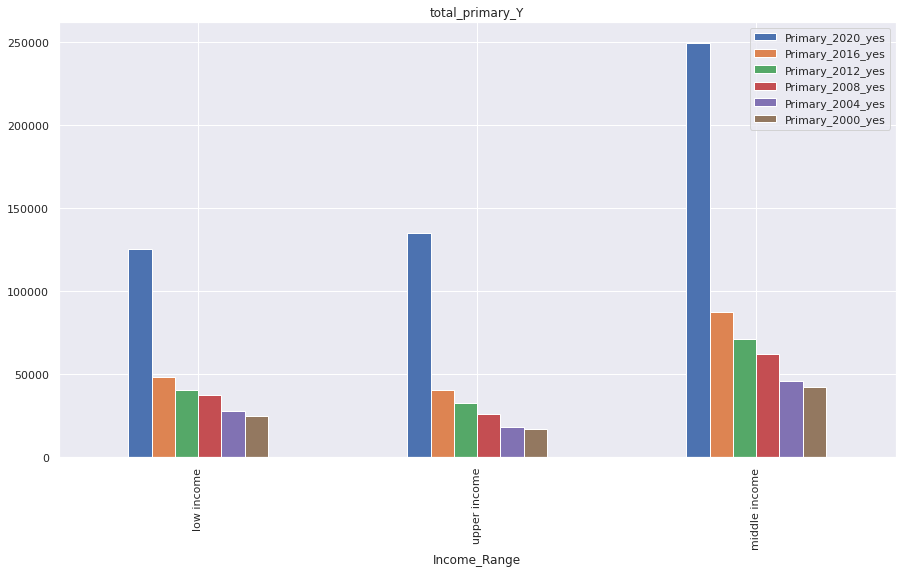

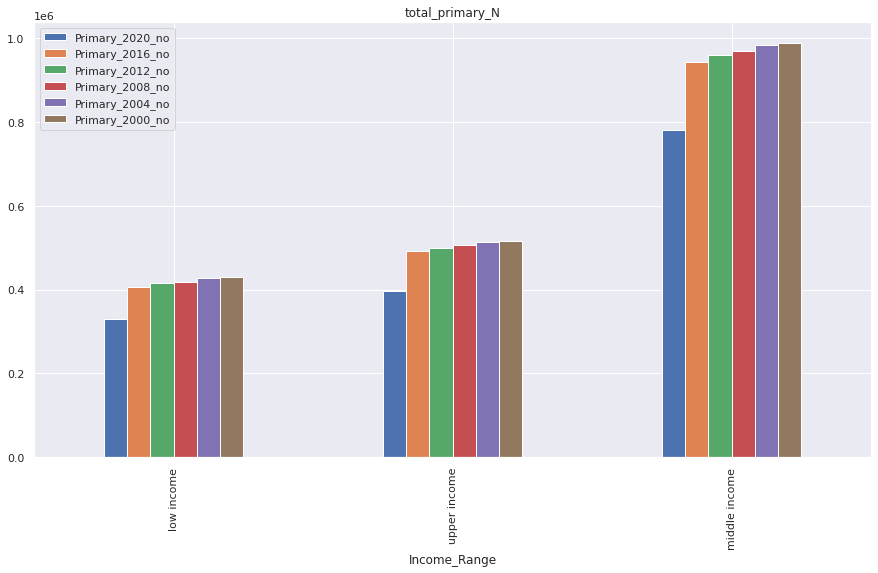

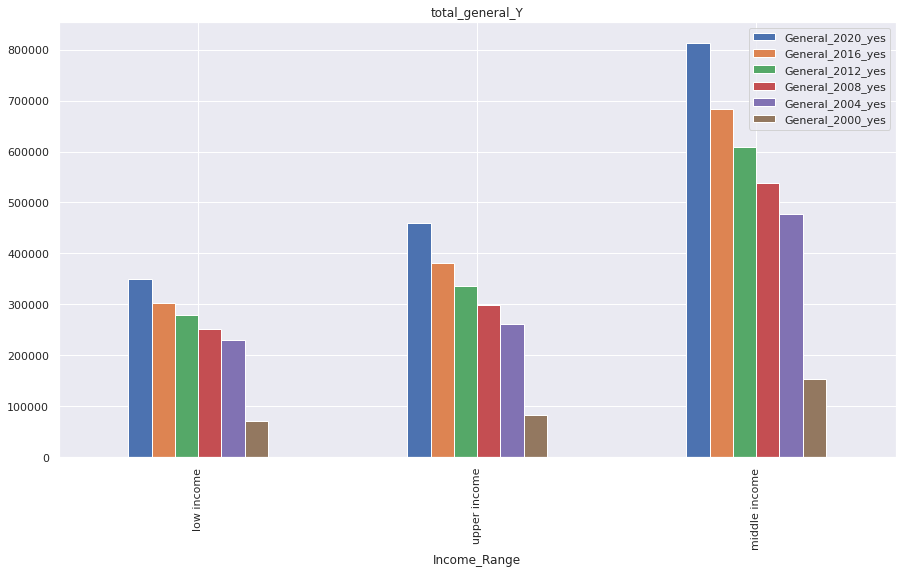

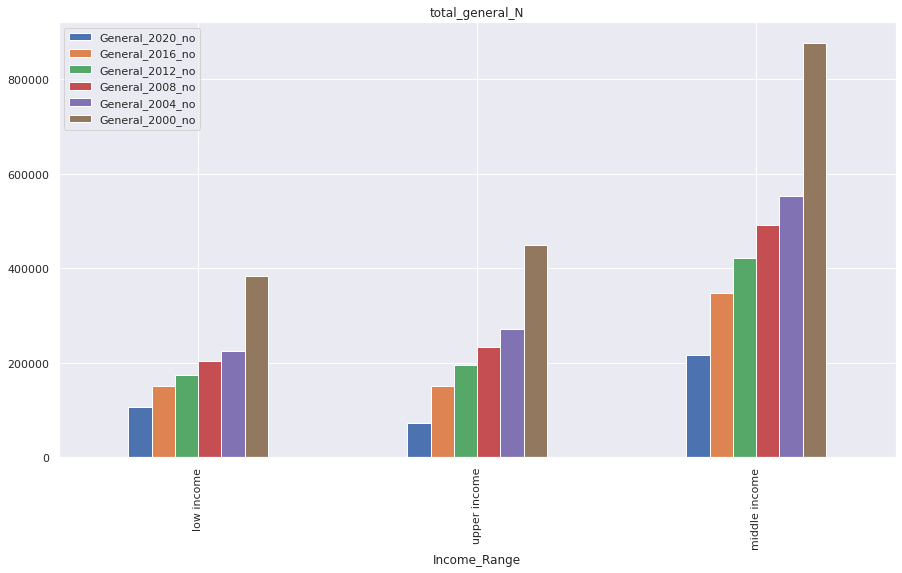

In [99]:
df_total_primary_yes = df_total_primary_yes.toPandas()
df_total_primary_yes.plot(x="Income_Range", y=["Primary_2020_yes", "Primary_2016_yes", "Primary_2012_yes","Primary_2008_yes",'Primary_2004_yes','Primary_2000_yes'], kind="bar")
plt.title('total_primary_Y');

df_total_primary_no = df_total_primary_no.toPandas()
df_total_primary_no.plot(x="Income_Range", y=["Primary_2020_no", "Primary_2016_no", "Primary_2012_no","Primary_2008_no",'Primary_2004_no','Primary_2000_no'], kind="bar")
plt.title('total_primary_N');

df_total_general_yes = df_total_general_yes.toPandas()
df_total_general_yes.plot(x="Income_Range", y=["General_2020_yes", "General_2016_yes", "General_2012_yes","General_2008_yes",'General_2004_yes','General_2000_yes'], kind="bar")
plt.title('total_general_Y');


df_total_general_no = df_total_general_no.toPandas()
df_total_general_no.plot(x="Income_Range", y=["General_2020_no", "General_2016_no", "General_2012_no","General_2008_no",'General_2004_no','General_2000_no'], kind="bar")
plt.title('total_general_N');

Question: what is the income distribution like across primary voter turnouts?
For people who turned out in the primary, more and more people have been turning out across all income groups, whereas the distribution remains fairly the same for people who did not vote.
For the general election, however, people who did not turn out to vote decrease in all income ranges, whereas it was the opposite for people who turned out to vote.

With similar distribution among all income groups. each year the growth rate of the number of voters who did not vote in primaries decreases, but increases in the general election. Which means people are more likely to vote in primaires rather than in general elections.

### Income demographic breakdown by party - Democratic Party

In [100]:
income_dems = income.filter(income.Parties_Description == 'Democratic')
income_dems.createOrReplaceTempView("income_table_dems")

In [101]:
# Democratic voter who vote in primary in election years
df_total_primary_yes = spark.sql("""
select
      Income_Range,
      sum(case when Primary_2020 == 1 then 1 else 0 end) as Primary_2020_yes,
      sum(case when Primary_2016 == 1 then 1 else 0 end) as Primary_2016_yes,
      sum(case when Primary_2012 == 1 then 1 else 0 end) as Primary_2012_yes,
      sum(case when Primary_2008 == 1 then 1 else 0 end) as Primary_2008_yes,
      sum(case when Primary_2004 == 1 then 1 else 0 end) as Primary_2004_yes,
      sum(case when Primary_2000 == 1 then 1 else 0 end) as Primary_2000_yes
   from
      income_table_dems
   group by Income_Range
""")
df_total_primary_yes.show()

+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
| Income_Range|Primary_2020_yes|Primary_2016_yes|Primary_2012_yes|Primary_2008_yes|Primary_2004_yes|Primary_2000_yes|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   low income|           68693|           24435|           13926|           18395|           12370|           10903|
| upper income|           72072|           20851|            8718|           11977|            7053|            6977|
|middle income|          128243|           41346|           21264|           27860|           18310|           16943|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+



In [102]:
# Democratic voter who don't vote in primary in election years
df_total_primary_no = spark.sql("""
select
      Income_Range,
      sum(case when Primary_2020 == 0 then 1 else 0 end) as Primary_2020_no,
      sum(case when Primary_2016 == 0 then 1 else 0 end) as Primary_2016_no,
      sum(case when Primary_2012 == 0 then 1 else 0 end) as Primary_2012_no,
      sum(case when Primary_2008 == 0 then 1 else 0 end) as Primary_2008_no,
      sum(case when Primary_2004 == 0 then 1 else 0 end) as Primary_2004_no,
      sum(case when Primary_2000 == 0 then 1 else 0 end) as Primary_2000_no
   from
      income_table_dems
   group by Income_Range
""")
df_total_primary_no.show()

+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
| Income_Range|Primary_2020_no|Primary_2016_no|Primary_2012_no|Primary_2008_no|Primary_2004_no|Primary_2000_no|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
|   low income|         104490|         148748|         159257|         154788|         160813|         162280|
| upper income|          88910|         140131|         152264|         149005|         153929|         154005|
|middle income|         200001|         286898|         306980|         300384|         309934|         311301|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+



In [103]:
# Democratic voter who vote in general in election years
df_total_general_yes = spark.sql("""
select
      Income_Range,
      sum(case when General_2020 == 1 then 1 else 0 end) as General_2020_yes,
      sum(case when General_2016 == 1 then 1 else 0 end) as General_2016_yes,
      sum(case when General_2012 == 1 then 1 else 0 end) as General_2012_yes,
      sum(case when General_2008 == 1 then 1 else 0 end) as General_2008_yes,
      sum(case when General_2004 == 1 then 1 else 0 end) as General_2004_yes,
      sum(case when General_2000 == 1 then 1 else 0 end) as General_2000_yes
   from
      income_table_dems
   group by Income_Range
""")
df_total_general_yes.show()

+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
| Income_Range|General_2020_yes|General_2016_yes|General_2012_yes|General_2008_yes|General_2004_yes|General_2000_yes|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   low income|          140425|          125291|          118776|          106590|           96841|           28466|
| upper income|          145445|          123620|          109308|           98357|           84648|           24532|
|middle income|          274280|          238180|          219086|          196586|          172808|           52128|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+



In [104]:
# Democratic voter who don't vote in general in election years
df_total_general_no = spark.sql("""
select
      Income_Range,
      sum(case when General_2020 == 0 then 1 else 0 end) as General_2020_no,
      sum(case when General_2016 == 0 then 1 else 0 end) as General_2016_no,
      sum(case when General_2012 == 0 then 1 else 0 end) as General_2012_no,
      sum(case when General_2008 == 0 then 1 else 0 end) as General_2008_no,
      sum(case when General_2004 == 0 then 1 else 0 end) as General_2004_no,
      sum(case when General_2000 == 0 then 1 else 0 end) as General_2000_no
   from
      income_table_dems
   group by Income_Range
""")
df_total_general_no.show()

+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
| Income_Range|General_2020_no|General_2016_no|General_2012_no|General_2008_no|General_2004_no|General_2000_no|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
|   low income|          32758|          47892|          54407|          66593|          76342|         144717|
| upper income|          15537|          37362|          51674|          62625|          76334|         136450|
|middle income|          53964|          90064|         109158|         131658|         155436|         276116|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+



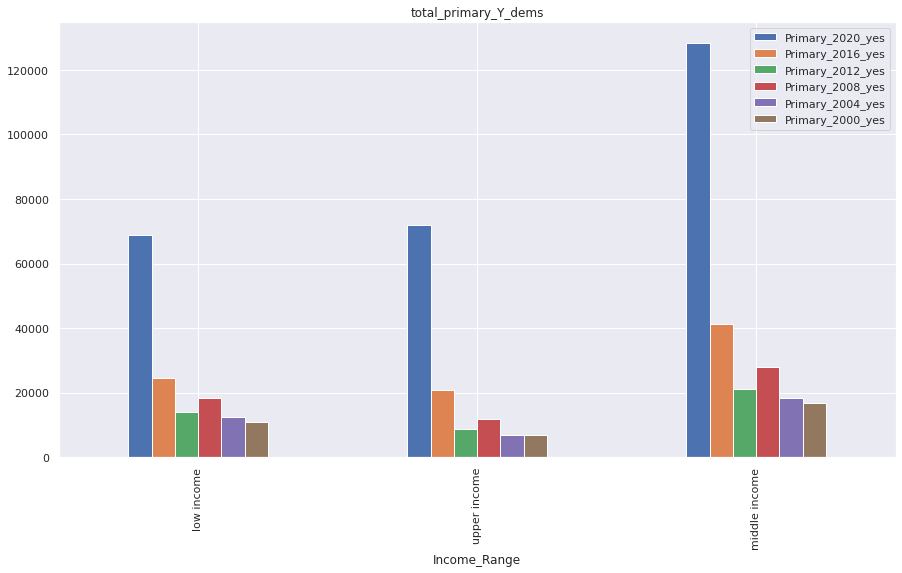

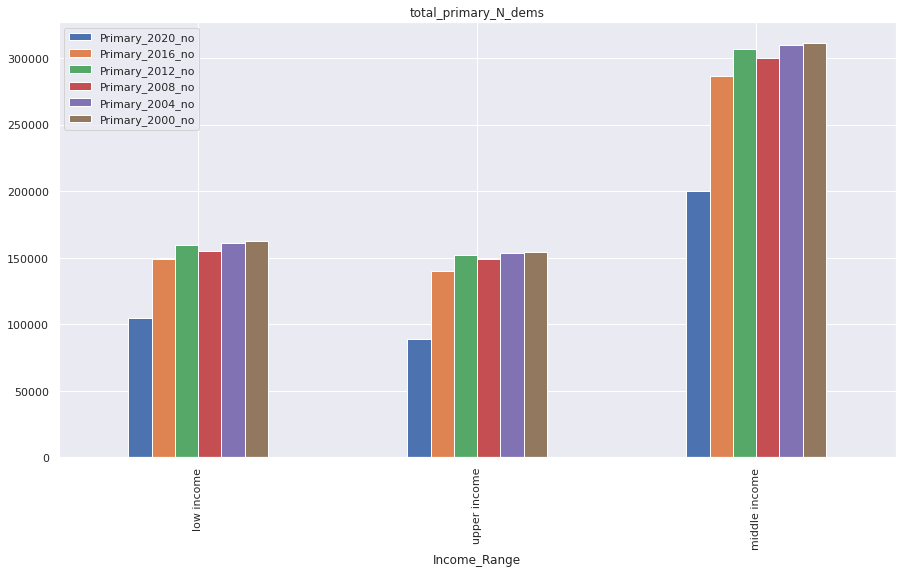

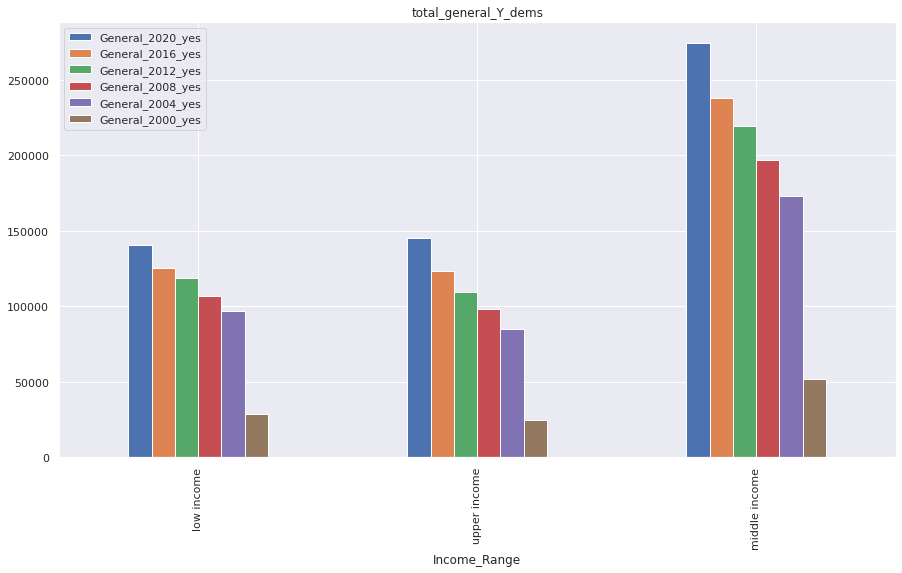

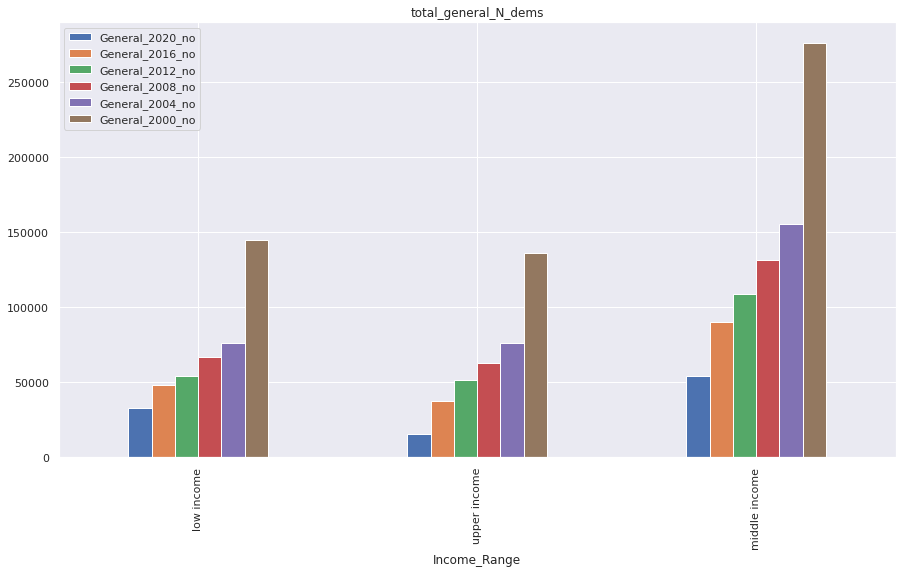

In [105]:
df_total_primary_yes = df_total_primary_yes.toPandas()
df_total_primary_yes.plot(x="Income_Range", y=["Primary_2020_yes", "Primary_2016_yes", "Primary_2012_yes","Primary_2008_yes",'Primary_2004_yes','Primary_2000_yes'], kind="bar")
plt.title('total_primary_Y_dems');

df_total_primary_no = df_total_primary_no.toPandas()
df_total_primary_no.plot(x="Income_Range", y=["Primary_2020_no", "Primary_2016_no", "Primary_2012_no","Primary_2008_no",'Primary_2004_no','Primary_2000_no'], kind="bar")
plt.title('total_primary_N_dems');

df_total_general_yes = df_total_general_yes.toPandas()
df_total_general_yes.plot(x="Income_Range", y=["General_2020_yes", "General_2016_yes", "General_2012_yes","General_2008_yes",'General_2004_yes','General_2000_yes'], kind="bar")
plt.title('total_general_Y_dems');


df_total_general_no = df_total_general_no.toPandas()
df_total_general_no.plot(x="Income_Range", y=["General_2020_no", "General_2016_no", "General_2012_no","General_2008_no",'General_2004_no','General_2000_no'], kind="bar")
plt.title('total_general_N_dems');

In Democratic party, upper income group has the lowest voter turnout among all groups in both primiaries and general election, especially in 2020. So democratic can focus more on how to encourage upper income group to participate in the future election years.

### Income demographic breakdown by party - Republican Party

In [106]:
income_reps = income.filter(income.Parties_Description == 'Republican')
income_reps.createOrReplaceTempView("income_table_reps")

In [107]:
# Republican voter who vote in primary in election years
df_total_primary_yes = spark.sql("""
select
      Income_Range,
      sum(case when Primary_2020 == 1 then 1 else 0 end) as Primary_2020_yes,
      sum(case when Primary_2016 == 1 then 1 else 0 end) as Primary_2016_yes,
      sum(case when Primary_2012 == 1 then 1 else 0 end) as Primary_2012_yes,
      sum(case when Primary_2008 == 1 then 1 else 0 end) as Primary_2008_yes,
      sum(case when Primary_2004 == 1 then 1 else 0 end) as Primary_2004_yes,
      sum(case when Primary_2000 == 1 then 1 else 0 end) as Primary_2000_yes
   from
      income_table_reps
   group by Income_Range
""")
df_total_primary_yes.show()

+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
| Income_Range|Primary_2020_yes|Primary_2016_yes|Primary_2012_yes|Primary_2008_yes|Primary_2004_yes|Primary_2000_yes|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   low income|           55206|           22789|           24773|           17557|           13951|           12391|
| upper income|           61009|           18197|           21786|           12432|           10000|            8546|
|middle income|          117532|           42911|           46255|           30479|           24947|           22198|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+



In [108]:
# Republican voter who don't vote in primary in election years
df_total_primary_no = spark.sql("""
select
      Income_Range,
      sum(case when Primary_2020 == 0 then 1 else 0 end) as Primary_2020_no,
      sum(case when Primary_2016 == 0 then 1 else 0 end) as Primary_2016_no,
      sum(case when Primary_2012 == 0 then 1 else 0 end) as Primary_2012_no,
      sum(case when Primary_2008 == 0 then 1 else 0 end) as Primary_2008_no,
      sum(case when Primary_2004 == 0 then 1 else 0 end) as Primary_2004_no,
      sum(case when Primary_2000 == 0 then 1 else 0 end) as Primary_2000_no
   from
      income_table_reps
   group by Income_Range
""")
df_total_primary_no.show()

+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
| Income_Range|Primary_2020_no|Primary_2016_no|Primary_2012_no|Primary_2008_no|Primary_2004_no|Primary_2000_no|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
|   low income|          83892|         116309|         114325|         121541|         125147|         126707|
| upper income|         139019|         181831|         178242|         187596|         190028|         191482|
|middle income|         230370|         304991|         301647|         317423|         322955|         325704|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+



In [109]:
# Republican voter who vote in general in election years
df_total_general_yes = spark.sql("""
select
      Income_Range,
      sum(case when General_2020 == 1 then 1 else 0 end) as General_2020_yes,
      sum(case when General_2016 == 1 then 1 else 0 end) as General_2016_yes,
      sum(case when General_2012 == 1 then 1 else 0 end) as General_2012_yes,
      sum(case when General_2008 == 1 then 1 else 0 end) as General_2008_yes,
      sum(case when General_2004 == 1 then 1 else 0 end) as General_2004_yes,
      sum(case when General_2000 == 1 then 1 else 0 end) as General_2000_yes
   from
      income_table_reps
   group by Income_Range
""")
df_total_general_yes.show()

+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
| Income_Range|General_2020_yes|General_2016_yes|General_2012_yes|General_2008_yes|General_2004_yes|General_2000_yes|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   low income|          120489|          108540|           99644|           91756|           86780|           23669|
| upper income|          180970|          156375|          140246|          125396|          112834|           32801|
|middle income|          302832|          263161|          234561|          210894|          193001|           56620|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+



In [110]:
# Republican voter who don't vote in general in election years
df_total_general_no = spark.sql("""
select
      Income_Range,
      sum(case when General_2020 == 0 then 1 else 0 end) as General_2020_no,
      sum(case when General_2016 == 0 then 1 else 0 end) as General_2016_no,
      sum(case when General_2012 == 0 then 1 else 0 end) as General_2012_no,
      sum(case when General_2008 == 0 then 1 else 0 end) as General_2008_no,
      sum(case when General_2004 == 0 then 1 else 0 end) as General_2004_no,
      sum(case when General_2000 == 0 then 1 else 0 end) as General_2000_no
   from
      income_table_reps
   group by Income_Range
""")
df_total_general_no.show()

+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
| Income_Range|General_2020_no|General_2016_no|General_2012_no|General_2008_no|General_2004_no|General_2000_no|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
|   low income|          18609|          30558|          39454|          47342|          52318|         115429|
| upper income|          19058|          43653|          59782|          74632|          87194|         167227|
|middle income|          45070|          84741|         113341|         137008|         154901|         291282|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+



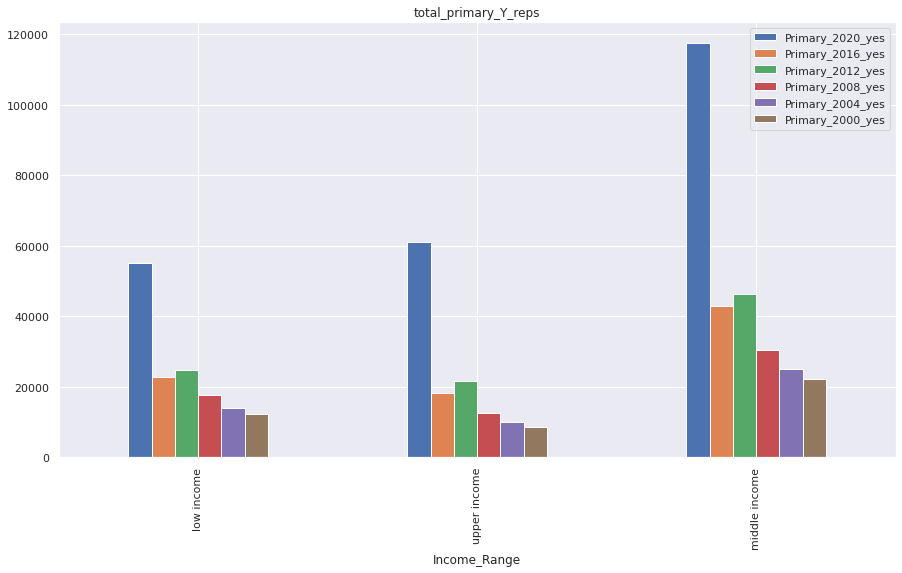

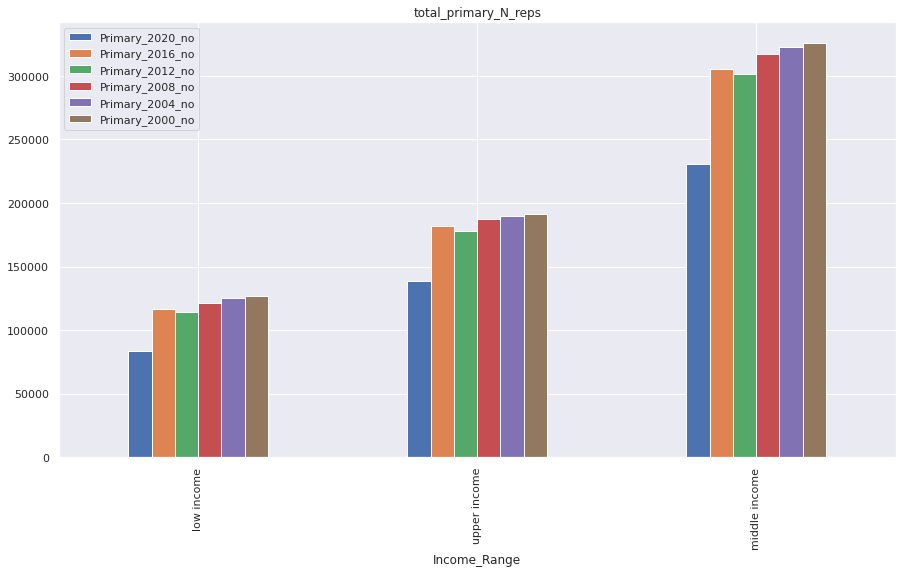

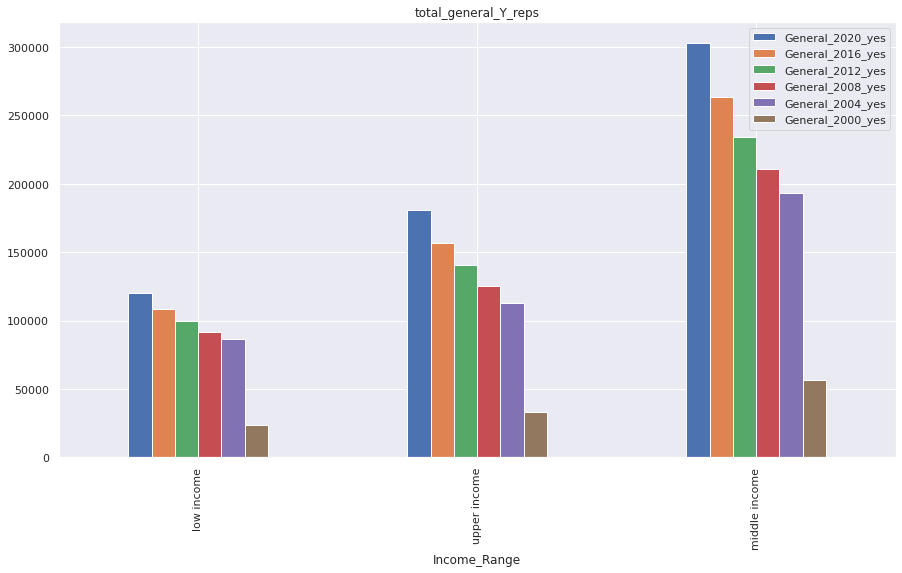

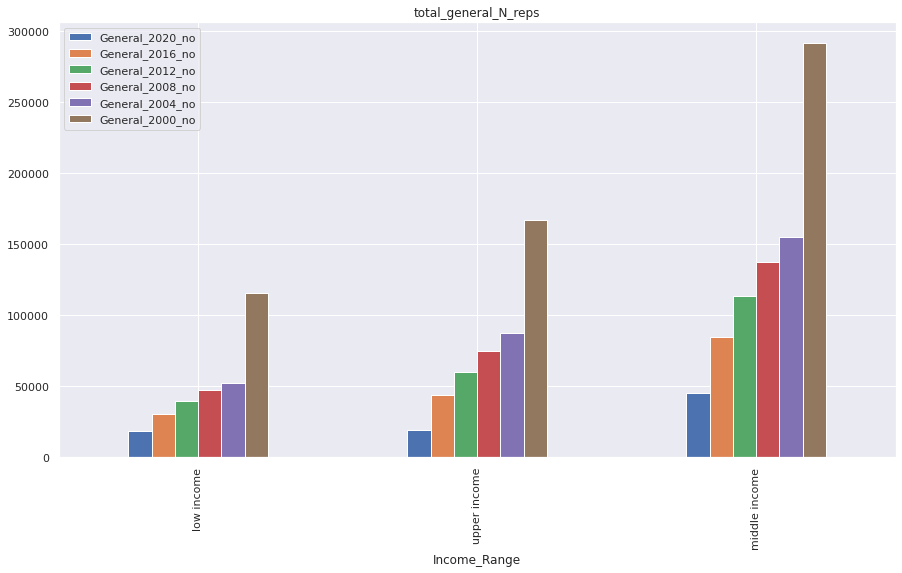

In [111]:
df_total_primary_yes = df_total_primary_yes.toPandas()
df_total_primary_yes.plot(x="Income_Range", y=["Primary_2020_yes", "Primary_2016_yes", "Primary_2012_yes","Primary_2008_yes",'Primary_2004_yes','Primary_2000_yes'], kind="bar")
plt.title('total_primary_Y_reps');

df_total_primary_no = df_total_primary_no.toPandas()
df_total_primary_no.plot(x="Income_Range", y=["Primary_2020_no", "Primary_2016_no", "Primary_2012_no","Primary_2008_no",'Primary_2004_no','Primary_2000_no'], kind="bar")
plt.title('total_primary_N_reps');

df_total_general_yes = df_total_general_yes.toPandas()
df_total_general_yes.plot(x="Income_Range", y=["General_2020_yes", "General_2016_yes", "General_2012_yes","General_2008_yes",'General_2004_yes','General_2000_yes'], kind="bar")
plt.title('total_general_Y_reps');


df_total_general_no = df_total_general_no.toPandas()
df_total_general_no.plot(x="Income_Range", y=["General_2020_no", "General_2016_no", "General_2012_no","General_2008_no",'General_2004_no','General_2000_no'], kind="bar")
plt.title('total_general_N_reps');

In Republican party, low income group has the lowest voter turnout among all groups in both primiaries and general election, especially in 2020. So republican can focus more on how to encourage lower income group to participate in the future election years.

## Income Model 

In [112]:
income = df.select(
'Parties_Description',
'CommercialData_EstHomeValue','CommercialData_EstimatedHHIncome','CommercialData_EstimatedHHIncomeAmount',
'CommercialData_EstimatedAreaMedianHHIncome',
'CommercialData_HomePurchasePrice',
'CommercialData_ISPSA',
'CommercialData_LandValue',
'CommercialData_AreaMedianHousingValue',
'Primary_2020')

In [113]:
from pyspark.sql.functions import *
from pyspark.sql.types import IntegerType
income=income\
.withColumn('Primary_2020',when(income.Primary_2020 =='Y', 1).otherwise(0))
income = income.withColumn("Primary_2020", income["Primary_2020"].cast(IntegerType()))

In [114]:
import pyspark.sql.functions as f
income = income.withColumn('CommercialData_EstHomeValue', f.regexp_replace('CommercialData_EstHomeValue', '[$,]', '').cast('integer'))
income = income.withColumn('CommercialData_EstimatedHHIncome', f.regexp_replace('CommercialData_EstimatedHHIncome', '[$,]', '').cast('integer'))
income = income.withColumn('CommercialData_EstimatedHHIncomeAmount', f.regexp_replace('CommercialData_EstimatedHHIncomeAmount', '[$,]', '').cast('integer'))
income = income.withColumn('CommercialData_HomePurchasePrice', f.regexp_replace('CommercialData_HomePurchasePrice', '[$,]', '').cast('integer'))
income = income.withColumn('CommercialData_LandValue', f.regexp_replace('CommercialData_LandValue', '[$,]', '').cast('integer'))
income = income.withColumn('CommercialData_AreaMedianHousingValue', f.regexp_replace('CommercialData_AreaMedianHousingValue', '[$,]', '').cast('integer'))
income = income.withColumn('CommercialData_EstimatedAreaMedianHHIncome', f.regexp_replace('CommercialData_EstimatedAreaMedianHHIncome', '[$,]', '').cast('integer'))

In [115]:
income = drop_null_columns(income)
income = income.dropna()
income = income.repartition(20)
print("data was re-partitioned to {} partitions!".format(income.rdd.getNumPartitions()))
income.cache()

data was re-partitioned to 20 partitions!


DataFrame[Parties_Description: string, CommercialData_EstHomeValue: int, CommercialData_EstimatedHHIncomeAmount: int, CommercialData_EstimatedAreaMedianHHIncome: int, CommercialData_ISPSA: int, CommercialData_AreaMedianHousingValue: int, Primary_2020: int]

### Classification Model

#### Defining an instance of the evaluator and using Primary_2020 as our target variable in our classification analysis

In [116]:
income_demo = income.filter(income.Parties_Description == "Democratic") 
income_demo = income_demo.drop(col("Parties_Description")) 

In [117]:
income_repu = income.filter(income.Parties_Description == "Republican") 
income_repu = income_repu.drop(col("Parties_Description")) 

In [118]:
# construct AUC evaluator

from pyspark.ml.evaluation import BinaryClassificationEvaluator
aucEvaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')

In [119]:
from pyspark.ml.feature import RFormula

supervised = RFormula(formula="Primary_2020 ~ . ")

In [120]:
fittedRF_demo = supervised.fit(income_demo)
fittedRF_repu = supervised.fit(income_repu)

In [121]:
preparedDF_demo = fittedRF_demo.transform(income_demo)
preparedDF_repu = fittedRF_repu.transform(income_repu)

In [122]:
preparedDF_demo.select('features', 'label').show(2, False)

+---------------------------------------+-----+
|features                               |label|
+---------------------------------------+-----+
|[157852.0,85000.0,76762.0,5.0,103213.0]|1.0  |
|[57009.0,35000.0,57820.0,5.0,83999.0]  |0.0  |
+---------------------------------------+-----+
only showing top 2 rows



In [123]:
preparedDF_repu.select('features', 'label').show(2, False)

+---------------------------------------+-----+
|features                               |label|
+---------------------------------------+-----+
|[182648.0,91410.0,91410.0,3.0,182648.0]|1.0  |
|[325000.0,90624.0,90624.0,6.0,228622.0]|0.0  |
+---------------------------------------+-----+
only showing top 2 rows



In [124]:
# feature columns for Democratic
featureCols_demo = pd.DataFrame(
  preparedDF_demo.schema["features"].metadata["ml_attr"]["attrs"]["numeric"]).sort_values("idx")

featureCols_demo = featureCols_demo.set_index('idx')
featureCols_demo.head()
# feature columns for Republican
featureCols_repu = pd.DataFrame(
  preparedDF_repu.schema["features"].metadata["ml_attr"]["attrs"]["numeric"]).sort_values("idx")

featureCols_repu = featureCols_repu.set_index('idx')

### Dem Presidential Primary 2020

In [125]:
train, test = preparedDF_demo.randomSplit([0.7, 0.3], seed = 843)
train.show(1)

+---------------------------+--------------------------------------+------------------------------------------+--------------------+-------------------------------------+------------+--------------------+-----+
|CommercialData_EstHomeValue|CommercialData_EstimatedHHIncomeAmount|CommercialData_EstimatedAreaMedianHHIncome|CommercialData_ISPSA|CommercialData_AreaMedianHousingValue|Primary_2020|            features|label|
+---------------------------+--------------------------------------+------------------------------------------+--------------------+-------------------------------------+------------+--------------------+-----+
|                       7382|                                 84000|                                     63133|                   1|                                89249|           0|[7382.0,84000.0,6...|  0.0|
+---------------------------+--------------------------------------+------------------------------------------+--------------------+------------------------

In [126]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression()

In [127]:
lrModel = lr.fit(train)

Text(0, 0.5, 'Beta Coefficients')

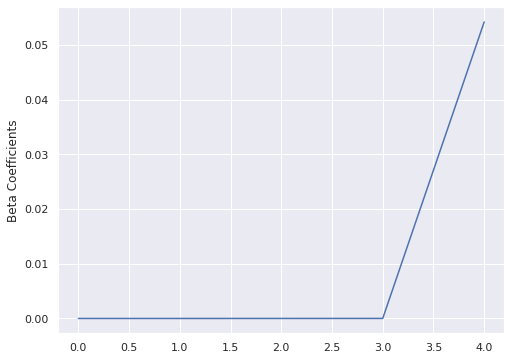

In [128]:
plt.rcParams["figure.figsize"] = (8,6)
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')

In [129]:
coefsArray = np.array(lrModel.coefficients)  # convert to np.array
coefsDF = pd.DataFrame(coefsArray, columns=['coefs'])  # to pandas

coefsDF = coefsDF.merge(featureCols_demo, left_index=True, right_index=True)  # join it with featureCols we created above
coefsDF.sort_values('coefs', inplace=True)  # Sort them
coefsDF.head(10)

,coefs,name
4,-0.000002,CommercialData_AreaMedianHousingValue
1,-0.000002,CommercialData_EstimatedHHIncomeAmount
0,0.000002,CommercialData_EstHomeValue
2,0.000007,CommercialData_EstimatedAreaMedianHHIncome
3,0.054232,CommercialData_ISPSA


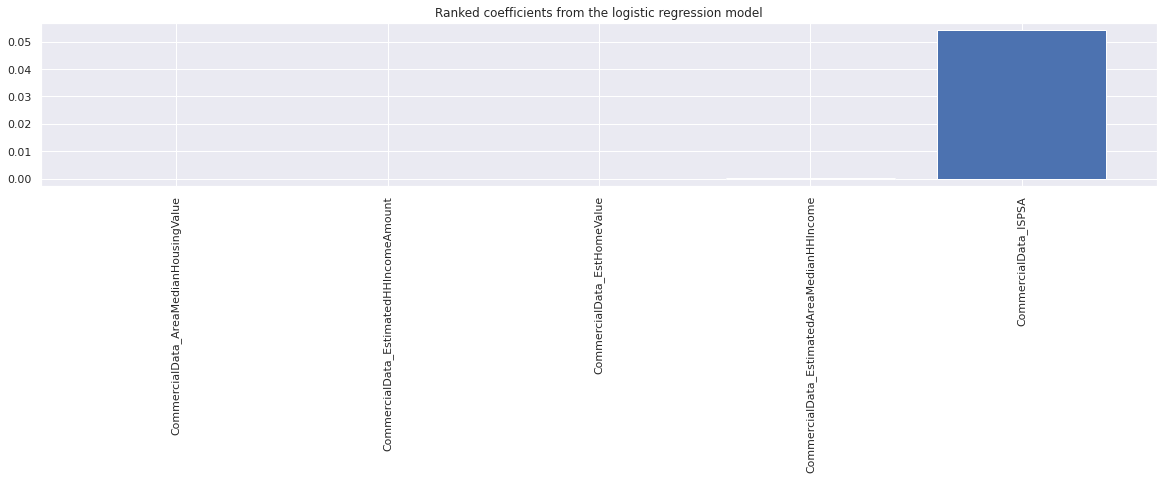

In [130]:
plt.rcParams["figure.figsize"] = (20,3)
plt.xticks(rotation=90)
plt.bar(coefsDF.name, coefsDF.coefs)
plt.title('Ranked coefficients from the logistic regression model')
plt.show()

In [131]:
summary = lrModel.summary
print('Test AUC:', aucEvaluator.evaluate(lrModel.transform(test)))
print('Train AUC:', summary.areaUnderROC)
test_auc_baseline = aucEvaluator.evaluate(lrModel.transform(test))

Test AUC: 0.5837003174345475


Train AUC: 0.5847460366349143


### Rep Presidential Primary 2020

In [132]:
train, test = preparedDF_repu.randomSplit([0.7, 0.3], seed = 843)
train.show(1)

+---------------------------+--------------------------------------+------------------------------------------+--------------------+-------------------------------------+------------+--------------------+-----+
|CommercialData_EstHomeValue|CommercialData_EstimatedHHIncomeAmount|CommercialData_EstimatedAreaMedianHHIncome|CommercialData_ISPSA|CommercialData_AreaMedianHousingValue|Primary_2020|            features|label|
+---------------------------+--------------------------------------+------------------------------------------+--------------------+-------------------------------------+------------+--------------------+-----+
|                       7045|                                 39000|                                     64674|                   2|                                88225|           0|[7045.0,39000.0,6...|  0.0|
+---------------------------+--------------------------------------+------------------------------------------+--------------------+------------------------

In [133]:
lr = LogisticRegression()
lrModel = lr.fit(train)

Text(0, 0.5, 'Beta Coefficients')

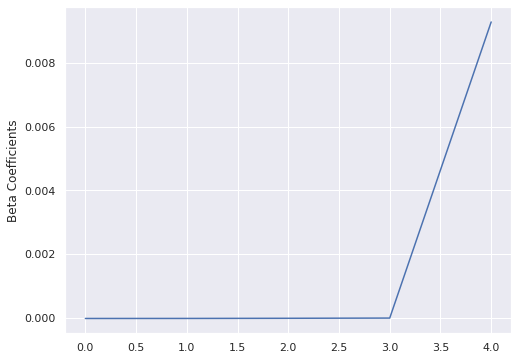

In [134]:
plt.rcParams["figure.figsize"] = (8,6)
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')

In [135]:
coefsArray = np.array(lrModel.coefficients)  # convert to np.array
coefsDF = pd.DataFrame(coefsArray, columns=['coefs'])  # to pandas

coefsDF = coefsDF.merge(featureCols_repu, left_index=True, right_index=True)  # join it with featureCols we created above
coefsDF.sort_values('coefs', inplace=True)  # Sort them
coefsDF.head(10)

,coefs,name
4,-0.000005,CommercialData_AreaMedianHousingValue
1,-0.000003,CommercialData_EstimatedHHIncomeAmount
0,0.000001,CommercialData_EstHomeValue
2,0.000008,CommercialData_EstimatedAreaMedianHHIncome
3,0.009270,CommercialData_ISPSA


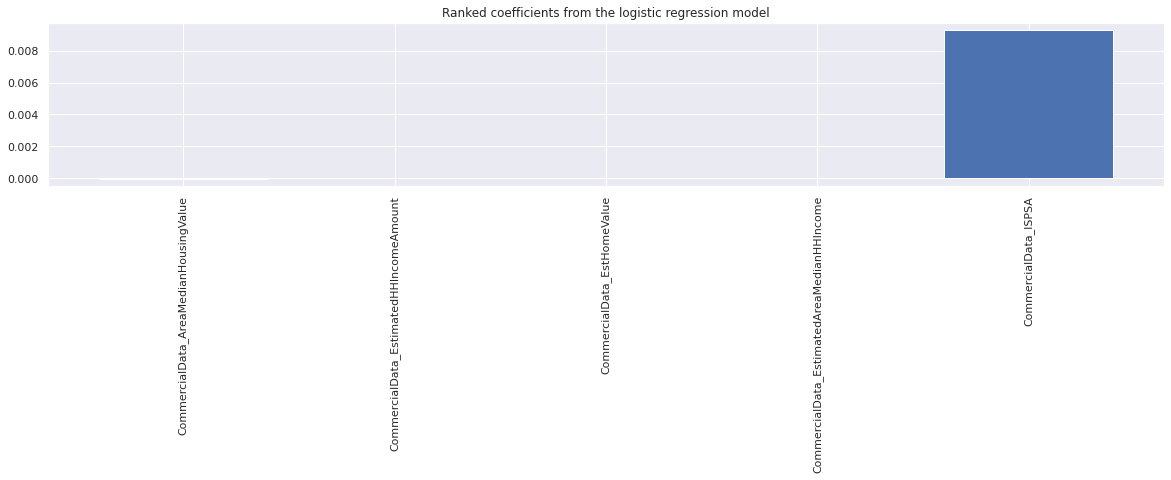

In [136]:
plt.rcParams["figure.figsize"] = (20,3)
plt.xticks(rotation=90)
plt.bar(coefsDF.name, coefsDF.coefs)
plt.title('Ranked coefficients from the logistic regression model')
plt.show()

In [137]:
print('Test AUC:', aucEvaluator.evaluate(lrModel.transform(test)))
print('Train AUC:', summary.areaUnderROC)
test_auc_baseline = aucEvaluator.evaluate(lrModel.transform(test))

Test AUC: 0.5640554521921594
Train AUC: 0.5847460366349143


## Iowa Public Service EDA

In [4]:
# Public Services column selection

public_works = df.select('LALVOTERID','County','Voters_FIPS',
'AddressDistricts_Change_Changed_County',
'Parties_Description',
'US_Congressional_District',
'General_2020',
'Primary_2020',
'General_2016',
'Primary_2016',
'General_2012',
'Primary_2012',
'General_2008',
'Primary_2008',
'General_2004',
'Primary_2004',
'General_2000',
'Primary_2000',
'County_Supervisorial_District',
'Rural_Service_District',
'Sanitary_District',
'School_District',
'Water_District',
'Fire_District',
'Judicial_District',
'Land_Commission',
'Community_College',
'Community_College_Commissioner_District')

In [5]:
publicworks = public_works.toPandas()

22/05/01 23:01:18 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [6]:
## setup our environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## pandas print columns/rows option (100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

Public Service Data Cleaning

In [7]:
publicworks['Rural_Service_District'] = publicworks['Rural_Service_District'].fillna(0)
publicworks['Sanitary_District'] = publicworks['Sanitary_District'].fillna(0)
publicworks['School_District'] = publicworks['School_District'].fillna(0)
publicworks['Water_District'] = publicworks['Water_District'].fillna(0)
publicworks['Fire_District'] = publicworks['Fire_District'].fillna(0)
publicworks['Judicial_District'] = publicworks['Judicial_District'].fillna(0)
publicworks['Land_Commission'] = publicworks['Land_Commission'].fillna(0)
publicworks['Community_College'] = publicworks['Community_College'].fillna(0)
publicworks['Community_College_Commissioner_District'] = publicworks['Community_College_Commissioner_District'].fillna(0)
publicworks['County_Supervisorial_District'] = publicworks['County_Supervisorial_District'].fillna(0)
publicworks['General_2020'] = publicworks['General_2020'].fillna(0)
publicworks['Primary_2020'] = publicworks['Primary_2020'].fillna(0)
publicworks['General_2016'] = publicworks['General_2016'].fillna(0)
publicworks['Primary_2016'] = publicworks['Primary_2016'].fillna(0)
publicworks['General_2012'] = publicworks['General_2012'].fillna(0)
publicworks['Primary_2012'] = publicworks['Primary_2012'].fillna(0)
publicworks['General_2008'] = publicworks['General_2008'].fillna(0)
publicworks['Primary_2008'] = publicworks['Primary_2008'].fillna(0)
publicworks['General_2004'] = publicworks['General_2004'].fillna(0)
publicworks['Primary_2004'] = publicworks['Primary_2004'].fillna(0)
publicworks['General_2000'] = publicworks['General_2000'].fillna(0)
publicworks['Primary_2000'] = publicworks['Primary_2000'].fillna(0)
publicworks['Parties_Description'] = publicworks['Parties_Description'].fillna(0)
publicworks['US_Congressional_District'] = publicworks['US_Congressional_District'].fillna(0)

In [8]:
publicworks.loc[publicworks.General_2020 != 0, 'General_2020'] = 1
publicworks.loc[publicworks.Primary_2020 != 0, 'Primary_2020'] = 1
publicworks.loc[publicworks.General_2016 != 0, 'General_2016'] = 1
publicworks.loc[publicworks.Primary_2016 != 0, 'Primary_2016'] = 1
publicworks.loc[publicworks.General_2012 != 0, 'General_2012'] = 1
publicworks.loc[publicworks.Primary_2012 != 0, 'Primary_2012'] = 1
publicworks.loc[publicworks.General_2008 != 0, 'General_2008'] = 1
publicworks.loc[publicworks.Primary_2008 != 0, 'Primary_2008'] = 1
publicworks.loc[publicworks.General_2004 != 0, 'General_2004'] = 1
publicworks.loc[publicworks.Primary_2004 != 0, 'Primary_2004'] = 1
publicworks.loc[publicworks.General_2000 != 0, 'General_2000'] = 1
publicworks.loc[publicworks.Primary_2000 != 0, 'Primary_2000'] = 1

In [9]:
publicworks.loc[publicworks.School_District != 0, 'School_District'] = 1
publicworks.loc[publicworks.Sanitary_District != 0, 'Sanitary_District'] = 1
publicworks.loc[publicworks.Water_District != 0, 'Water_District'] = 1
publicworks.loc[publicworks.Fire_District != 0, 'Fire_District'] = 1
publicworks.loc[publicworks.Judicial_District != 0, 'Judicial_District'] = 1
publicworks.loc[publicworks.Land_Commission != 0, 'Land_Commission'] = 1
publicworks.loc[publicworks.Community_College != 0, 'Community_College'] = 1
publicworks.loc[publicworks.Community_College_Commissioner_District != 0, 'Community_College_Commissioner_District'] = 1
publicworks.loc[publicworks.Rural_Service_District != 0, 'Rural_Service_District'] = 1
publicworks.loc[publicworks.County_Supervisorial_District != 0, 'County_Supervisorial_District'] = 1

publicworks.US_Congressional_District = publicworks.US_Congressional_District.astype(int)

In [10]:
#Converting binary parameters to numeric

publicworks[['Rural_Service_District', 'Sanitary_District', 'School_District','Water_District', 'Fire_District', 'Judicial_District',
       'Land_Commission', 'Community_College',
       'Community_College_Commissioner_District','General_2020',
       'Primary_2020', 'General_2016', 'Primary_2016', 'General_2012',
       'Primary_2012', 'General_2008', 'Primary_2008', 'General_2004',
       'Primary_2004', 'General_2000', 'Primary_2000','County_Supervisorial_District']] = publicworks[['Rural_Service_District', 'Sanitary_District', 'School_District',
       'Water_District', 'Fire_District', 'Judicial_District',
       'Land_Commission', 'Community_College',
       'Community_College_Commissioner_District','General_2020',
       'Primary_2020', 'General_2016', 'Primary_2016', 'General_2012',
       'Primary_2012', 'General_2008', 'Primary_2008', 'General_2004',
       'Primary_2004', 'General_2000', 'Primary_2000','County_Supervisorial_District']].apply(pd.to_numeric)

In [11]:
#Creating a weighted score for public services

publicworks['public_service_score'] = 0
for x in ['County_Supervisorial_District', 'Rural_Service_District',
       'Sanitary_District', 'School_District', 'Water_District',
       'Fire_District', 'Judicial_District', 'Land_Commission', 'Community_College',
       'Community_College_Commissioner_District']:
    publicworks['public_service_score'] = publicworks['public_service_score'] + publicworks[x]
print(publicworks.head())

       LALVOTERID County  Voters_FIPS AddressDistricts_Change_Changed_County  \
0    LALIA1063012  ADAIR            1    Has Not Changed Within Last 2 Years   
1    LALIA1059606  ADAIR            1              Between 1 and 2 Years Ago   
2    LALIA1565484  ADAIR            1        Between 6 Months and 1 Year Ago   
3     LALIA758458  ADAIR            1    Has Not Changed Within Last 2 Years   
4  LALIA397469290  ADAIR            1        Between 6 Months and 1 Year Ago   

  Parties_Description  US_Congressional_District  General_2020  Primary_2020  \
0          Democratic                          3             0             0   
1        Non-Partisan                          3             0             0   
2        Non-Partisan                          3             0             0   
3        Non-Partisan                          3             1             0   
4          Democratic                          3             0             0   

   General_2016  Primary_2016  General

/tmp/ipykernel_11149/2576211301.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  public_services_democratic = publicworks.loc[publicworks['Parties_Description'] == 'Democratic',:].groupby('Primary_2020')['County_Supervisorial_District', 'Rural_Service_District',


Text(0, 0.5, 'Voter Turnout: Democratic')

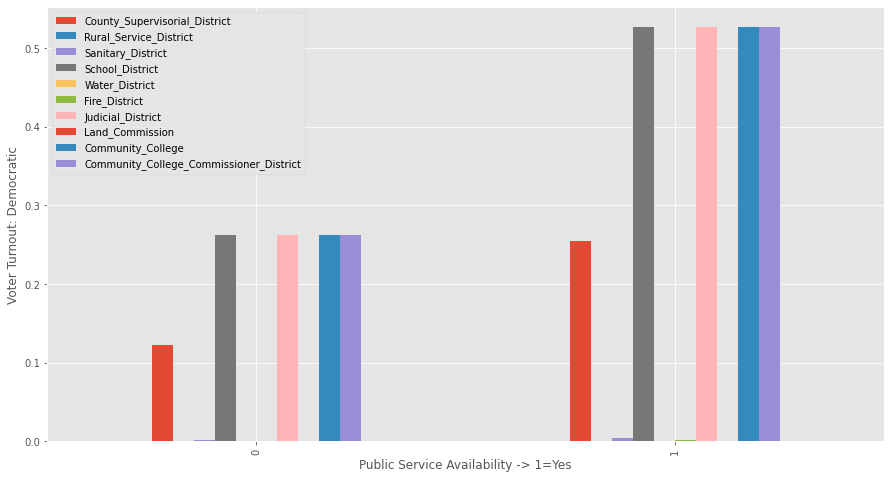

In [12]:
# Determining impact of various kinds of public services on democrat voter turnout

public_services_democratic = publicworks.loc[publicworks['Parties_Description'] == 'Democratic',:].groupby('Primary_2020')['County_Supervisorial_District', 'Rural_Service_District',
       'Sanitary_District', 'School_District', 'Water_District',
       'Fire_District', 'Judicial_District', 'Land_Commission',
       'Community_College', 'Community_College_Commissioner_District'].sum()

public_services_democratic.reset_index(inplace=True)
for i in public_services_democratic.columns[1:]:
    public_services_democratic.loc[public_services_democratic['Primary_2020'] == 0, i] = public_services_democratic[i]/publicworks['Primary_2020'][publicworks['Primary_2020'] == 0].value_counts()[0]
    public_services_democratic.loc[public_services_democratic['Primary_2020'] == 1, i] = public_services_democratic[i]/publicworks['Primary_2020'][publicworks['Primary_2020'] == 1].value_counts()[1]

public_services_democratic.set_index('Primary_2020', inplace=True)
psd = public_services_democratic.plot(kind='bar', figsize=(15,8))
psd.set_xlabel("Public Service Availability -> 1=Yes")
psd.set_ylabel("Voter Turnout: Democratic")

As we observe, Democrat voter turnout is significantly higher for districts with access to public services than places without. Even among them having a county supervisorial district or rural service district is less important than other public services.

/tmp/ipykernel_11149/1735855837.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  public_services_republican = publicworks.loc[publicworks['Parties_Description'] == 'Republican',:].groupby('Primary_2020')['County_Supervisorial_District', 'Rural_Service_District',


Text(0, 0.5, 'Voter Turnout: Republican')

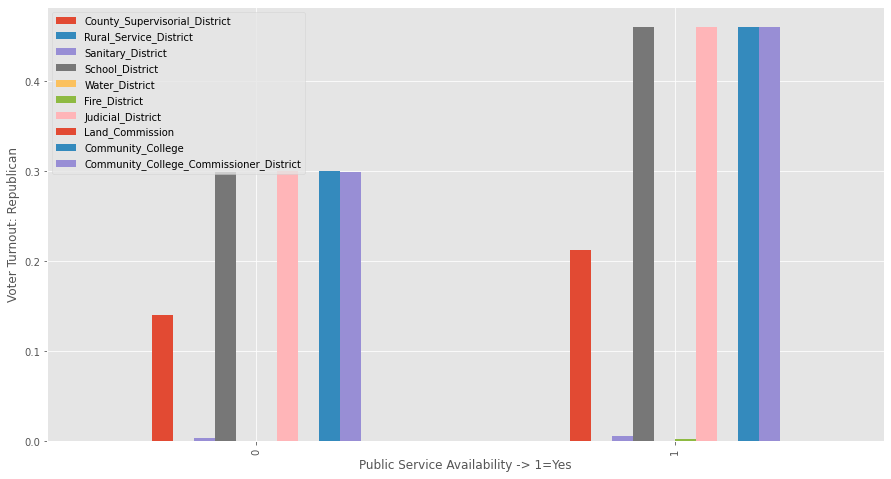

In [13]:
# Republican Voter Turnout Percentage is higher where people have access to public services
public_services_republican = publicworks.loc[publicworks['Parties_Description'] == 'Republican',:].groupby('Primary_2020')['County_Supervisorial_District', 'Rural_Service_District',
       'Sanitary_District', 'School_District', 'Water_District',
       'Fire_District', 'Judicial_District', 'Land_Commission',
       'Community_College', 'Community_College_Commissioner_District'].sum()

public_services_republican.reset_index(inplace=True)
for i in public_services_republican.columns[1:]:
    public_services_republican.loc[public_services_republican['Primary_2020'] == 0, i] = public_services_republican[i]/publicworks['Primary_2020'][publicworks['Primary_2020'] == 0].value_counts()[0]
    public_services_republican.loc[public_services_republican['Primary_2020'] == 1, i] = public_services_republican[i]/publicworks['Primary_2020'][publicworks['Primary_2020'] == 1].value_counts()[1]

public_services_republican.set_index('Primary_2020', inplace=True)
psr = public_services_republican.plot(kind='bar', figsize=(15,8))
psr.set_xlabel("Public Service Availability -> 1=Yes")
psr.set_ylabel("Voter Turnout: Republican")

Similarly Republican voter turnout is higher for districts with access to public services although the difference is not as stark as for democrat voters. The difference between having and not having public services for turnout is 25% for Democrats vs. 18% for Republicans

<AxesSubplot:xlabel='public_service_score'>

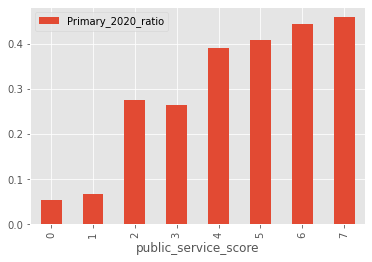

In [14]:
tt = publicworks.loc[publicworks['Parties_Description'] == 'Democratic',:].groupby('public_service_score')[['Primary_2020']].count()

ax = publicworks.loc[(publicworks['Parties_Description'] == 'Democratic')&(publicworks['Primary_2020'] == 1),:].groupby('public_service_score')[['Primary_2020']].count()
ax = pd.merge(ax,tt, right_index=True, left_index=True)

ax['Primary_2020_ratio'] = ax.Primary_2020_x/ax.Primary_2020_y
ax.drop(columns = ['Primary_2020_x', 'Primary_2020_y'], inplace = True)

ax.plot(kind='bar')
ax.set_ylabel("Democratic Voter Turnout")

<AxesSubplot:xlabel='public_service_score'>

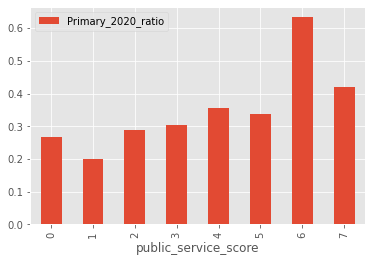

In [15]:
ax = publicworks.loc[(publicworks['Parties_Description'] == 'Republican')&(publicworks['Primary_2020'] == 1),:].groupby('public_service_score')[['Primary_2020']].count()
ax = pd.merge(ax,tt, right_index=True, left_index=True)

ax['Primary_2020_ratio'] = ax.Primary_2020_x/ax.Primary_2020_y
ax.drop(columns = ['Primary_2020_x', 'Primary_2020_y'], inplace = True)
ax.plot(kind='bar')
ax.set_ylabel("Republican Voter Turnout")

Here we see that Democratic voters are a lot more sensitive to having public services to turn up for voting compared to their republican counterparts

In [16]:
pw1 = publicworks[(publicworks['US_Congressional_District'] == 1) & (publicworks['Primary_2020'] == 1)].groupby("Parties_Description")['Primary_2020'].count()
pw2 = publicworks[(publicworks['US_Congressional_District'] == 2) & (publicworks['Primary_2020'] == 1)].groupby("Parties_Description")['Primary_2020'].count()
pw3 = publicworks[(publicworks['US_Congressional_District'] == 3) & (publicworks['Primary_2020'] == 1)].groupby("Parties_Description")['Primary_2020'].count()
pw4 = publicworks[(publicworks['US_Congressional_District'] == 4) & (publicworks['Primary_2020'] == 1)].groupby("Parties_Description")['Primary_2020'].count()

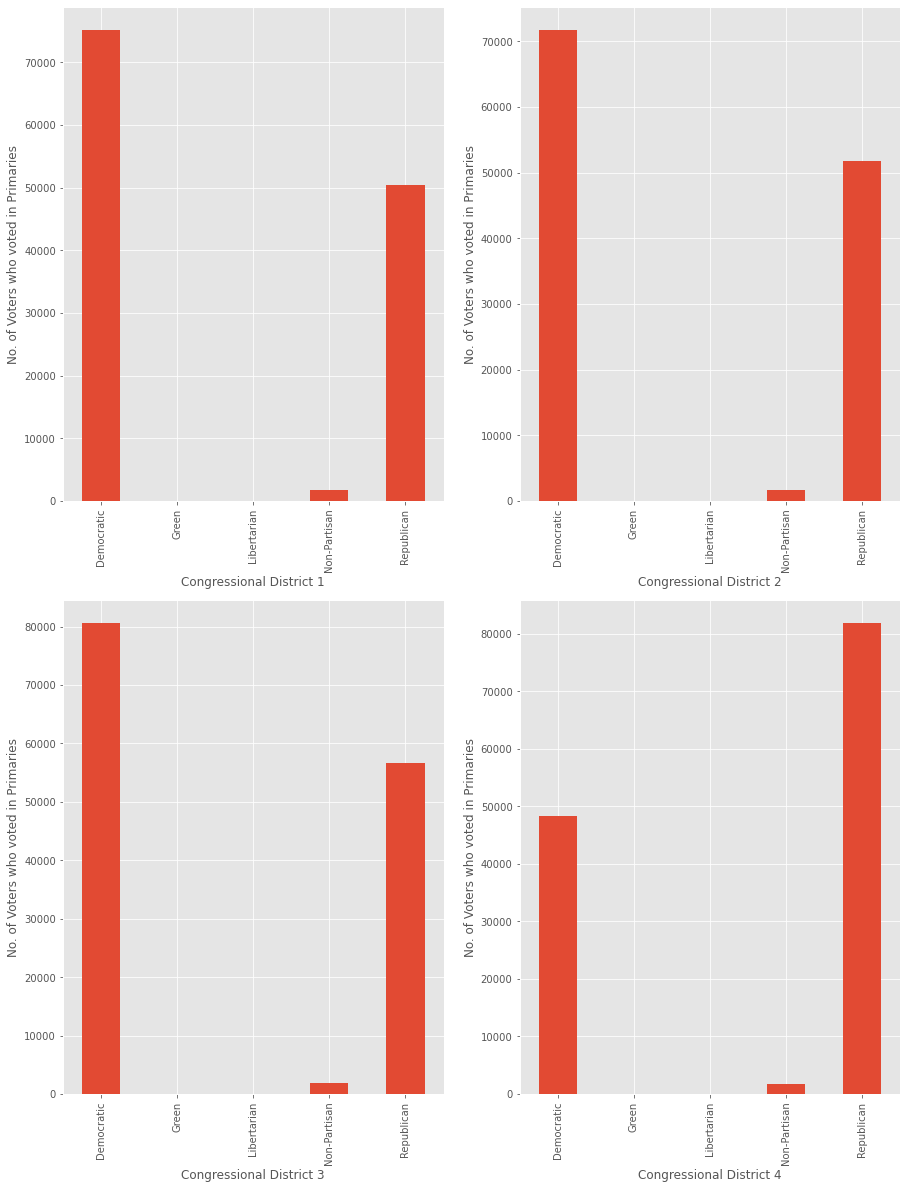

In [17]:
#define number of rows and columns for subplots
nrow=2
ncol=2

# make a list of all dataframes 
pw_list = [pw1 ,pw2, pw3, pw4]
fig, axes = plt.subplots(nrow, ncol)

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        pwplot = pw_list[count].plot(kind='bar',ax=axes[r,c],figsize=(15,20))
        count+=1
        pwplot.set_xlabel("Congressional District " + str(count))
        pwplot.set_ylabel("No. of Voters who voted in Primaries")

We see that Democratic voters enthusiastically turned up for primaries in 3 of the 4 congressional districts. But going by the General results it seems they were discouraged during the General elections.

In [18]:
ps1 = publicworks[(publicworks['Fire_District'] == 1) & (publicworks['Primary_2020'] == 0)].groupby("Parties_Description")['Primary_2020'].count()
ps2 = publicworks[(publicworks['School_District'] == 1) & (publicworks['Primary_2020'] == 0)].groupby("Parties_Description")['Primary_2020'].count()
ps3 = publicworks[(publicworks['Water_District'] == 1) & (publicworks['Primary_2020'] == 0)].groupby("Parties_Description")['Primary_2020'].count()
ps4 = publicworks[(publicworks['Judicial_District'] == 1) & (publicworks['Primary_2020'] == 0)].groupby("Parties_Description")['Primary_2020'].count()
ps5 = publicworks[(publicworks['Community_College'] == 1) & (publicworks['Primary_2020'] == 0)].groupby("Parties_Description")['Primary_2020'].count()
ps6 = publicworks[(publicworks['Community_College_Commissioner_District'] == 1) & (publicworks['Primary_2020'] == 0)].groupby("Parties_Description")['Primary_2020'].count()
ps7 = publicworks[(publicworks['Sanitary_District'] == 1) & (publicworks['Primary_2020'] == 0)].groupby("Parties_Description")['Primary_2020'].count()
ps8 = publicworks[(publicworks['Rural_Service_District'] == 1) & (publicworks['Primary_2020'] == 0)].groupby("Parties_Description")['Primary_2020'].count()

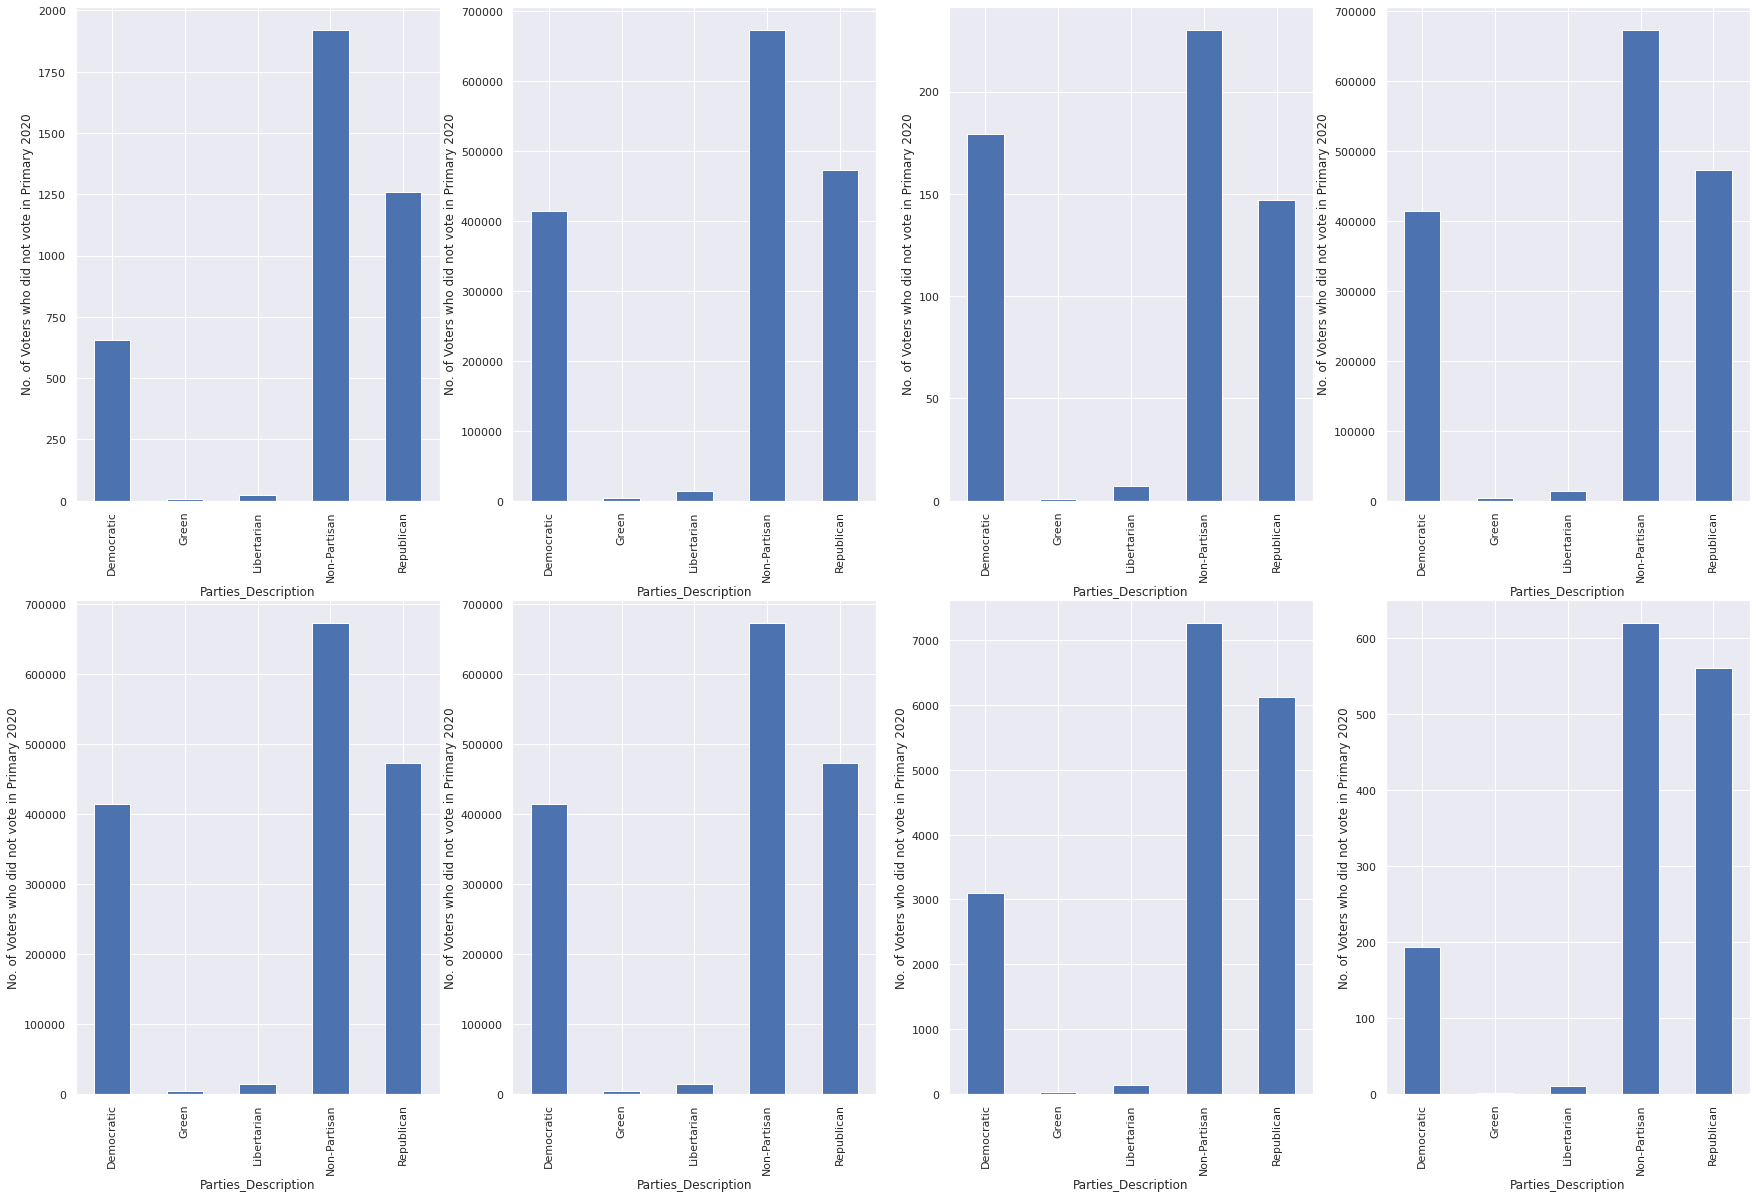

In [212]:
#define number of rows and columns for subplots
nrow=2
ncol=4

# make a list of all dataframes 
ps_list = [ps1 ,ps2, ps3, ps4, ps5, ps6, ps7, ps8]
fig, axes = plt.subplots(nrow, ncol)

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        psplot = ps_list[count].plot(kind='bar',ax=axes[r,c],figsize=(30,20))
        count+=1
        psplot.set_ylabel("No. of Voters who did not vote in Primary 2020")

Non-partisans who end up not voting largely reside in districts outside school districts, judicial and community colleges. Hence bringing these services would be a likely motivator to push them towards becoming voters.

<AxesSubplot:ylabel='public_service_score'>

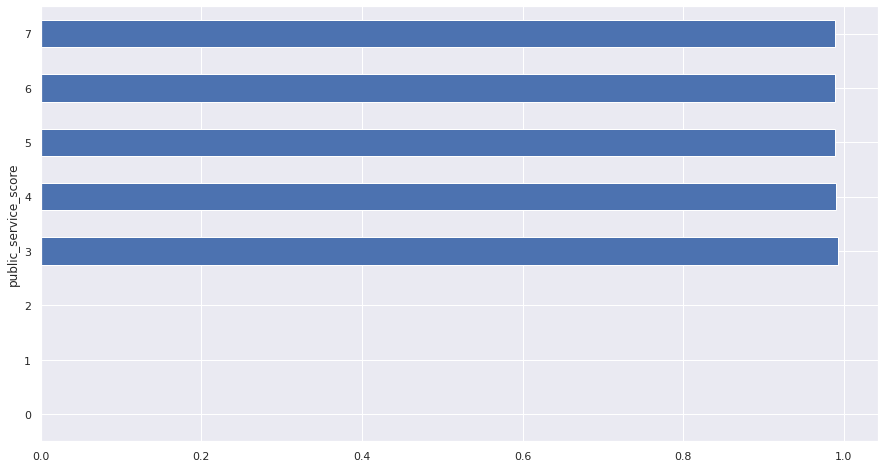

In [228]:
np1 = publicworks[(publicworks['Parties_Description'] == 'Non-Partisan') & (publicworks['Primary_2020'] == 1)].groupby("public_service_score")['Primary_2020'].count()
np0 = publicworks[(publicworks['Parties_Description'] == 'Non-Partisan') & (publicworks['Primary_2020'] == 0)].groupby("public_service_score")['Primary_2020'].count()
np_turnout = np0/(np1 + np0)
np_turnout.plot(kind = 'barh')

Majority of non-partisans live in districts with 3 or more public services, yet none of them show up to vote on primaries.

<AxesSubplot:xlabel='Parties_Description'>

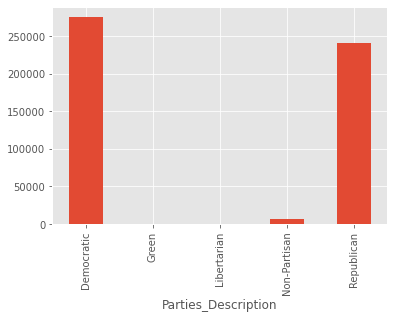

In [21]:
publicworks.groupby('Parties_Description')['Primary_2020'].sum().plot(kind='bar')

In [22]:
publicworks[publicworks['Fire_District'] == 1].Parties_Description.value_counts()

Republican      2439
Non-Partisan    1948
Democratic      1306
Libertarian       22
Green              9
Name: Parties_Description, dtype: int64

In [23]:
publicworksf = publicworks.copy()

<AxesSubplot:xlabel='US_Congressional_District,Parties_Description'>

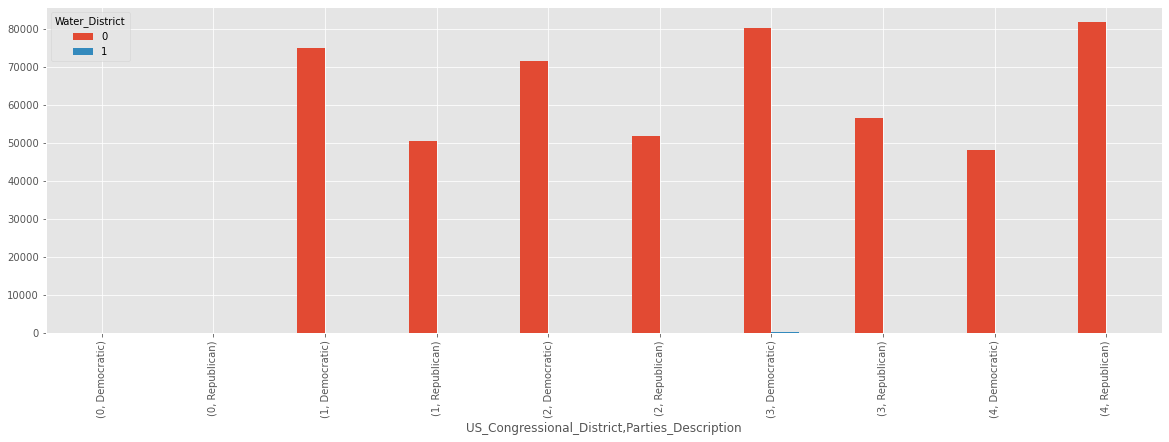

In [24]:
pt1 = pd.pivot_table(publicworks.loc[(publicworks['Parties_Description'] == 'Republican') | (publicworks['Parties_Description'] == 'Democratic'),:], 
                        index=["US_Congressional_District", "Parties_Description"], 
                        columns='Water_District', 
                        values="Primary_2020",
                        aggfunc = 'sum')
pt1.plot(kind='bar', figsize=(20,6))

<AxesSubplot:xlabel='US_Congressional_District,Parties_Description'>

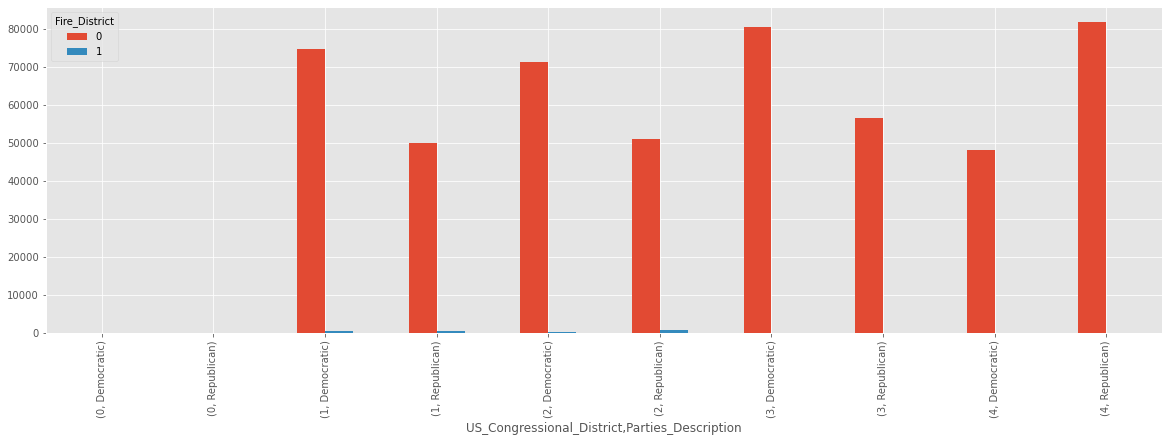

In [25]:
pt1 = pd.pivot_table(publicworks.loc[(publicworks['Parties_Description'] == 'Republican') | (publicworks['Parties_Description'] == 'Democratic'),:], 
                        index=["US_Congressional_District", "Parties_Description"], 
                        columns='Fire_District', 
                        values="Primary_2020",
                        aggfunc = 'sum')
pt1.plot(kind='bar', figsize=(20,6))

<AxesSubplot:xlabel='US_Congressional_District,Parties_Description'>

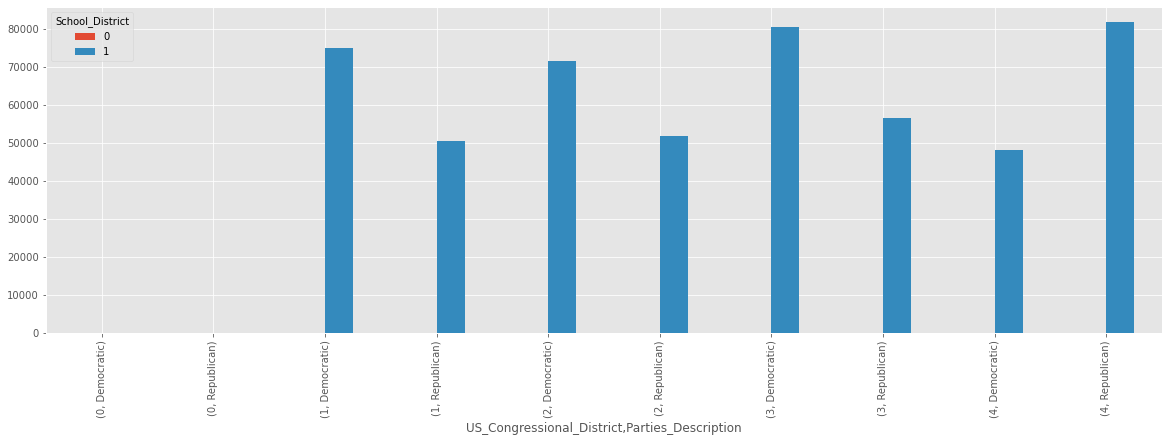

In [26]:
pt1 = pd.pivot_table(publicworks.loc[(publicworks['Parties_Description'] == 'Republican') | (publicworks['Parties_Description'] == 'Democratic'),:], 
                        index=["US_Congressional_District", "Parties_Description"], 
                        columns='School_District', 
                        values="Primary_2020",
                        aggfunc = 'sum')
pt1.plot(kind='bar', figsize=(20,6))

<AxesSubplot:xlabel='US_Congressional_District,Parties_Description'>

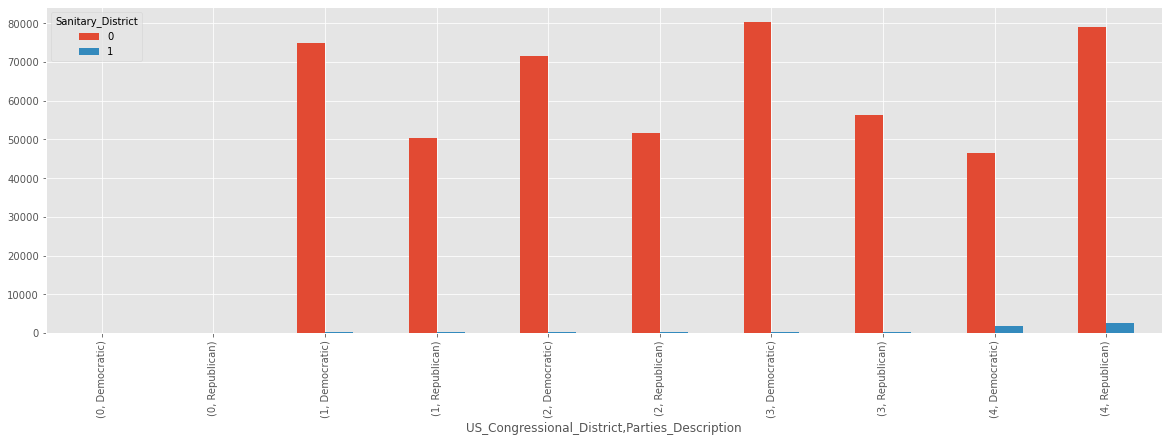

In [27]:
pt1 = pd.pivot_table(publicworks.loc[(publicworks['Parties_Description'] == 'Republican') | (publicworks['Parties_Description'] == 'Democratic'),:], 
                        index=["US_Congressional_District", "Parties_Description"], 
                        columns='Sanitary_District', 
                        values="Primary_2020",
                        aggfunc = 'sum')
pt1.plot(kind='bar', figsize=(20,6))

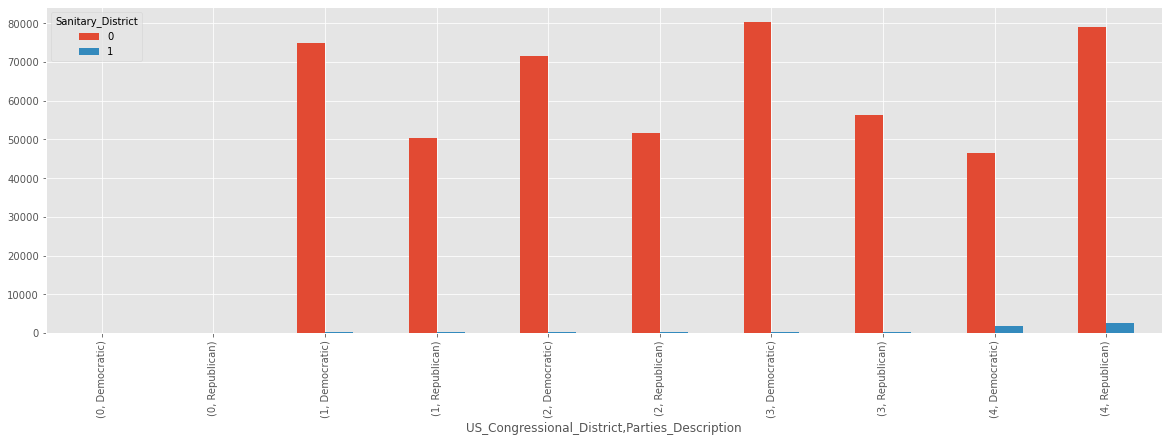

In [28]:
pt1.plot(kind='bar', figsize=(20,6))
pt1 = pd.pivot_table(publicworksf.loc[(publicworksf['Parties_Description'] == 'Republican') | (publicworksf['Parties_Description'] == 'Democratic'),:], 
                     index=["US_Congressional_District", "Parties_Description"], 
                     columns="Fire_District", 
                     values="Primary_2020",
                     aggfunc = 'sum')

We see that school districts overwhelmingly contribute to voter participation and hence districts lacking in them like Congressional District 4 should be improving those if they want larger turnouts.

## Public Service Modeling

In [30]:
pww = publicworks[['Parties_Description','County_Supervisorial_District','Rural_Service_District','Sanitary_District','School_District','Water_District','Fire_District','Judicial_District','Land_Commission','Community_College','Community_College_Commissioner_District','Primary_2020']]

In [31]:
public_works_ml = spark.createDataFrame(pww)

In [32]:
public_works_ml = public_works_ml.repartition(20)
print("data was re-partitioned to {} partitions!".format(public_works_ml.rdd.getNumPartitions()))
public_works_ml.cache()

22/05/01 23:05:53 WARN org.apache.spark.scheduler.TaskSetManager: Stage 3 contains a task of very large size (39703 KiB). The maximum recommended task size is 1000 KiB.


data was re-partitioned to 20 partitions!


DataFrame[Parties_Description: string, County_Supervisorial_District: bigint, Rural_Service_District: bigint, Sanitary_District: bigint, School_District: bigint, Water_District: bigint, Fire_District: bigint, Judicial_District: bigint, Land_Commission: bigint, Community_College: bigint, Community_College_Commissioner_District: bigint, Primary_2020: bigint]

In [33]:
public_works_ml_demo = public_works_ml.filter(public_works_ml.Parties_Description == "Democratic") 
public_works_ml_demo = public_works_ml_demo.drop(col("Parties_Description")) 

In [34]:
public_works_ml_repu = public_works_ml.filter(public_works_ml.Parties_Description == "Republican") 
public_works_ml_repu = public_works_ml_repu.drop(col("Parties_Description")) 

In [35]:
# construct AUC evaluator

from pyspark.ml.evaluation import BinaryClassificationEvaluator
aucEvaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')

In [36]:
from pyspark.ml.feature import RFormula

supervised = RFormula(formula="Primary_2020 ~ . ")

In [37]:
fittedRF_demo = supervised.fit(public_works_ml_demo)
fittedRF_repu = supervised.fit(public_works_ml_repu)

In [38]:
preparedDF_demo = fittedRF_demo.transform(public_works_ml_demo)
preparedDF_repu = fittedRF_repu.transform(public_works_ml_repu)

In [39]:
preparedDF_demo.select('features', 'label').show(2, False)

22/05/01 23:06:03 WARN org.apache.spark.scheduler.TaskSetManager: Stage 4 contains a task of very large size (39703 KiB). The maximum recommended task size is 1000 KiB.


+-----------------------------------------+-----+
|features                                 |label|
+-----------------------------------------+-----+
|[1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0]|1.0  |
|[1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0]|1.0  |
+-----------------------------------------+-----+
only showing top 2 rows



In [40]:
preparedDF_repu.select('features', 'label').show(2, False)

+--------------------------------------+-----+
|features                              |label|
+--------------------------------------+-----+
|(10,[0,3,6,8,9],[1.0,1.0,1.0,1.0,1.0])|0.0  |
|(10,[0,3,6,8,9],[1.0,1.0,1.0,1.0,1.0])|0.0  |
+--------------------------------------+-----+
only showing top 2 rows



In [41]:
# feature columns for Democratic
featureCols_demo = pd.DataFrame(
  preparedDF_demo.schema["features"].metadata["ml_attr"]["attrs"]["numeric"]).sort_values("idx")

featureCols_demo = featureCols_demo.set_index('idx')
featureCols_demo.head()
# feature columns for Republican
featureCols_repu = pd.DataFrame(
  preparedDF_repu.schema["features"].metadata["ml_attr"]["attrs"]["numeric"]).sort_values("idx")

featureCols_repu = featureCols_repu.set_index('idx')

In [42]:
train, test = preparedDF_demo.randomSplit([0.7, 0.3], seed = 843)
train.show(1)

+-----------------------------+----------------------+-----------------+---------------+--------------+-------------+-----------------+---------------+-----------------+---------------------------------------+------------+----------+-----+
|County_Supervisorial_District|Rural_Service_District|Sanitary_District|School_District|Water_District|Fire_District|Judicial_District|Land_Commission|Community_College|Community_College_Commissioner_District|Primary_2020|  features|label|
+-----------------------------+----------------------+-----------------+---------------+--------------+-------------+-----------------+---------------+-----------------+---------------------------------------+------------+----------+-----+
|                            0|                     0|                0|              0|             0|            0|                0|              0|                0|                                      0|           0|(10,[],[])|  0.0|
+-----------------------------+---------

In [43]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(regParam = .01,threshold=.2)

In [44]:
lrModel = lr.fit(train)

22/05/01 23:06:34 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
22/05/01 23:06:34 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS
22/05/01 23:06:42 ERROR breeze.optimize.LBFGS: Failure! Resetting history: breeze.optimize.FirstOrderException: Line search failed
22/05/01 23:06:49 ERROR breeze.optimize.LBFGS: Failure! Resetting history: breeze.optimize.FirstOrderException: Line search failed


Text(0, 0.5, 'Beta Coefficients')

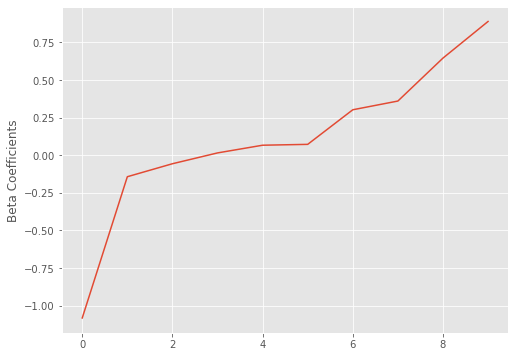

In [45]:
plt.rcParams["figure.figsize"] = (8,6)
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')

In [46]:
coefsArray = np.array(lrModel.coefficients)  # convert to np.array
coefsDF = pd.DataFrame(coefsArray, columns=['coefs'])  # to pandas

coefsDF = coefsDF.merge(featureCols_demo, left_index=True, right_index=True)  # join it with featureCols we created above
coefsDF.sort_values('coefs', inplace=True)  # Sort them
coefsDF.head(10)

,coefs,name
6,-1.081532,Judicial_District
3,-0.142885,School_District
4,-0.056591,Water_District
7,0.015318,Land_Commission
2,0.066488,Sanitary_District
0,0.072205,County_Supervisorial_District
8,0.302063,Community_College
5,0.360013,Fire_District
1,0.645443,Rural_Service_District
9,0.888854,Community_College_Commissioner_District


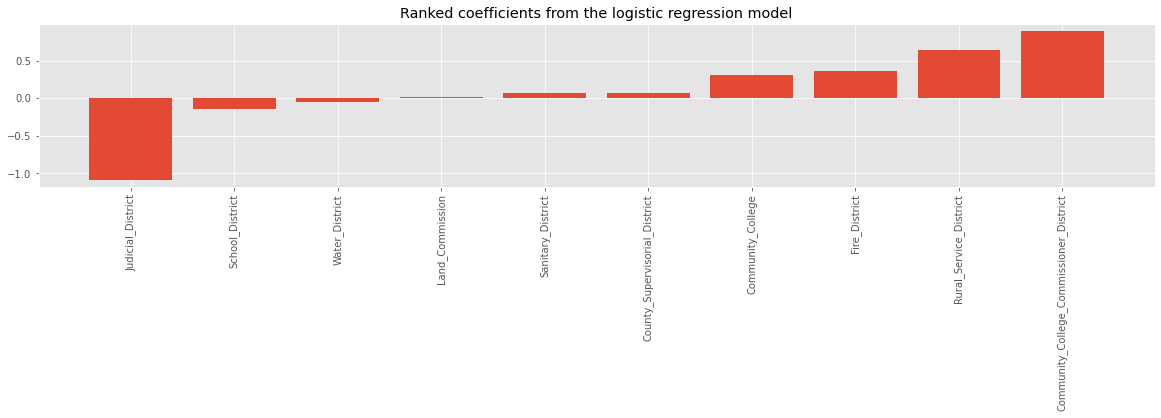

In [47]:
plt.rcParams["figure.figsize"] = (20,3)
plt.xticks(rotation=90)
plt.bar(coefsDF.name, coefsDF.coefs)
plt.title('Ranked coefficients from the logistic regression model')
plt.show()

In [48]:
summary = lrModel.summary
print('Test AUC:', aucEvaluator.evaluate(lrModel.transform(test)))
print('Train AUC:', summary.areaUnderROC)
test_auc_baseline = aucEvaluator.evaluate(lrModel.transform(test))

Test AUC: 0.5109060493956576


Train AUC: 0.5102661177508514


In [49]:
train, test = preparedDF_repu.randomSplit([0.7, 0.3], seed = 843)
train.show(1)

+-----------------------------+----------------------+-----------------+---------------+--------------+-------------+-----------------+---------------+-----------------+---------------------------------------+------------+----------+-----+
|County_Supervisorial_District|Rural_Service_District|Sanitary_District|School_District|Water_District|Fire_District|Judicial_District|Land_Commission|Community_College|Community_College_Commissioner_District|Primary_2020|  features|label|
+-----------------------------+----------------------+-----------------+---------------+--------------+-------------+-----------------+---------------+-----------------+---------------------------------------+------------+----------+-----+
|                            0|                     0|                0|              0|             0|            0|                0|              0|                0|                                      0|           0|(10,[],[])|  0.0|
+-----------------------------+---------

In [50]:
lr = LogisticRegression(regParam = .01,threshold=.2)
lrModel = lr.fit(train)

22/05/01 23:07:35 ERROR breeze.optimize.LBFGS: Failure! Resetting history: breeze.optimize.FirstOrderException: Line search failed
22/05/01 23:07:41 ERROR breeze.optimize.LBFGS: Failure! Resetting history: breeze.optimize.FirstOrderException: Line search failed
22/05/01 23:07:45 ERROR breeze.optimize.LBFGS: Failure! Resetting history: breeze.optimize.FirstOrderException: Line search failed
22/05/01 23:07:50 ERROR breeze.optimize.LBFGS: Failure! Resetting history: breeze.optimize.FirstOrderException: Line search failed
22/05/01 23:07:55 ERROR breeze.optimize.LBFGS: Failure! Resetting history: breeze.optimize.FirstOrderException: Line search failed
22/05/01 23:07:59 ERROR breeze.optimize.LBFGS: Failure! Resetting history: breeze.optimize.FirstOrderException: Line search failed
22/05/01 23:08:04 ERROR breeze.optimize.LBFGS: Failure! Resetting history: breeze.optimize.FirstOrderException: Line search failed
22/05/01 23:08:09 ERROR breeze.optimize.LBFGS: Failure! Resetting history: breeze.o

Text(0, 0.5, 'Beta Coefficients')

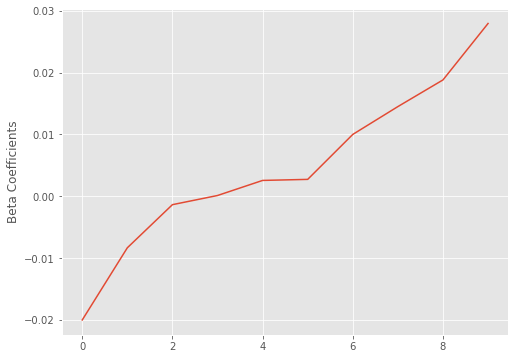

In [51]:
plt.rcParams["figure.figsize"] = (8,6)
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')

In [52]:
coefsArray = np.array(lrModel.coefficients)  # convert to np.array
coefsDF = pd.DataFrame(coefsArray, columns=['coefs'])  # to pandas

coefsDF = coefsDF.merge(featureCols_repu, left_index=True, right_index=True)  # join it with featureCols we created above
coefsDF.sort_values('coefs', inplace=True)  # Sort them
coefsDF.head(10)

,coefs,name
6,-0.019989,Judicial_District
8,-0.008317,Community_College
0,-0.001344,County_Supervisorial_District
2,0.000137,Sanitary_District
4,0.002574,Water_District
1,0.002744,Rural_Service_District
3,0.010014,School_District
7,0.014513,Land_Commission
9,0.018824,Community_College_Commissioner_District
5,0.027953,Fire_District


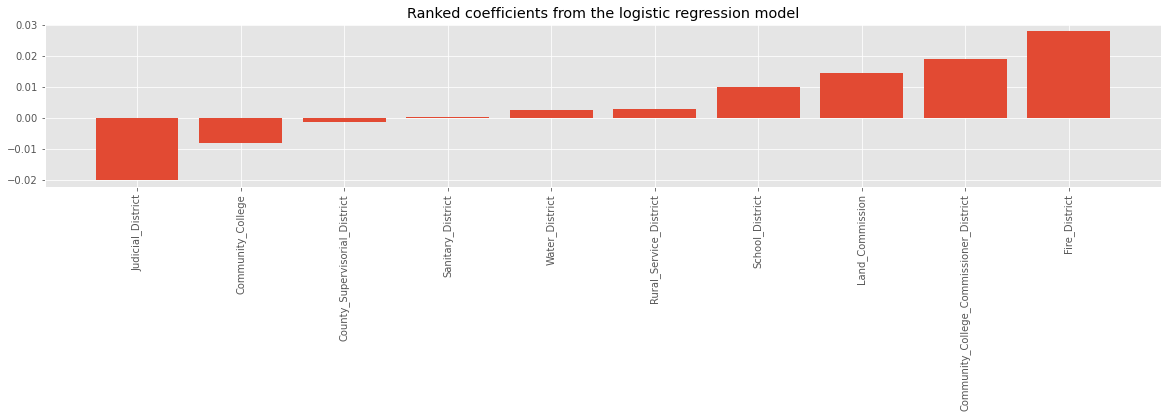

In [53]:
plt.rcParams["figure.figsize"] = (20,3)
plt.xticks(rotation=90)
plt.bar(coefsDF.name, coefsDF.coefs)
plt.title('Ranked coefficients from the logistic regression model')
plt.show()

In [54]:
print('Test AUC:', aucEvaluator.evaluate(lrModel.transform(test)))
print('Train AUC:', summary.areaUnderROC)
test_auc_baseline = aucEvaluator.evaluate(lrModel.transform(test))

Test AUC: 0.5046195290106843
Train AUC: 0.5102661177508514


Public services do not have a significant contribution inpredicting the outcome of turnouts.

# Big model

We took all the most important features from the individual models, and created a larger model. Unfortunately, the public service data was not collected as thorougly for other states, so we had to drop those features in our final model.

In [426]:
df = spark.read.format("csv")\
 .option("header", "true")\
 .option("nullValue", "NA")\
 .option("delimiter","\t")\
 .option("inferSchema", "true")\
 .load(data + "VM2Uniform--IA--2021-03-04.tab")

In [427]:
df_big_ml = df.select('Parties_Description',
'Ethnic_Description',
'CommercialData_EstimatedAreaMedianHHIncome',
'CommercialData_ISPSA',              
'Primary_2020')

df_big_ml= df_big_ml.na.fill(value='N')

In [428]:
[(c, df_big_ml.where(col(c).isNull()).count()) for c in df_big_ml.columns]

[('Parties_Description', 0),
 ('Ethnic_Description', 0),
 ('CommercialData_EstimatedAreaMedianHHIncome', 0),
 ('CommercialData_ISPSA', 75912),
 ('Primary_2020', 0)]

In [429]:
df_big_ml = df_big_ml.dropna()

In [430]:
import pyspark.sql.functions as f
df_big_ml = df_big_ml.withColumn('CommercialData_EstimatedAreaMedianHHIncome', f.regexp_replace('CommercialData_EstimatedAreaMedianHHIncome', '[$,]', '').cast('integer'))




In [431]:
df_big_ml.show()

+-------------------+------------------+------------------------------------------+--------------------+------------+
|Parties_Description|Ethnic_Description|CommercialData_EstimatedAreaMedianHHIncome|CommercialData_ISPSA|Primary_2020|
+-------------------+------------------+------------------------------------------+--------------------+------------+
|         Democratic|             Irish|                                     66266|                   6|           N|
|       Non-Partisan|             Czech|                                     66266|                   6|           N|
|       Non-Partisan|                 N|                                     66266|                   6|           N|
|       Non-Partisan|     English/Welsh|                                     66266|                   6|           N|
|         Democratic|     English/Welsh|                                     69948|                   2|           N|
|         Republican|     English/Welsh|                

### Model for training and predicting on primaries

## Democratic Presidential Primary 2020

In [432]:
df_big_ml_dem=df_big_ml.filter(df_big_ml.Parties_Description == 'Democratic')

df_big_ml_dem = df_big_ml_dem.drop('Parties_Description')




df_big_ml_dem.printSchema



<bound method DataFrame.printSchema of DataFrame[Ethnic_Description: string, CommercialData_EstimatedAreaMedianHHIncome: int, CommercialData_ISPSA: int, Primary_2020: string]>

In [433]:
from pyspark.ml.feature import RFormula

supervised = RFormula(formula="Primary_2020 ~ .")

print(supervised)

RFormula(Primary_2020 ~ .) (uid=RFormula_768e9f1d1087)


In [434]:
import pandas as pd
import numpy as np
from pyspark.sql.functions import *
fittedRF = supervised.fit(df_big_ml_dem)

In [435]:
import pandas as pd
import numpy as np
from pyspark.sql.functions import *

preparedDF = fittedRF.transform(df_big_ml_dem)

In [436]:
df_big_ml.show()

+-------------------+------------------+------------------------------------------+--------------------+------------+
|Parties_Description|Ethnic_Description|CommercialData_EstimatedAreaMedianHHIncome|CommercialData_ISPSA|Primary_2020|
+-------------------+------------------+------------------------------------------+--------------------+------------+
|         Democratic|             Irish|                                     66266|                   6|           N|
|       Non-Partisan|             Czech|                                     66266|                   6|           N|
|       Non-Partisan|                 N|                                     66266|                   6|           N|
|       Non-Partisan|     English/Welsh|                                     66266|                   6|           N|
|         Democratic|     English/Welsh|                                     69948|                   2|           N|
|         Republican|     English/Welsh|                

In [437]:
preparedDF.select('features', 'label').distinct().show( truncate=False)

+---------------------------------+-----+
|features                         |label|
+---------------------------------+-----+
|(78,[5,76],[1.0,57044.0])        |0.0  |
|(78,[0,76,77],[1.0,65947.0,6.0]) |1.0  |
|(78,[0,76,77],[1.0,68897.0,1.0]) |0.0  |
|(78,[1,76,77],[1.0,69791.0,4.0]) |0.0  |
|(78,[3,76],[1.0,65155.0])        |0.0  |
|(78,[10,76,77],[1.0,77666.0,8.0])|1.0  |
|(78,[9,76,77],[1.0,101374.0,9.0])|1.0  |
|(78,[15,76,77],[1.0,95786.0,6.0])|0.0  |
|(78,[1,76,77],[1.0,86708.0,6.0]) |1.0  |
|(78,[4,76,77],[1.0,80481.0,5.0]) |1.0  |
|(78,[6,76,77],[1.0,74707.0,5.0]) |0.0  |
|(78,[9,76],[1.0,42840.0])        |0.0  |
|(78,[21,76,77],[1.0,61918.0,4.0])|0.0  |
|(78,[7,76],[1.0,34510.0])        |1.0  |
|(78,[6,76,77],[1.0,65947.0,6.0]) |0.0  |
|(78,[28,76,77],[1.0,74249.0,7.0])|1.0  |
|(78,[4,76,77],[1.0,67726.0,4.0]) |1.0  |
|(78,[23,76,77],[1.0,86110.0,7.0])|1.0  |
|(78,[7,76],[1.0,42840.0])        |0.0  |
|(78,[16,76],[1.0,49218.0])       |0.0  |
+---------------------------------

In [370]:
featureCols = pd.DataFrame(preparedDF.schema["features"].metadata["ml_attr"]["attrs"]["binary"]+
  preparedDF.schema["features"].metadata["ml_attr"]["attrs"]["numeric"]).sort_values("idx")

featureCols = featureCols.set_index('idx')
featureCols.head(15)


,name
idx,
0,Ethnic_Description_English/Welsh
1,Ethnic_Description_German
2,Ethnic_Description_N
3,Ethnic_Description_Irish
4,Ethnic_Description_Scots
5,Ethnic_Description_Hispanic
6,Ethnic_Description_Dutch (Netherlands)
7,Ethnic_Description_Likely Af-Am (Modeled)
8,Ethnic_Description_Swedish


In [371]:
train, test = preparedDF.randomSplit([0.7, 0.3], seed = 891)

In [473]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(regParam = .01,threshold=.2)

In [474]:
lrModel_dem = lr.fit(train)

In [384]:
coefsArray = np.array(lrModel.coefficients)  # convert to np.array
coefsDF = pd.DataFrame(coefsArray, columns=['coefs'])  # to pandas

coefsDF = coefsDF.merge(featureCols, left_index=True, right_index=True)  # join it with featureCols we created above
coefsDF.sort_values('coefs', inplace=True)  # Sort them
coefsDF.head(100)



,coefs,name
69,-3.369687,Ethnic_Description_Australian
70,-3.319116,Ethnic_Description_Azerb
68,-3.306644,Ethnic_Description_Mongolian
67,-3.273022,Ethnic_Description_Chechnian
66,-3.156452,Ethnic_Description_Bhutanese
75,-2.911350,Ethnic_Description_Malay
71,-2.748242,Ethnic_Description_Multi-Ethnic
74,-2.686951,Ethnic_Description_Kirghiz
46,-1.339339,Ethnic_Description_Bosnian Muslim
48,-1.180560,Ethnic_Description_Myanmar (Burmese)


In [385]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
print(coefsDF)

       coefs                                                        name
69 -3.369687  Ethnic_Description_Australian                             
70 -3.319116  Ethnic_Description_Azerb                                  
68 -3.306644  Ethnic_Description_Mongolian                              
67 -3.273022  Ethnic_Description_Chechnian                              
66 -3.156452  Ethnic_Description_Bhutanese                              
75 -2.911350  Ethnic_Description_Malay                                  
71 -2.748242  Ethnic_Description_Multi-Ethnic                           
74 -2.686951  Ethnic_Description_Kirghiz                                
46 -1.339339  Ethnic_Description_Bosnian Muslim                         
48 -1.180560  Ethnic_Description_Myanmar (Burmese)                      
50 -1.041115  Ethnic_Description_Albanian                               
47 -1.011809  Ethnic_Description_Khmer                                  
59 -0.849390  Ethnic_Description_Afghan            

/tmp/ipykernel_2563/2581669713.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [386]:
summary = lrModel_dem.summary

Text(0, 0.5, 'precision')

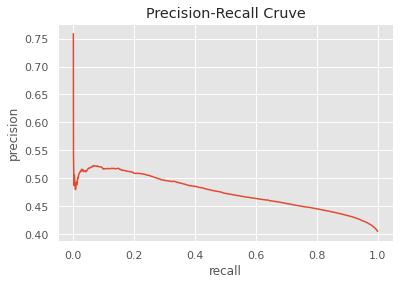

In [387]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pr = summary.pr.toPandas()
pr.plot(x='recall', y='precision', style='-', legend=False)
plt.title('Precision-Recall Cruve')
plt.ylabel('precision')

In [388]:
lrModel_dem.params

[Param(parent='LogisticRegression_6e75cf345024', name='aggregationDepth', doc='suggested depth for treeAggregate (>= 2).'),
 Param(parent='LogisticRegression_6e75cf345024', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'),
 Param(parent='LogisticRegression_6e75cf345024', name='family', doc='The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial'),
 Param(parent='LogisticRegression_6e75cf345024', name='featuresCol', doc='features column name.'),
 Param(parent='LogisticRegression_6e75cf345024', name='fitIntercept', doc='whether to fit an intercept term.'),
 Param(parent='LogisticRegression_6e75cf345024', name='labelCol', doc='label column name.'),
 Param(parent='LogisticRegression_6e75cf345024', name='lowerBoundsOnCoefficients', doc='The lower bounds on coefficients if fitting under bound cons

In [475]:
# Your answer goes here
fittedTest = lrModel_dem.transform(test)

In [391]:
fittedTest.select("label", "prediction", "rawPrediction").show(30, False)
fittedTest.select('prediction').distinct()

+-----+----------+------------------------------------------+
|label|prediction|rawPrediction                             |
+-----+----------+------------------------------------------+
|0.0  |0.0       |[1.6575117424530963,-1.6575117424530963]  |
|1.0  |0.0       |[1.5386706267434316,-1.5386706267434316]  |
|1.0  |0.0       |[1.5386706267434316,-1.5386706267434316]  |
|0.0  |0.0       |[1.5161718493687355,-1.5161718493687355]  |
|0.0  |0.0       |[1.5161718493687355,-1.5161718493687355]  |
|0.0  |0.0       |[1.5161718493687355,-1.5161718493687355]  |
|0.0  |0.0       |[1.4127711724145664,-1.4127711724145664]  |
|0.0  |0.0       |[1.5372567086906148,-1.5372567086906148]  |
|0.0  |0.0       |[1.141151621449344,-1.141151621449344]    |
|0.0  |0.0       |[1.1624936096555054,-1.1624936096555054]  |
|0.0  |0.0       |[1.2700857782342108,-1.2700857782342108]  |
|1.0  |0.0       |[1.1732550350841882,-1.1732550350841882]  |
|0.0  |0.0       |[1.3411827871704567,-1.3411827871704567]  |
|1.0  |0

DataFrame[prediction: double]

In [476]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

aucEvaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')

In [477]:
# Your answer goes here
print('Test AUC:', aucEvaluator.evaluate(lrModel_dem.transform(test)))
print('Train AUC:', summary.areaUnderROC)

Test AUC: 0.5950215183477408
Train AUC: 0.5934389705086128


## Republican Presidential Primary 2020

In [393]:
df_big_ml_rep = df_big_ml.filter(df_big_ml.Parties_Description == 'Republican')

df_big_ml_rep = df_big_ml_dem.drop('Parties_Description')




df_big_ml_rep.printSchema



<bound method DataFrame.printSchema of DataFrame[Ethnic_Description: string, CommercialData_EstimatedAreaMedianHHIncome: int, CommercialData_ISPSA: int, Primary_2020: string]>

In [394]:
from pyspark.ml.feature import RFormula

supervised = RFormula(formula="Primary_2020 ~ .")

print(supervised)

RFormula(Primary_2020 ~ .) (uid=RFormula_79e0ea1023cb)


In [395]:
import pandas as pd
import numpy as np
from pyspark.sql.functions import *
fittedRF = supervised.fit(df_big_ml_rep)

In [396]:
import pandas as pd
import numpy as np
from pyspark.sql.functions import *

preparedDF = fittedRF.transform(df_big_ml_rep)

In [397]:
preparedDF.select('features', 'label').distinct().show( truncate=False)

+---------------------------------+-----+
|features                         |label|
+---------------------------------+-----+
|(78,[9,76,77],[1.0,62785.0,5.0]) |0.0  |
|(78,[3,76,77],[1.0,70160.0,1.0]) |1.0  |
|(78,[5,76,77],[1.0,57050.0,2.0]) |0.0  |
|(78,[2,76],[1.0,60220.0])        |1.0  |
|(78,[2,76,77],[1.0,79544.0,8.0]) |1.0  |
|(78,[13,76,77],[1.0,71412.0,1.0])|0.0  |
|(78,[10,76,77],[1.0,67097.0,1.0])|1.0  |
|(78,[4,76,77],[1.0,80481.0,5.0]) |1.0  |
|(78,[8,76,77],[1.0,88499.0,8.0]) |0.0  |
|(78,[3,76,77],[1.0,123803.0,8.0])|0.0  |
|(78,[1,76,77],[1.0,123803.0,8.0])|0.0  |
|(78,[21,76,77],[1.0,84582.0,7.0])|0.0  |
|(78,[2,76,77],[1.0,94453.0,5.0]) |1.0  |
|(78,[6,76,77],[1.0,72580.0,7.0]) |1.0  |
|(78,[5,76,77],[1.0,71249.0,3.0]) |0.0  |
|(78,[2,76,77],[1.0,47282.0,1.0]) |1.0  |
|(78,[4,76,77],[1.0,65155.0,5.0]) |1.0  |
|(78,[9,76,77],[1.0,91410.0,3.0]) |0.0  |
|(78,[6,76,77],[1.0,74008.0,5.0]) |1.0  |
|(78,[2,76,77],[1.0,56428.0,3.0]) |0.0  |
+---------------------------------

In [398]:
featureCols = pd.DataFrame(preparedDF.schema["features"].metadata["ml_attr"]["attrs"]["binary"]+
  preparedDF.schema["features"].metadata["ml_attr"]["attrs"]["numeric"]).sort_values("idx")

featureCols = featureCols.set_index('idx')
featureCols.head(15)


,name
idx,
0,Ethnic_Description_English/Welsh
1,Ethnic_Description_German
2,Ethnic_Description_N
3,Ethnic_Description_Irish
4,Ethnic_Description_Scots
5,Ethnic_Description_Hispanic
6,Ethnic_Description_Dutch (Netherlands)
7,Ethnic_Description_Likely Af-Am (Modeled)
8,Ethnic_Description_Swedish


In [399]:
train, test = preparedDF.randomSplit([0.7, 0.3], seed = 891)

In [400]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(regParam = .01,threshold=.7)

In [401]:
lrModel_rep = lr.fit(train)

In [402]:
coefsArray = np.array(lrModel.coefficients)  # convert to np.array
coefsDF = pd.DataFrame(coefsArray, columns=['coefs'])  # to pandas

coefsDF = coefsDF.merge(featureCols, left_index=True, right_index=True)  # join it with featureCols we created above
coefsDF.sort_values('coefs', inplace=True)  # Sort them
coefsDF.head(100)



,coefs,name
69,-3.369687,Ethnic_Description_Australian
70,-3.319116,Ethnic_Description_Azerb
68,-3.306644,Ethnic_Description_Mongolian
67,-3.273022,Ethnic_Description_Chechnian
66,-3.156452,Ethnic_Description_Bhutanese
75,-2.911350,Ethnic_Description_Malay
71,-2.748242,Ethnic_Description_Multi-Ethnic
74,-2.686951,Ethnic_Description_Kirghiz
46,-1.339339,Ethnic_Description_Bosnian Muslim
48,-1.180560,Ethnic_Description_Myanmar (Burmese)


In [403]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
print(coefsDF)

       coefs                                                        name
69 -3.369687  Ethnic_Description_Australian                             
70 -3.319116  Ethnic_Description_Azerb                                  
68 -3.306644  Ethnic_Description_Mongolian                              
67 -3.273022  Ethnic_Description_Chechnian                              
66 -3.156452  Ethnic_Description_Bhutanese                              
75 -2.911350  Ethnic_Description_Malay                                  
71 -2.748242  Ethnic_Description_Multi-Ethnic                           
74 -2.686951  Ethnic_Description_Kirghiz                                
46 -1.339339  Ethnic_Description_Bosnian Muslim                         
48 -1.180560  Ethnic_Description_Myanmar (Burmese)                      
50 -1.041115  Ethnic_Description_Albanian                               
47 -1.011809  Ethnic_Description_Khmer                                  
59 -0.849390  Ethnic_Description_Afghan            

/tmp/ipykernel_2563/2581669713.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [404]:
summary = lrModel.summary

Text(0, 0.5, 'precision')

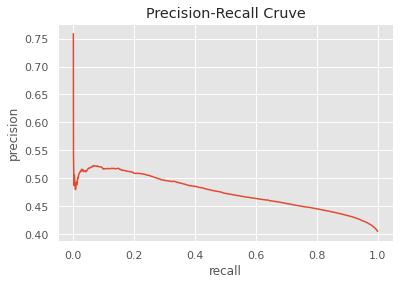

In [405]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pr = summary.pr.toPandas()
pr.plot(x='recall', y='precision', style='-', legend=False)
plt.title('Precision-Recall Cruve')
plt.ylabel('precision')

In [406]:
lrModel_rep.params

[Param(parent='LogisticRegression_6e75cf345024', name='aggregationDepth', doc='suggested depth for treeAggregate (>= 2).'),
 Param(parent='LogisticRegression_6e75cf345024', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'),
 Param(parent='LogisticRegression_6e75cf345024', name='family', doc='The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial'),
 Param(parent='LogisticRegression_6e75cf345024', name='featuresCol', doc='features column name.'),
 Param(parent='LogisticRegression_6e75cf345024', name='fitIntercept', doc='whether to fit an intercept term.'),
 Param(parent='LogisticRegression_6e75cf345024', name='labelCol', doc='label column name.'),
 Param(parent='LogisticRegression_6e75cf345024', name='lowerBoundsOnCoefficients', doc='The lower bounds on coefficients if fitting under bound cons

In [407]:
# Your answer goes here
fittedTest = lrModel_rep.transform(test)

In [408]:
fittedTest.select("label", "prediction", "rawPrediction").show(30, False)
fittedTest.select('prediction').distinct()

+-----+----------+------------------------------------------+
|label|prediction|rawPrediction                             |
+-----+----------+------------------------------------------+
|0.0  |0.0       |[1.657511741929968,-1.657511741929968]    |
|1.0  |0.0       |[1.5386706262932508,-1.5386706262932508]  |
|1.0  |0.0       |[1.5386706262932508,-1.5386706262932508]  |
|0.0  |0.0       |[1.5161718489917495,-1.5161718489917495]  |
|0.0  |0.0       |[1.5161718489917495,-1.5161718489917495]  |
|0.0  |0.0       |[1.5161718489917495,-1.5161718489917495]  |
|0.0  |0.0       |[1.4127711722727367,-1.4127711722727367]  |
|0.0  |0.0       |[1.5372567082956508,-1.5372567082956508]  |
|0.0  |0.0       |[1.1411516219380822,-1.1411516219380822]  |
|0.0  |0.0       |[1.1624936101254293,-1.1624936101254293]  |
|0.0  |0.0       |[1.2700857785059587,-1.2700857785059587]  |
|1.0  |0.0       |[1.1732550356203362,-1.1732550356203362]  |
|0.0  |0.0       |[1.3411827873627578,-1.3411827873627578]  |
|1.0  |0

DataFrame[prediction: double]

In [409]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

aucEvaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')

In [410]:
# Your answer goes here
print('Test AUC:', aucEvaluator.evaluate(lrModel_rep.transform(test)))
print('Train AUC:', summary.areaUnderROC)

Test AUC: 0.5950161465266806
Train AUC: 0.5934389705086128


# New Hampshire

In [552]:
data = "gs://state_voter_info/"

In [59]:
df = spark.read.format("csv")\
 .option("header", "true")\
 .option("nullValue", "NA")\
 .option("delimiter","\t")\
 .option("inferSchema", "true")\
 .load(data + "VM2Uniform--NH--2021-03-25.tab")

In [554]:
# Custom columns for ethnics dataframe
columns_ethnic=['SEQUENCE',
'LALVOTERID',
'Voters_Active',
'Voters_StateVoterID',
'Voters_CountyVoterID',
'Ethnic_Description',
'Parties_Description',
'EthnicGroups_EthnicGroup1Desc',
'CountyEthnic_LALEthnicCode',
'CountyEthnic_Description',
'US_Congressional_District',
'AddressDistricts_Change_Changed_CD',
'State_Senate_District',
'AddressDistricts_Change_Changed_SD',
'State_House_District',
'AddressDistricts_Change_Changed_HD',
'State_Legislative_District',
'AddressDistricts_Change_Changed_LD',
'2001_US_Congressional_District',
'2001_State_Senate_District',
'2001_State_House_District',
'2001_State_Legislative_District',
'County',
'Residence_Addresses_State',
'Voters_FIPS',
'AddressDistricts_Change_Changed_County',
'CommercialDataLL_Donates_to_Conservative_Causes',
'CommercialDataLL_Donates_to_Healthcare',
'CommercialDataLL_Donates_to_International_Aid_Causes',
'CommercialDataLL_Donates_to_Liberal_Causes',
'CommercialDataLL_Donates_to_Local_Community',
'CommercialDataLL_Donates_to_Veterans_Causes',
'ElectionReturns_G08_Cnty_Margin_McCain_R',
'ElectionReturns_G08_Cnty_Percent_McCain_R',
'ElectionReturns_G08_Cnty_Vote_McCain_R',
'ElectionReturns_G08_Cnty_Margin_Obama_D',
'ElectionReturns_G08_Cnty_Percent_Obama_D',
'ElectionReturns_G08_Cnty_Vote_Obama_D',
'ElectionReturns_G08CountyTurnoutAllRegisteredVoters',
'ElectionReturns_G08CountyTurnoutDemocrats',
'ElectionReturns_G08CountyTurnoutIndependentsAllOthers',
'ElectionReturns_G08CountyTurnoutRepublicans',
'ElectionReturns_G08PrecinctTurnoutAllRegisteredVoters',
'ElectionReturns_G08PrecinctTurnoutDemocrats',
'ElectionReturns_G08PrecinctTurnoutIndependentsAllOthers',
'ElectionReturns_G08PrecinctTurnoutRepublicans',
'ElectionReturns_G12_Cnty_Margin_Obama_D',
'ElectionReturns_G12_Cnty_Percent_Obama_D',
'ElectionReturns_G12_Cnty_Vote_Obama_D',
'ElectionReturns_G12_Cnty_Margin_Romney_R',
'ElectionReturns_G12_Cnty_Percent_Romney_R',
'ElectionReturns_G12_Cnty_Vote_Romney_R',
'ElectionReturns_G12CountyTurnoutAllRegisteredVoters',
'ElectionReturns_G12CountyTurnoutDemocrats',
'ElectionReturns_G12CountyTurnoutIndependentsAllOthers',
'ElectionReturns_G12CountyTurnoutRepublicans',
'ElectionReturns_G12PrecinctTurnoutAllRegisteredVoters',
'ElectionReturns_G12PrecinctTurnoutDemocrats',
'ElectionReturns_G12PrecinctTurnoutIndependentsAllOthers',
'ElectionReturns_G12PrecinctTurnoutRepublicans',
'ElectionReturns_G16CountyTurnoutAllRegisteredVoters',
'ElectionReturns_G16CountyTurnoutDemocrats',
'ElectionReturns_G16CountyTurnoutIndependentsAllOthers',
'ElectionReturns_G16CountyTurnoutRepublicans',
'ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters',
'ElectionReturns_G16PrecinctTurnoutDemocrats',
'ElectionReturns_G16PrecinctTurnoutIndependentsAllOthers',
'ElectionReturns_G16PrecinctTurnoutRepublicans',
'ElectionReturns_P08CountyTurnoutAllRegisteredVoters',
'ElectionReturns_P08CountyTurnoutDemocrats',
'ElectionReturns_P08CountyTurnoutRepublicans',
'ElectionReturns_P08PrecinctTurnoutAllRegisteredVoters',
'ElectionReturns_P08PrecinctTurnoutDemocrats',
'ElectionReturns_P08PrecinctTurnoutRepublicans',
'ElectionReturns_P12CountyTurnoutAllRegisteredVoters',
'ElectionReturns_P12CountyTurnoutDemocrats',
'ElectionReturns_P12CountyTurnoutRepublicans',
'ElectionReturns_P12PrecinctTurnoutAllRegisteredVoters',
'ElectionReturns_P12PrecinctTurnoutDemocrats',
'ElectionReturns_P12PrecinctTurnoutRepublicans',
'General_2020',
'Primary_2020',
'PresidentialPrimary_2020',
'General_2016',
'Primary_2016',
'PresidentialPrimary_2016',
'General_2012',
'Primary_2012',
'PresidentialPrimary_2012',
'General_2008',
'Primary_2008',
'PresidentialPrimary_2008',
'General_2004',
'Primary_2004',
'PresidentialPrimary_2004',
'General_2000',
'Primary_2000',
'PresidentialPrimary_2000',
'Voters_Gender',
'Voters_Age',
'Religions_Description',   
]

In [555]:
# Load custom columns into df_ethnics dataframe
from pyspark.sql.functions import *
df_ethnic = df.select(*columns_ethnic)


In [556]:
# Drop null ethnic records
from pyspark.sql.functions import *
df_ethnic= df_ethnic.na.drop(subset=["Ethnic_Description"])

In [557]:
# Drop duplicates and cache dataset
df_ethnic = df_ethnic.drop_duplicates()
df_ethnic.cache()

22/05/01 20:16:01 WARN org.apache.spark.sql.execution.CacheManager: Asked to cache already cached data.


DataFrame[SEQUENCE: int, LALVOTERID: string, Voters_Active: string, Voters_StateVoterID: int, Voters_CountyVoterID: string, Ethnic_Description: string, Parties_Description: string, EthnicGroups_EthnicGroup1Desc: string, CountyEthnic_LALEthnicCode: string, CountyEthnic_Description: string, US_Congressional_District: int, AddressDistricts_Change_Changed_CD: string, State_Senate_District: int, AddressDistricts_Change_Changed_SD: string, State_House_District: string, AddressDistricts_Change_Changed_HD: string, State_Legislative_District: string, AddressDistricts_Change_Changed_LD: string, 2001_US_Congressional_District: string, 2001_State_Senate_District: string, 2001_State_House_District: string, 2001_State_Legislative_District: string, County: string, Residence_Addresses_State: string, Voters_FIPS: int, AddressDistricts_Change_Changed_County: string, CommercialDataLL_Donates_to_Conservative_Causes: string, CommercialDataLL_Donates_to_Healthcare: string, CommercialDataLL_Donates_to_Intern

What is the difference between 'Ethnic_Description' and 'EthnicGroups_EthnicGroup1Desc'?

We found that 'EthnicGroups_EthnicGroup1Desc' contained overacrching categorization while 'Ethnic_Description' contained a
breakdown of each of the Ethnic Groups. For EDA we decided to focus on EthnicGroups_EthnicGroup1Desc as this would help us find larger trends between the ethnic demographics. Then we could narrow down our focus to see if certain 'Ethnic_Description' within the groups had any importance. 

Is there a a divided between Ethnic Groups over party affiliation? 

Europeans had an overwhelmingly large Republican party affiliation, while all the non-Europeans favored the Democratic party.

In [558]:
#Replace all null values with 'N'

df_ethnic = df_ethnic.na.fill(value='N',subset=['General_2020',
'Primary_2020',
'PresidentialPrimary_2020',
'General_2016',
'Primary_2016',
'PresidentialPrimary_2016',
'General_2012',
'Primary_2012',
'PresidentialPrimary_2012',
'General_2008',
'Primary_2008',
'PresidentialPrimary_2008',
'General_2004',
'Primary_2004',
'PresidentialPrimary_2004',
'General_2000',
'Primary_2000',
'PresidentialPrimary_2000'])




## New Hampshire Ethnic EDA

### New Hamphsire Ethnic Demographic Voter Turnout Summary 

In [559]:
# Split-up primary votes by years and decision and aggegate by Ethnic group

import pyspark.sql.functions as F


df_ethnic_P2020count_Y=df_ethnic.filter(F.col('Primary_2020')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2020').alias('P_Y_Count20'))
df_ethnic_P2020count_N=df_ethnic.filter(F.col('Primary_2020')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2020').alias('P_N_Count20'))
df_ethnic_P2016count_Y=df_ethnic.filter(F.col('Primary_2016')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2016').alias('P_Y_Count16'))
df_ethnic_P2016count_N=df_ethnic.filter(F.col('Primary_2016')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2016').alias('P_N_Count16'))
df_ethnic_G2020count_Y=df_ethnic.filter(F.col('General_2020')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2020').alias('G_Y_Count20'))
df_ethnic_G2020count_N=df_ethnic.filter(F.col('General_2020')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2020').alias('G_N_Count20'))
df_ethnic_G2016count_Y=df_ethnic.filter(F.col('General_2016')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2016').alias('G_Y_Count16'))
df_ethnic_G2016count_N=df_ethnic.filter(F.col('General_2016')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2016').alias('G_N_Count16'))



Total voting trends across primaries and general elections during presidential election years

In [560]:
# Total count of 'Y' for last two general and primary elections  across EthnicGroups

df_total_vote_Y = df_ethnic_G2020count_Y.join(df_ethnic_P2020count_Y,["EthnicGroups_EthnicGroup1Desc"])\
            .join(df_ethnic_G2016count_Y,["EthnicGroups_EthnicGroup1Desc"])\
            .join(df_ethnic_P2016count_Y,["EthnicGroups_EthnicGroup1Desc"])
    
df_total_vote_Y.show(truncate=False)

+-----------------------------+-----------+-----------+-----------+-----------+
|EthnicGroups_EthnicGroup1Desc|G_Y_Count20|P_Y_Count20|G_Y_Count16|P_Y_Count16|
+-----------------------------+-----------+-----------+-----------+-----------+
|East and South Asian         |11446      |2788       |7938       |1060       |
|European                     |669528     |255483     |562929     |148862     |
|Other                        |13074      |4091       |10468      |2223       |
|Likely African-American      |1551       |415        |1180       |176        |
|Hispanic and Portuguese      |22469      |5945       |17405      |2732       |
+-----------------------------+-----------+-----------+-----------+-----------+



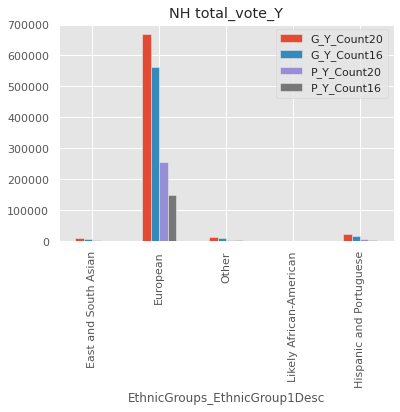

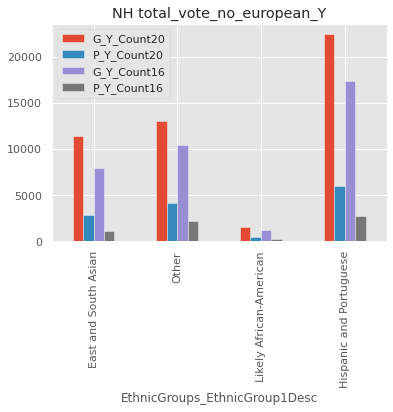

In [561]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd




# Plot primary election 'Y' totals

df_total_votes_Y = df_total_vote_Y.toPandas()

df = df_total_votes_Y.set_index('EthnicGroups_EthnicGroup1Desc')
df[["G_Y_Count20", "G_Y_Count16", "P_Y_Count20", "P_Y_Count16"]].plot.bar()
plt.title("NH total_vote_Y");

# Take a closer look at no european columns  
no_euro = df_total_vote_Y.filter("EthnicGroups_EthnicGroup1Desc != 'European'")
no_euro = no_euro.toPandas()

df = no_euro.set_index('EthnicGroups_EthnicGroup1Desc')
df[["G_Y_Count20", "P_Y_Count20", "G_Y_Count16", "P_Y_Count16"]].plot.bar()
plt.title('NH total_vote_no_european_Y');





In [562]:
# Totals for each Ethnic Description and Party 

import pyspark.sql.functions as F
df_ethnic.groupBy('EthnicGroups_EthnicGroup1Desc', 'Parties_Description').agg(F.count('*').alias('Count')).orderBy('Count','EthnicGroups_EthnicGroup1Desc', 'Parties_Description', ascending=False).show(25)


+-----------------------------+-------------------+------+
|EthnicGroups_EthnicGroup1Desc|Parties_Description| Count|
+-----------------------------+-------------------+------+
|                     European|       Non-Partisan|320795|
|                     European|         Republican|255685|
|                     European|         Democratic|251783|
|         Hispanic and Port...|         Democratic| 11911|
|         Hispanic and Port...|       Non-Partisan| 11556|
|         East and South Asian|       Non-Partisan|  6743|
|                        Other|       Non-Partisan|  6350|
|         Hispanic and Port...|         Republican|  6182|
|                        Other|         Democratic|  6126|
|         East and South Asian|         Democratic|  5753|
|                        Other|         Republican|  4094|
|         East and South Asian|         Republican|  2448|
|         Likely African-Am...|         Democratic|  1437|
|         Likely African-Am...|       Non-Partisan|   54

### Democratic Party breakdown by group

In [563]:
# Total count of 'Y' for all primaries across EthnicGroups for Dems
df_ethnic_dems = df_ethnic.filter(df_ethnic.Parties_Description == 'Democratic')
df_ethnic_rep = df_ethnic.filter(df_ethnic.Parties_Description == 'Republican')
df_ethnic_other = df_ethnic.filter( (df_ethnic.Parties_Description !='Republican') & (df_ethnic.Parties_Description !='Democratic') )



In [564]:
# Split-up primary Dem votes by years and decision and aggegate by Ethnic group

import pyspark.sql.functions as F


df_ethnic_P2020count_Y=df_ethnic_dems.filter(F.col('Primary_2020')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2020').alias('P_Y_Count20'))
df_ethnic_P2020count_N=df_ethnic_dems.filter(F.col('Primary_2020')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2020').alias('P_N_Count20'))
df_ethnic_P2016count_Y=df_ethnic_dems.filter(F.col('Primary_2016')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2016').alias('P_Y_Count16'))
df_ethnic_P2016count_N=df_ethnic_dems.filter(F.col('Primary_2016')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2016').alias('P_N_Count16'))
df_ethnic_G2020count_Y=df_ethnic_dems.filter(F.col('General_2020')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2020').alias('G_Y_Count20'))
df_ethnic_G2020count_N=df_ethnic_dems.filter(F.col('General_2020')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2020').alias('G_N_Count20'))
df_ethnic_G2016count_Y=df_ethnic_dems.filter(F.col('General_2016')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2016').alias('G_Y_Count16'))
df_ethnic_G2016count_N=df_ethnic_dems.filter(F.col('General_2016')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2016').alias('G_N_Count16'))






Democratic voter breakdown during primary and general elections for presidential election years

In [565]:
# Dems that voted in primaries by ethnic group

df_dems_total_vote_Y = df_ethnic_G2020count_Y.join(df_ethnic_P2020count_Y,["EthnicGroups_EthnicGroup1Desc"])\
            .join(df_ethnic_G2016count_Y,["EthnicGroups_EthnicGroup1Desc"])\
            .join(df_ethnic_P2016count_Y,["EthnicGroups_EthnicGroup1Desc"])
df_dems_total_vote_Y.show(truncate=False)

+-----------------------------+-----------+-----------+-----------+-----------+
|EthnicGroups_EthnicGroup1Desc|G_Y_Count20|P_Y_Count20|G_Y_Count16|P_Y_Count16|
+-----------------------------+-----------+-----------+-----------+-----------+
|East and South Asian         |4493       |1474       |3192       |474        |
|European                     |208010     |99596      |176947     |48693      |
|Other                        |4840       |1801       |3913       |783        |
|Likely African-American      |1047       |312        |834        |129        |
|Hispanic and Portuguese      |8874       |2687       |7240       |1036       |
+-----------------------------+-----------+-----------+-----------+-----------+



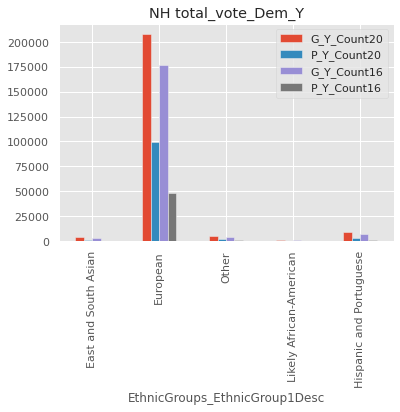

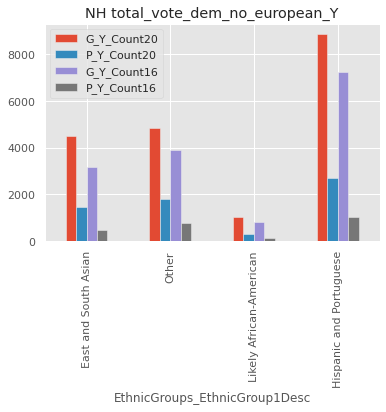

In [566]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd




# Plot total vote election Dem 'Y' totals

pd_df_total_vote_Y = df_dems_total_vote_Y.toPandas()

df = pd_df_total_vote_Y.set_index('EthnicGroups_EthnicGroup1Desc')
df[["G_Y_Count20", "P_Y_Count20", "G_Y_Count16", "P_Y_Count16"]].plot.bar()
plt.title('NH total_vote_Dem_Y');


# Take a closer look at no european columns  
dem_no_euro = df_dems_total_vote_Y.filter("EthnicGroups_EthnicGroup1Desc != 'European'")
dem_no_euro = dem_no_euro.toPandas()

df = dem_no_euro.set_index('EthnicGroups_EthnicGroup1Desc')
df[["G_Y_Count20", "P_Y_Count20", "G_Y_Count16", "P_Y_Count16"]].plot.bar()
plt.title('NH total_vote_dem_no_european_Y');




### Republican Party breakdown by group

In [567]:
# Split-up primary Rep votes by years and decision and aggegate by Ethnic group

import pyspark.sql.functions as F


df_ethnic_P2020count_Y=df_ethnic_rep.filter(F.col('Primary_2020')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2020').alias('P_Y_Count20'))
df_ethnic_P2020count_N=df_ethnic_rep.filter(F.col('Primary_2020')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2020').alias('P_N_Count20'))
df_ethnic_P2016count_Y=df_ethnic_rep.filter(F.col('Primary_2016')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2016').alias('P_Y_Count16'))
df_ethnic_P2016count_N=df_ethnic_rep.filter(F.col('Primary_2016')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2016').alias('P_N_Count16'))
df_ethnic_G2020count_Y=df_ethnic_rep.filter(F.col('General_2020')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2020').alias('G_Y_Count20'))
df_ethnic_G2020count_N=df_ethnic_rep.filter(F.col('General_2020')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2020').alias('G_N_Count20'))
df_ethnic_G2016count_Y=df_ethnic_rep.filter(F.col('General_2016')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2016').alias('G_Y_Count16'))
df_ethnic_G2016count_N=df_ethnic_rep.filter(F.col('General_2016')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2016').alias('G_N_Count16'))



In [568]:
# Rep that voted in primaries by ethnic group

df_rep_total_vote_Y = df_ethnic_G2020count_Y.join(df_ethnic_P2020count_Y,["EthnicGroups_EthnicGroup1Desc"])\
            .join(df_ethnic_G2016count_Y,["EthnicGroups_EthnicGroup1Desc"])\
            .join(df_ethnic_P2016count_Y,["EthnicGroups_EthnicGroup1Desc"])
    
df_rep_total_vote_Y.show(truncate=False)

+-----------------------------+-----------+-----------+-----------+-----------+
|EthnicGroups_EthnicGroup1Desc|G_Y_Count20|P_Y_Count20|G_Y_Count16|P_Y_Count16|
+-----------------------------+-----------+-----------+-----------+-----------+
|East and South Asian         |1996       |671        |1525       |324        |
|European                     |216512     |97137      |192631     |64107      |
|Other                        |3468       |1395       |2999       |895        |
|Likely African-American      |96         |38         |87         |19         |
|Hispanic and Portuguese      |5159       |1929       |4119       |1079       |
+-----------------------------+-----------+-----------+-----------+-----------+



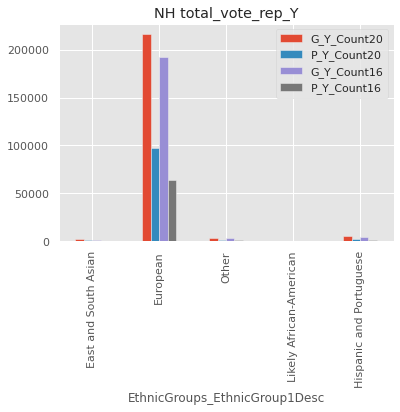

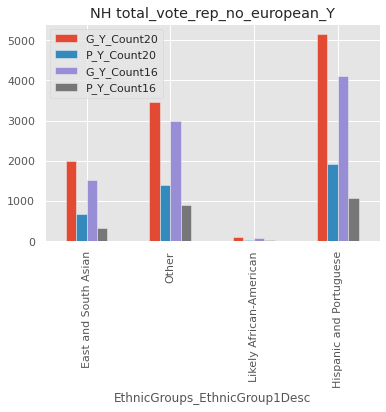

In [569]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd




# Plot primary election Rep 'Y' totals

pd_df_total_vote_Y = df_rep_total_vote_Y.toPandas()

df = pd_df_total_vote_Y.set_index('EthnicGroups_EthnicGroup1Desc')
df[["G_Y_Count20", "P_Y_Count20", "G_Y_Count16", "P_Y_Count16"]].plot.bar()
plt.title('NH total_vote_rep_Y');

# Take a closer look at no european columns  
rep_no_euro = df_rep_total_vote_Y.filter("EthnicGroups_EthnicGroup1Desc != 'European'")
rep_no_euro = rep_no_euro.toPandas()

df = rep_no_euro.set_index('EthnicGroups_EthnicGroup1Desc')
df[["G_Y_Count20", "P_Y_Count20", "G_Y_Count16", "P_Y_Count16"]].plot.bar()
plt.title('NH total_vote_rep_no_european_Y');





## New Hampshire Income EDA

### Income Data Cleaning

In [60]:
## Income Demographic columns

income = df.select('SEQUENCE',
'LALVOTERID',
'Voters_Active',
'Voters_StateVoterID',
'Voters_CountyVoterID',
'Parties_Description',
'Mailing_Addresses_City',
'Mailing_Addresses_State',
'Mailing_Addresses_Zip',
'Mailing_Addresses_ZipPlus4',
'CommercialData_EstHomeValue','CommercialData_EstimatedHHIncome','CommercialData_EstimatedHHIncomeAmount',
'CommercialData_EstimatedAreaMedianHHIncome',
'CommercialData_HomePurchasePrice',
'CommercialData_ISPSA',
'CommercialData_LandValue',
'State_Legislative_District',
'CommercialData_AreaMedianHousingValue',
'General_2020',
'Primary_2020',
'PresidentialPrimary_2020',
'General_2016',
'Primary_2016',
'PresidentialPrimary_2016',
'General_2012',
'Primary_2012',
'PresidentialPrimary_2012',
'General_2008',
'Primary_2008',
'PresidentialPrimary_2008',
'General_2004',
'Primary_2004',
'PresidentialPrimary_2004',
'General_2000',
'Primary_2000',
'PresidentialPrimary_2000')

In [61]:
import pyspark.sql.functions as f
income = income.withColumn('CommercialData_EstHomeValue', f.regexp_replace('CommercialData_EstHomeValue', '[$,]', '').cast('integer'))
income = income.withColumn('CommercialData_EstimatedHHIncome', f.regexp_replace('CommercialData_EstimatedHHIncome', '[$,]', '').cast('integer'))
income = income.withColumn('CommercialData_EstimatedHHIncomeAmount', f.regexp_replace('CommercialData_EstimatedHHIncomeAmount', '[$,]', '').cast('integer'))
income = income.withColumn('CommercialData_HomePurchasePrice', f.regexp_replace('CommercialData_HomePurchasePrice', '[$,]', '').cast('integer'))
income = income.withColumn('CommercialData_LandValue', f.regexp_replace('CommercialData_LandValue', '[$,]', '').cast('integer'))
income = income.withColumn('CommercialData_AreaMedianHousingValue', f.regexp_replace('CommercialData_AreaMedianHousingValue', '[$,]', '').cast('integer'))
income = income.withColumn('CommercialData_EstimatedAreaMedianHHIncome', f.regexp_replace('CommercialData_EstimatedAreaMedianHHIncome', '[$,]', '').cast('integer'))

In [62]:
income=income\
.withColumn('General_2020',when(income.General_2020 =='Y', 1).otherwise(0))\
.withColumn('General_2016',when(income.General_2016 =='Y', 1).otherwise(0))\
.withColumn('General_2012',when(income.General_2012 =='Y', 1).otherwise(0))\
.withColumn('General_2008',when(income.General_2008 =='Y', 1).otherwise(0))\
.withColumn('General_2004',when(income.General_2004 =='Y', 1).otherwise(0))\
.withColumn('General_2000',when(income.General_2000 =='Y', 1).otherwise(0))

In [63]:
from pyspark.sql.functions import *
from pyspark.sql.types import IntegerType
income = income.withColumn("General_2020", income["General_2020"].cast(IntegerType()))\
.withColumn("General_2016", income["General_2016"].cast(IntegerType()))\
.withColumn("General_2012", income["General_2012"].cast(IntegerType()))\
.withColumn("General_2008", income["General_2008"].cast(IntegerType()))\
.withColumn("General_2004", income["General_2004"].cast(IntegerType()))\
.withColumn("General_2000", income["General_2000"].cast(IntegerType()))

In [64]:
income=income\
.withColumn('Primary_2020',when(income.Primary_2020 =='Y', 1).otherwise(0))\
.withColumn('PresidentialPrimary_2020',when(income.PresidentialPrimary_2020 =='Y', 1).otherwise(0))\
.withColumn('Primary_2016',when(income.Primary_2016 =='Y', 1).otherwise(0))\
.withColumn('PresidentialPrimary_2016',when(income.PresidentialPrimary_2016 =='Y', 1).otherwise(0))\
.withColumn('Primary_2012',when(income.Primary_2012 =='Y', 1).otherwise(0))\
.withColumn('PresidentialPrimary_2012',when(income.PresidentialPrimary_2012 =='Y', 1).otherwise(0))\
.withColumn('Primary_2008',when(income.Primary_2008 =='Y', 1).otherwise(0))\
.withColumn('PresidentialPrimary_2008',when(income.PresidentialPrimary_2008 =='Y', 1).otherwise(0))\
.withColumn('PresidentialPrimary_2004',when(income.PresidentialPrimary_2004 =='Y', 1).otherwise(0))\
.withColumn('Primary_2004',when(income.Primary_2004 =='Y', 1).otherwise(0))\
.withColumn('Primary_2000',when(income.Primary_2000 =='Y', 1).otherwise(0))\
.withColumn('PresidentialPrimary_2000',when(income.PresidentialPrimary_2000 =='Y', 1).otherwise(0))

In [65]:
income = income.withColumn("PresidentialPrimary_2000", income["PresidentialPrimary_2000"].cast(IntegerType()))\
.withColumn("Primary_2020", income["Primary_2020"].cast(IntegerType()))\
.withColumn("PresidentialPrimary_2020", income["PresidentialPrimary_2020"].cast(IntegerType()))\
.withColumn("Primary_2016", income["Primary_2016"].cast(IntegerType()))\
.withColumn("PresidentialPrimary_2016", income["PresidentialPrimary_2016"].cast(IntegerType()))\
.withColumn("Primary_2012", income["Primary_2012"].cast(IntegerType()))\
.withColumn("PresidentialPrimary_2012", income["PresidentialPrimary_2012"].cast(IntegerType()))\
.withColumn("Primary_2008", income["Primary_2008"].cast(IntegerType()))\
.withColumn("PresidentialPrimary_2008", income["PresidentialPrimary_2008"].cast(IntegerType()))\
.withColumn("PresidentialPrimary_2004", income["PresidentialPrimary_2004"].cast(IntegerType()))\
.withColumn("Primary_2004", income["Primary_2004"].cast(IntegerType()))\
.withColumn("CommercialData_EstimatedHHIncomeAmount", income["CommercialData_EstimatedHHIncomeAmount"].cast(IntegerType()))\
.withColumn("Primary_2000", income["Primary_2000"].cast(IntegerType()))

In [66]:
import pyspark.sql.functions as F
def drop_null_columns(df):
    """
    This function drops all columns which contain null values.
    :param df: A PySpark DataFrame
    """
    null_counts = df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df.columns]).collect()[0].asDict()
    to_drop = [k for k, v in null_counts.items() if v > 2100358*.3]
    df = df.drop(*to_drop)
    return df

In [67]:
income = drop_null_columns(income)
income = income.dropna()
income.cache()

DataFrame[SEQUENCE: int, LALVOTERID: string, Voters_Active: string, Voters_StateVoterID: int, Parties_Description: string, Mailing_Addresses_City: string, Mailing_Addresses_State: string, Mailing_Addresses_Zip: int, Mailing_Addresses_ZipPlus4: int, CommercialData_EstHomeValue: int, CommercialData_EstimatedHHIncomeAmount: int, CommercialData_EstimatedAreaMedianHHIncome: int, CommercialData_ISPSA: int, CommercialData_LandValue: int, State_Legislative_District: string, CommercialData_AreaMedianHousingValue: int, General_2020: int, Primary_2020: int, PresidentialPrimary_2020: int, General_2016: int, Primary_2016: int, PresidentialPrimary_2016: int, General_2012: int, Primary_2012: int, PresidentialPrimary_2012: int, General_2008: int, Primary_2008: int, PresidentialPrimary_2008: int, General_2004: int, Primary_2004: int, PresidentialPrimary_2004: int, General_2000: int, Primary_2000: int, PresidentialPrimary_2000: int]

### Income Demographic Breakdown By Mailing Address

### What are some of the highly correlated values that affect voter turnout?

In [72]:
ic = income.toPandas()
ic.drop(columns=["Mailing_Addresses_State","Mailing_Addresses_City"],inplace=True)

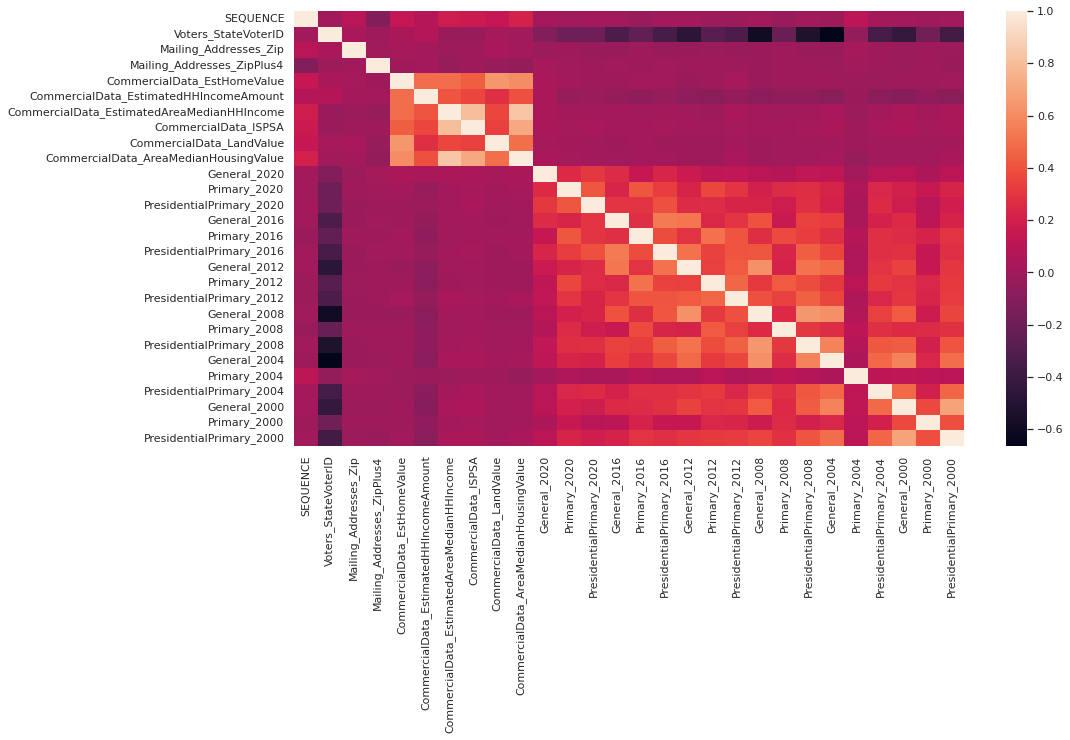

In [73]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(ic.corr())
plt.show()

Similar to the heatmap that we saw in Iowa, there are high correlation in between voter turnout of two consecutive elections.
For instance, if a person voted in 2012, then there is a high chance of voting in 2016.

In [74]:
icc = income.groupBy("Mailing_Addresses_City").agg(F.mean('CommercialData_EstimatedAreaMedianHHIncome').alias("Avg_Income"),F.sum('General_2020').alias('General_2020'),
                                                   F.mean('CommercialData_AreaMedianHousingValue').alias("Avg_Housing_Value"))
iccc = icc.toPandas()
iccc = iccc.sort_values(by = 'General_2020', ascending = False).head(15)
iccc

,Mailing_Addresses_City,Avg_Income,General_2020,Avg_Housing_Value
10,Manchester,84266.638892,24508,266717.756907
34,Merrimack,119364.129413,11705,313705.942737
179,Bedford,157630.503280,9886,430933.300656
439,Dover,98908.504836,9494,285435.088385
465,Concord,93869.266816,8929,268111.670209
183,Hudson,103690.278515,8192,307937.505407
299,Rochester,80611.592605,8039,201077.032047
452,Portsmouth,110515.451380,5684,409451.640213
472,Keene,84721.254113,5649,210434.306520
44,Hampton,109524.470107,5606,383133.057898


### Does Average Income and Average Housing Value in different cities affect voter turnout?

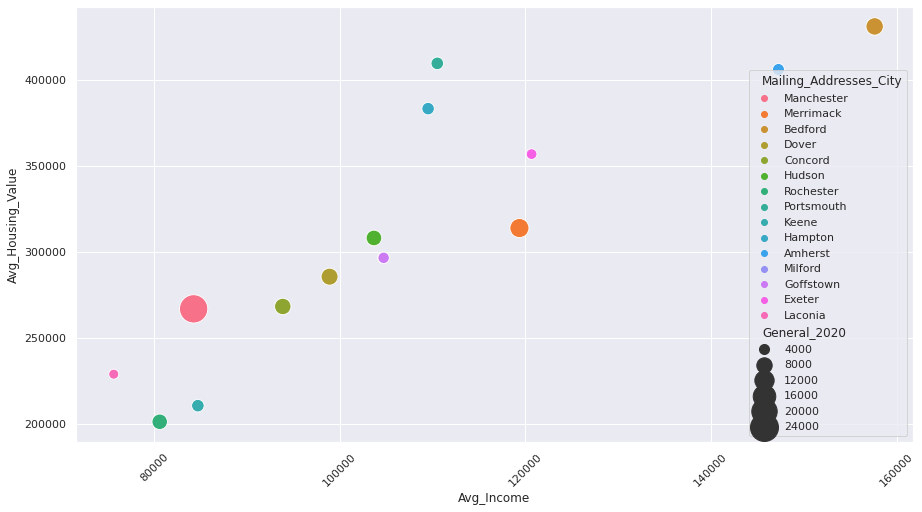

In [75]:
sns.scatterplot(x = 'Avg_Income', y='Avg_Housing_Value', hue = 'Mailing_Addresses_City', size = 'General_2020', sizes=(100, 800), data = iccc)
plt.xticks(rotation=45)
plt.show()

In General 2020 Election there does not seem to be any pattern of specific cities average income and value that shows voting habits. 
Overall the wealthiest cities in NH do not turn out in high rates to votes while lower income cities have some cities like that turn out to vote in high numbers. This may be due to these are the largerst cities in NH a state with few large population centrs.

### Total Income Demographic Breakdown by Income Range

In [76]:
# We take a look at the estimated house hold income amount and split it into low, middle and upper income range
from pyspark.sql.functions import when

income = income.withColumn("Income_Range", \
   when((income.CommercialData_EstimatedHHIncomeAmount >= 0) & (income.CommercialData_EstimatedHHIncomeAmount <= 53413), lit("low income")) \
     .when((income.CommercialData_EstimatedHHIncomeAmount > 53413) & (income.CommercialData_EstimatedHHIncomeAmount <= 106827), lit("middle income")) \
     .otherwise(lit("upper income")) \
  )

In [77]:
income.createOrReplaceTempView("income_table")

In [78]:
# how does the total voter distrution in income range look like in IA state
spark.sql("""
select
      Income_Range, count(*) as TotalWithinRange
   from
      income_table
   group by Income_Range
""").show()

+-------------+----------------+
| Income_Range|TotalWithinRange|
+-------------+----------------+
|   low income|           42161|
| upper income|          177752|
|middle income|          119596|
+-------------+----------------+



In [79]:
# Total voter who vote in primary in election years
df_total_primary_yes = spark.sql("""
select
      Income_Range,
      sum(case when Primary_2020 == 1 then 1 else 0 end) as Primary_2020_yes,
      sum(case when Primary_2016 == 1 then 1 else 0 end) as Primary_2016_yes,
      sum(case when Primary_2012 == 1 then 1 else 0 end) as Primary_2012_yes,
      sum(case when Primary_2008 == 1 then 1 else 0 end) as Primary_2008_yes,
      sum(case when Primary_2004 == 1 then 1 else 0 end) as Primary_2004_yes,
      sum(case when Primary_2000 == 1 then 1 else 0 end) as Primary_2000_yes
   from
      income_table
   group by Income_Range
""")
df_total_primary_yes.show()

+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
| Income_Range|Primary_2020_yes|Primary_2016_yes|Primary_2012_yes|Primary_2008_yes|Primary_2004_yes|Primary_2000_yes|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   low income|           17317|           12198|           11909|            6640|             498|            3566|
| upper income|           58414|           32058|           28840|           14293|             898|            6657|
|middle income|           41872|           25578|           23768|           11947|             862|            6218|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+



In [80]:
# Total voter who don't vote in primary in election years
df_total_primary_no = spark.sql("""
select
      Income_Range,
      sum(case when Primary_2020 == 0 then 1 else 0 end) as Primary_2020_no,
      sum(case when Primary_2016 == 0 then 1 else 0 end) as Primary_2016_no,
      sum(case when Primary_2012 == 0 then 1 else 0 end) as Primary_2012_no,
      sum(case when Primary_2008 == 0 then 1 else 0 end) as Primary_2008_no,
      sum(case when Primary_2004 == 0 then 1 else 0 end) as Primary_2004_no,
      sum(case when Primary_2000 == 0 then 1 else 0 end) as Primary_2000_no
   from
      income_table
   group by Income_Range
""")
df_total_primary_no.show()

+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
| Income_Range|Primary_2020_no|Primary_2016_no|Primary_2012_no|Primary_2008_no|Primary_2004_no|Primary_2000_no|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
|   low income|          24844|          29963|          30252|          35521|          41663|          38595|
| upper income|         119338|         145694|         148912|         163459|         176854|         171095|
|middle income|          77724|          94018|          95828|         107649|         118734|         113378|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+



In [81]:
# Total voter who vote in general in election years
df_total_general_yes = spark.sql("""
select
      Income_Range,
      sum(case when General_2020 == 1 then 1 else 0 end) as General_2020_yes,
      sum(case when General_2016 == 1 then 1 else 0 end) as General_2016_yes,
      sum(case when General_2012 == 1 then 1 else 0 end) as General_2012_yes,
      sum(case when General_2008 == 1 then 1 else 0 end) as General_2008_yes,
      sum(case when General_2004 == 1 then 1 else 0 end) as General_2004_yes,
      sum(case when General_2000 == 1 then 1 else 0 end) as General_2000_yes
   from
      income_table
   group by Income_Range
""")
df_total_general_yes.show()

+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
| Income_Range|General_2020_yes|General_2016_yes|General_2012_yes|General_2008_yes|General_2004_yes|General_2000_yes|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   low income|           36323|           33566|           31042|           28386|           22210|           14659|
| upper income|          156446|          129888|          110832|           96058|           65241|           36028|
|middle income|          102880|           90020|           79721|           71034|           51048|           31153|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+



In [82]:
# Total voter who don't vote in general in election years
df_total_general_no = spark.sql("""
select
      Income_Range,
      sum(case when General_2020 == 0 then 1 else 0 end) as General_2020_no,
      sum(case when General_2016 == 0 then 1 else 0 end) as General_2016_no,
      sum(case when General_2012 == 0 then 1 else 0 end) as General_2012_no,
      sum(case when General_2008 == 0 then 1 else 0 end) as General_2008_no,
      sum(case when General_2004 == 0 then 1 else 0 end) as General_2004_no,
      sum(case when General_2000 == 0 then 1 else 0 end) as General_2000_no
   from
      income_table
   group by Income_Range
""")
df_total_general_no.show()

+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
| Income_Range|General_2020_no|General_2016_no|General_2012_no|General_2008_no|General_2004_no|General_2000_no|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
|   low income|           5838|           8595|          11119|          13775|          19951|          27502|
| upper income|          21306|          47864|          66920|          81694|         112511|         141724|
|middle income|          16716|          29576|          39875|          48562|          68548|          88443|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+



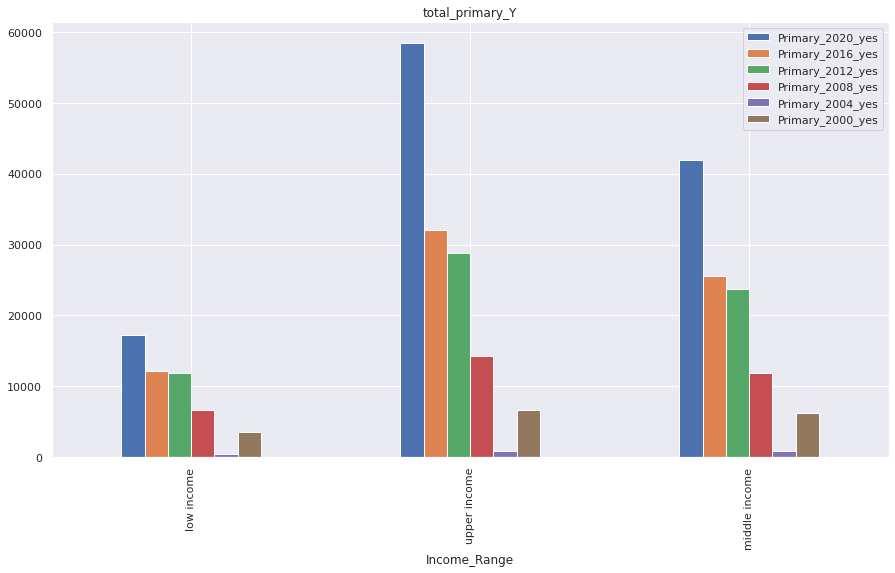

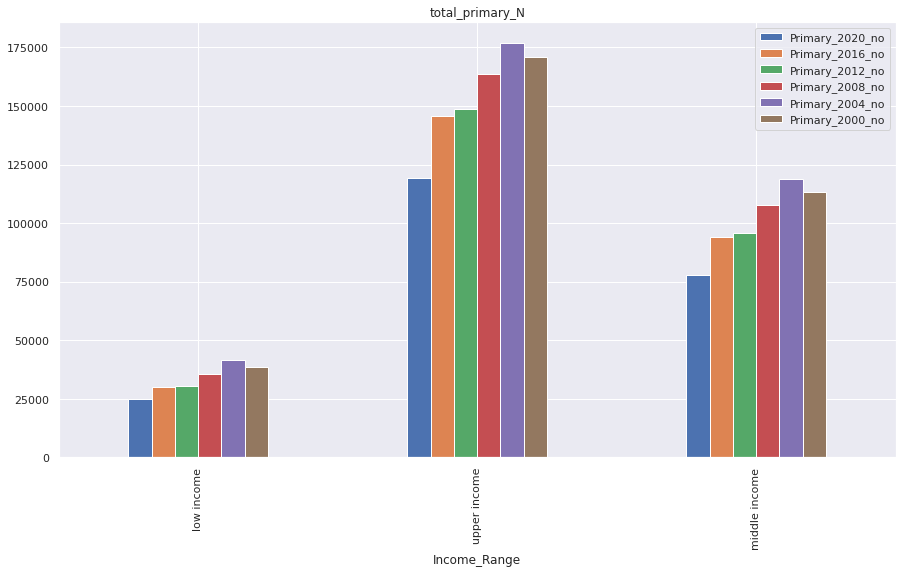

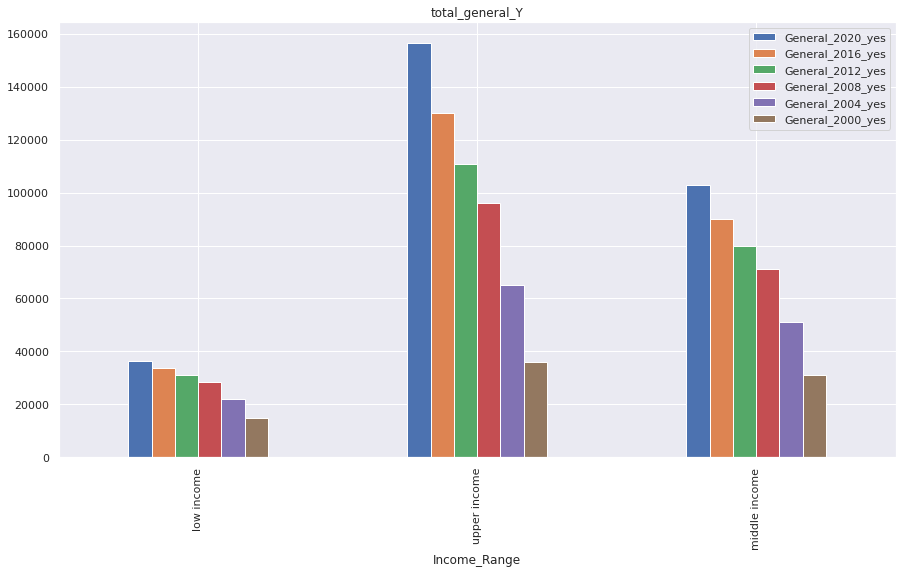

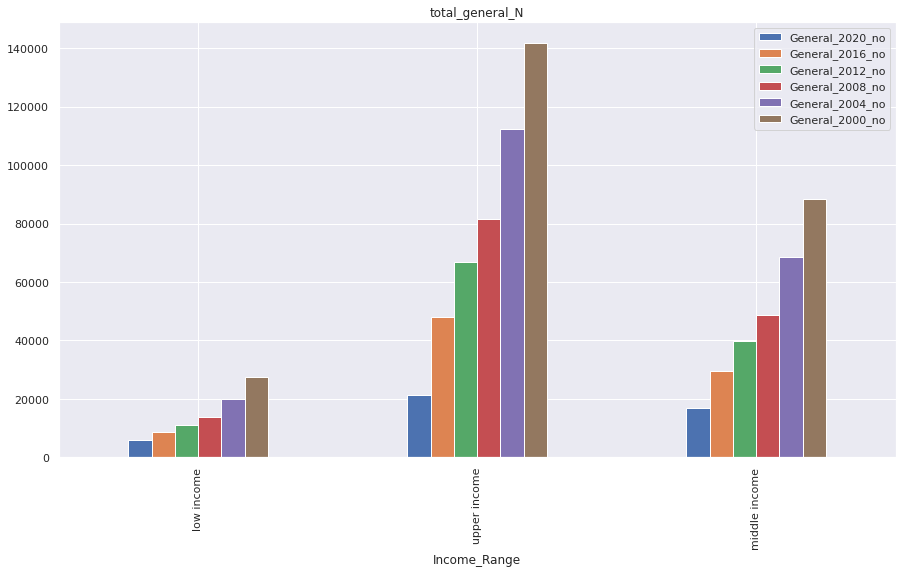

In [83]:
df_total_primary_yes = df_total_primary_yes.toPandas()
df_total_primary_yes.plot(x="Income_Range", y=["Primary_2020_yes", "Primary_2016_yes", "Primary_2012_yes","Primary_2008_yes",'Primary_2004_yes','Primary_2000_yes'], kind="bar")
plt.title('total_primary_Y');

df_total_primary_no = df_total_primary_no.toPandas()
df_total_primary_no.plot(x="Income_Range", y=["Primary_2020_no", "Primary_2016_no", "Primary_2012_no","Primary_2008_no",'Primary_2004_no','Primary_2000_no'], kind="bar")
plt.title('total_primary_N');

df_total_general_yes = df_total_general_yes.toPandas()
df_total_general_yes.plot(x="Income_Range", y=["General_2020_yes", "General_2016_yes", "General_2012_yes","General_2008_yes",'General_2004_yes','General_2000_yes'], kind="bar")
plt.title('total_general_Y');


df_total_general_no = df_total_general_no.toPandas()
df_total_general_no.plot(x="Income_Range", y=["General_2020_no", "General_2016_no", "General_2012_no","General_2008_no",'General_2004_no','General_2000_no'], kind="bar")
plt.title('total_general_N');

With similar distribution among all income groups. each year the growth rate of the number of voters who did vote in primaries and general both increases. Which means people are more likely to vote in primaires rather than in general elections.

### Income demographic breakdown by party - Democratic Party

In [84]:
income_dems = income.filter(income.Parties_Description == 'Democratic')
income_dems.createOrReplaceTempView("income_table_dems")

In [85]:
# Democratic voter who vote in primary in election years
df_total_primary_yes = spark.sql("""
select
      Income_Range,
      sum(case when Primary_2020 == 1 then 1 else 0 end) as Primary_2020_yes,
      sum(case when Primary_2016 == 1 then 1 else 0 end) as Primary_2016_yes,
      sum(case when Primary_2012 == 1 then 1 else 0 end) as Primary_2012_yes,
      sum(case when Primary_2008 == 1 then 1 else 0 end) as Primary_2008_yes,
      sum(case when Primary_2004 == 1 then 1 else 0 end) as Primary_2004_yes,
      sum(case when Primary_2000 == 1 then 1 else 0 end) as Primary_2000_yes
   from
      income_table_dems
   group by Income_Range
""")
df_total_primary_yes.show()

+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
| Income_Range|Primary_2020_yes|Primary_2016_yes|Primary_2012_yes|Primary_2008_yes|Primary_2004_yes|Primary_2000_yes|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   low income|            6541|            3944|            4120|            2189|             210|             528|
| upper income|           22393|           10013|            9571|            4167|             358|             997|
|middle income|           15810|            8409|            8283|            3727|             371|             966|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+



In [86]:
# Democratic voter who don't vote in primary in election years
df_total_primary_no = spark.sql("""
select
      Income_Range,
      sum(case when Primary_2020 == 0 then 1 else 0 end) as Primary_2020_no,
      sum(case when Primary_2016 == 0 then 1 else 0 end) as Primary_2016_no,
      sum(case when Primary_2012 == 0 then 1 else 0 end) as Primary_2012_no,
      sum(case when Primary_2008 == 0 then 1 else 0 end) as Primary_2008_no,
      sum(case when Primary_2004 == 0 then 1 else 0 end) as Primary_2004_no,
      sum(case when Primary_2000 == 0 then 1 else 0 end) as Primary_2000_no
   from
      income_table_dems
   group by Income_Range
""")
df_total_primary_no.show()

+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
| Income_Range|Primary_2020_no|Primary_2016_no|Primary_2012_no|Primary_2008_no|Primary_2004_no|Primary_2000_no|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
|   low income|           6773|           9370|           9194|          11125|          13104|          12786|
| upper income|          30183|          42563|          43005|          48409|          52218|          51579|
|middle income|          20510|          27911|          28037|          32593|          35949|          35354|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+



In [87]:
# Democratic voter who vote in general in election years
df_total_general_yes = spark.sql("""
select
      Income_Range,
      sum(case when General_2020 == 1 then 1 else 0 end) as General_2020_yes,
      sum(case when General_2016 == 1 then 1 else 0 end) as General_2016_yes,
      sum(case when General_2012 == 1 then 1 else 0 end) as General_2012_yes,
      sum(case when General_2008 == 1 then 1 else 0 end) as General_2008_yes,
      sum(case when General_2004 == 1 then 1 else 0 end) as General_2004_yes,
      sum(case when General_2000 == 1 then 1 else 0 end) as General_2000_yes
   from
      income_table_dems
   group by Income_Range
""")
df_total_general_yes.show()

+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
| Income_Range|General_2020_yes|General_2016_yes|General_2012_yes|General_2008_yes|General_2004_yes|General_2000_yes|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   low income|           11758|           11028|           10476|            9663|            7596|            5075|
| upper income|           47370|           39990|           34067|           29785|           20222|           11180|
|middle income|           32118|           28607|           26012|           23378|           17104|           10594|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+



In [88]:
# Democratic voter who don't vote in general in election years
df_total_general_no = spark.sql("""
select
      Income_Range,
      sum(case when General_2020 == 0 then 1 else 0 end) as General_2020_no,
      sum(case when General_2016 == 0 then 1 else 0 end) as General_2016_no,
      sum(case when General_2012 == 0 then 1 else 0 end) as General_2012_no,
      sum(case when General_2008 == 0 then 1 else 0 end) as General_2008_no,
      sum(case when General_2004 == 0 then 1 else 0 end) as General_2004_no,
      sum(case when General_2000 == 0 then 1 else 0 end) as General_2000_no
   from
      income_table_dems
   group by Income_Range
""")
df_total_general_no.show()

+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
| Income_Range|General_2020_no|General_2016_no|General_2012_no|General_2008_no|General_2004_no|General_2000_no|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
|   low income|           1556|           2286|           2838|           3651|           5718|           8239|
| upper income|           5206|          12586|          18509|          22791|          32354|          41396|
|middle income|           4202|           7713|          10308|          12942|          19216|          25726|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+



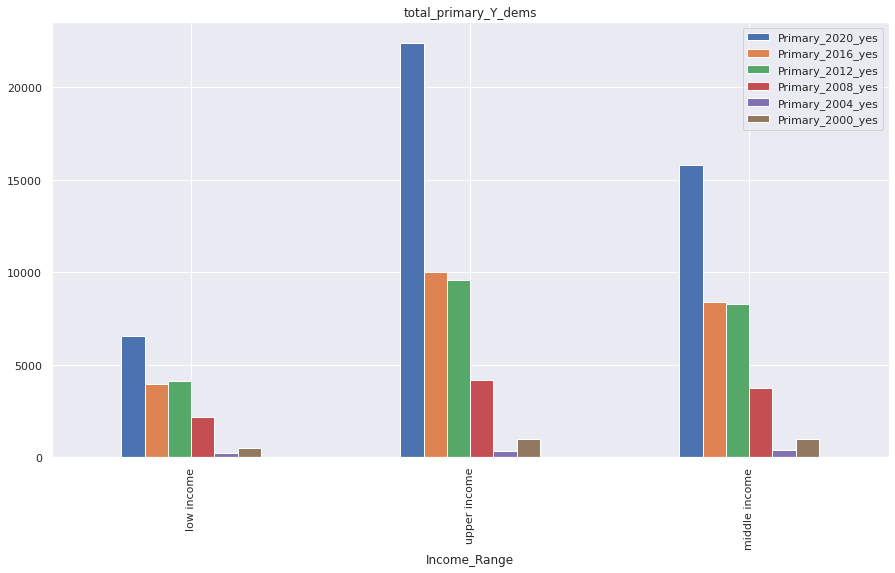

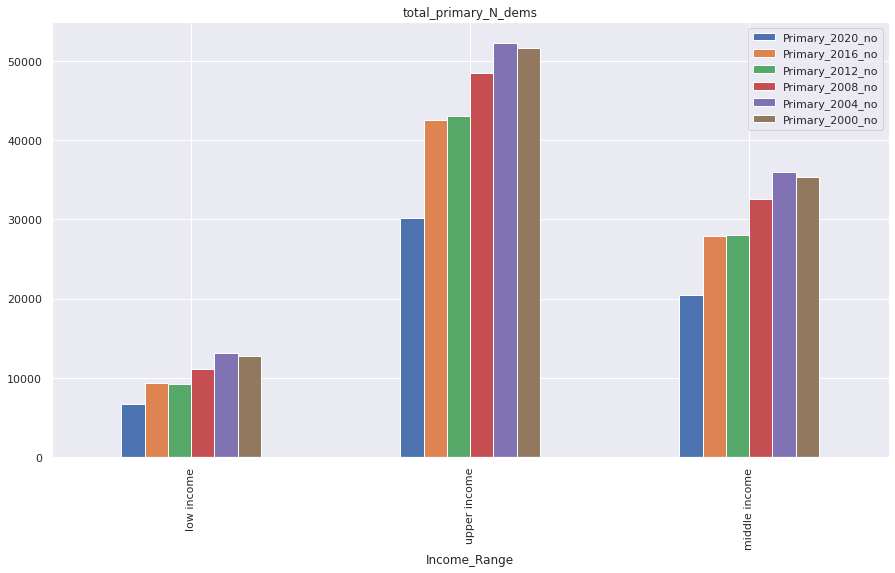

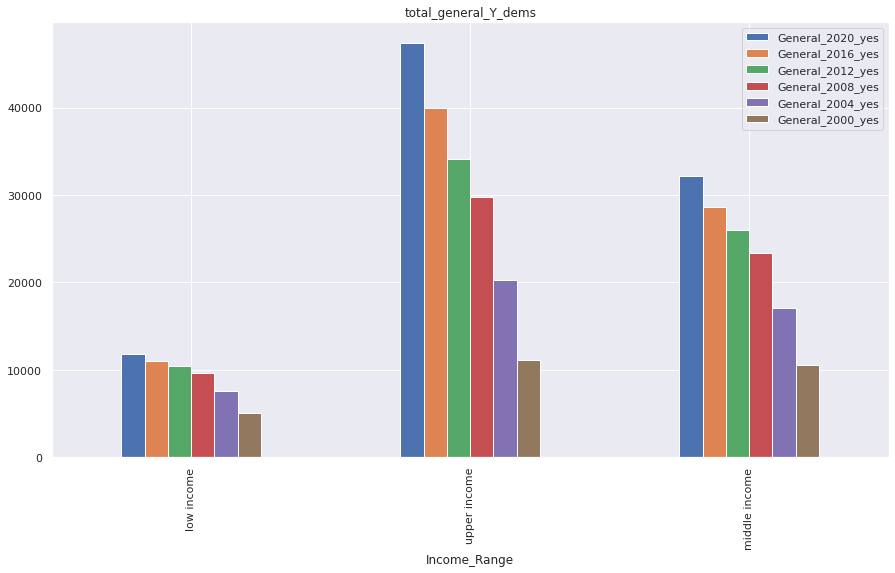

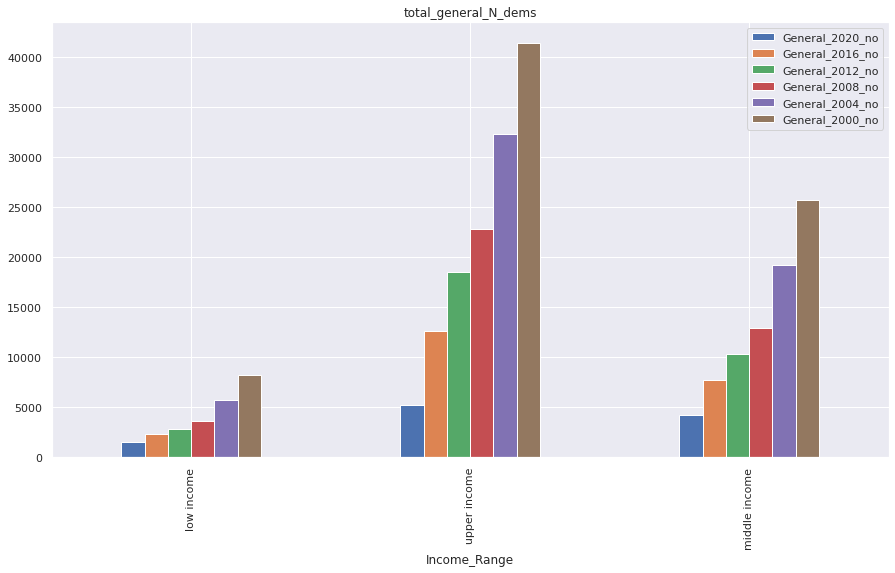

In [89]:
df_total_primary_yes = df_total_primary_yes.toPandas()
df_total_primary_yes.plot(x="Income_Range", y=["Primary_2020_yes", "Primary_2016_yes", "Primary_2012_yes","Primary_2008_yes",'Primary_2004_yes','Primary_2000_yes'], kind="bar")
plt.title('total_primary_Y_dems');

df_total_primary_no = df_total_primary_no.toPandas()
df_total_primary_no.plot(x="Income_Range", y=["Primary_2020_no", "Primary_2016_no", "Primary_2012_no","Primary_2008_no",'Primary_2004_no','Primary_2000_no'], kind="bar")
plt.title('total_primary_N_dems');

df_total_general_yes = df_total_general_yes.toPandas()
df_total_general_yes.plot(x="Income_Range", y=["General_2020_yes", "General_2016_yes", "General_2012_yes","General_2008_yes",'General_2004_yes','General_2000_yes'], kind="bar")
plt.title('total_general_Y_dems');


df_total_general_no = df_total_general_no.toPandas()
df_total_general_no.plot(x="Income_Range", y=["General_2020_no", "General_2016_no", "General_2012_no","General_2008_no",'General_2004_no','General_2000_no'], kind="bar")
plt.title('total_general_N_dems');

In Democratic party, upper income group has the lowest voter turnout among all groups in both primiaries and general election, especially in 2020. So democratic can focus more on how to encourage upper income group to participate in the future election years.

### Income demographic breakdown by party - Republican Party

In [106]:
income_reps = income.filter(income.Parties_Description == 'Republican')
income_reps.createOrReplaceTempView("income_table_reps")

In [107]:
# Republican voter who vote in primary in election years
df_total_primary_yes = spark.sql("""
select
      Income_Range,
      sum(case when Primary_2020 == 1 then 1 else 0 end) as Primary_2020_yes,
      sum(case when Primary_2016 == 1 then 1 else 0 end) as Primary_2016_yes,
      sum(case when Primary_2012 == 1 then 1 else 0 end) as Primary_2012_yes,
      sum(case when Primary_2008 == 1 then 1 else 0 end) as Primary_2008_yes,
      sum(case when Primary_2004 == 1 then 1 else 0 end) as Primary_2004_yes,
      sum(case when Primary_2000 == 1 then 1 else 0 end) as Primary_2000_yes
   from
      income_table_reps
   group by Income_Range
""")
df_total_primary_yes.show()

+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
| Income_Range|Primary_2020_yes|Primary_2016_yes|Primary_2012_yes|Primary_2008_yes|Primary_2004_yes|Primary_2000_yes|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   low income|           55206|           22789|           24773|           17557|           13951|           12391|
| upper income|           61009|           18197|           21786|           12432|           10000|            8546|
|middle income|          117532|           42911|           46255|           30479|           24947|           22198|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+



In [108]:
# Republican voter who don't vote in primary in election years
df_total_primary_no = spark.sql("""
select
      Income_Range,
      sum(case when Primary_2020 == 0 then 1 else 0 end) as Primary_2020_no,
      sum(case when Primary_2016 == 0 then 1 else 0 end) as Primary_2016_no,
      sum(case when Primary_2012 == 0 then 1 else 0 end) as Primary_2012_no,
      sum(case when Primary_2008 == 0 then 1 else 0 end) as Primary_2008_no,
      sum(case when Primary_2004 == 0 then 1 else 0 end) as Primary_2004_no,
      sum(case when Primary_2000 == 0 then 1 else 0 end) as Primary_2000_no
   from
      income_table_reps
   group by Income_Range
""")
df_total_primary_no.show()

+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
| Income_Range|Primary_2020_no|Primary_2016_no|Primary_2012_no|Primary_2008_no|Primary_2004_no|Primary_2000_no|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
|   low income|          83892|         116309|         114325|         121541|         125147|         126707|
| upper income|         139019|         181831|         178242|         187596|         190028|         191482|
|middle income|         230370|         304991|         301647|         317423|         322955|         325704|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+



In [109]:
# Republican voter who vote in general in election years
df_total_general_yes = spark.sql("""
select
      Income_Range,
      sum(case when General_2020 == 1 then 1 else 0 end) as General_2020_yes,
      sum(case when General_2016 == 1 then 1 else 0 end) as General_2016_yes,
      sum(case when General_2012 == 1 then 1 else 0 end) as General_2012_yes,
      sum(case when General_2008 == 1 then 1 else 0 end) as General_2008_yes,
      sum(case when General_2004 == 1 then 1 else 0 end) as General_2004_yes,
      sum(case when General_2000 == 1 then 1 else 0 end) as General_2000_yes
   from
      income_table_reps
   group by Income_Range
""")
df_total_general_yes.show()

+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
| Income_Range|General_2020_yes|General_2016_yes|General_2012_yes|General_2008_yes|General_2004_yes|General_2000_yes|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   low income|          120489|          108540|           99644|           91756|           86780|           23669|
| upper income|          180970|          156375|          140246|          125396|          112834|           32801|
|middle income|          302832|          263161|          234561|          210894|          193001|           56620|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+



In [110]:
# Republican voter who don't vote in general in election years
df_total_general_no = spark.sql("""
select
      Income_Range,
      sum(case when General_2020 == 0 then 1 else 0 end) as General_2020_no,
      sum(case when General_2016 == 0 then 1 else 0 end) as General_2016_no,
      sum(case when General_2012 == 0 then 1 else 0 end) as General_2012_no,
      sum(case when General_2008 == 0 then 1 else 0 end) as General_2008_no,
      sum(case when General_2004 == 0 then 1 else 0 end) as General_2004_no,
      sum(case when General_2000 == 0 then 1 else 0 end) as General_2000_no
   from
      income_table_reps
   group by Income_Range
""")
df_total_general_no.show()

+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
| Income_Range|General_2020_no|General_2016_no|General_2012_no|General_2008_no|General_2004_no|General_2000_no|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
|   low income|          18609|          30558|          39454|          47342|          52318|         115429|
| upper income|          19058|          43653|          59782|          74632|          87194|         167227|
|middle income|          45070|          84741|         113341|         137008|         154901|         291282|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+



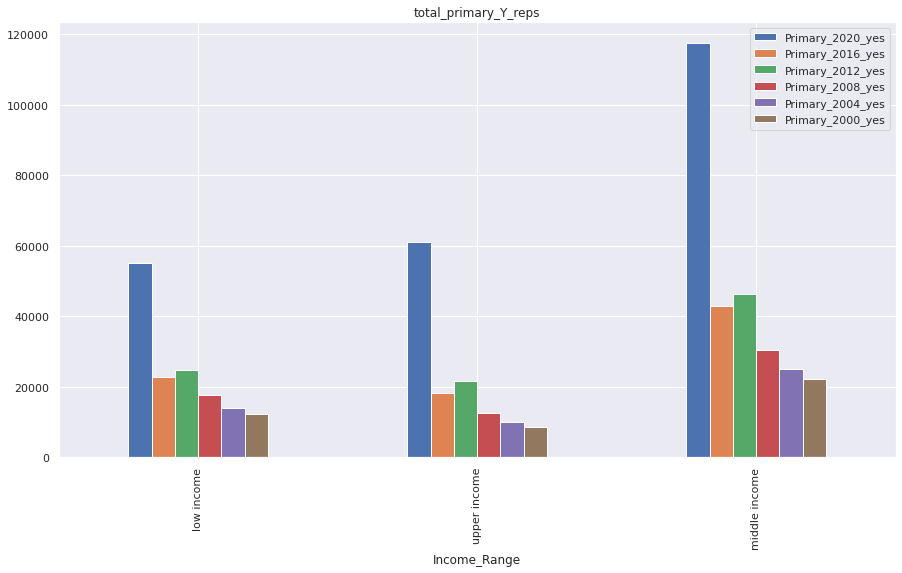

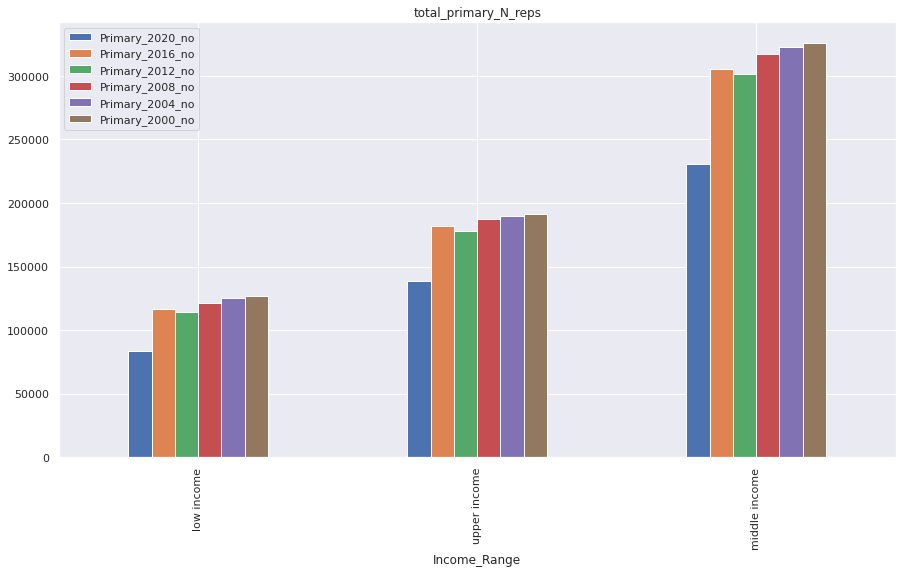

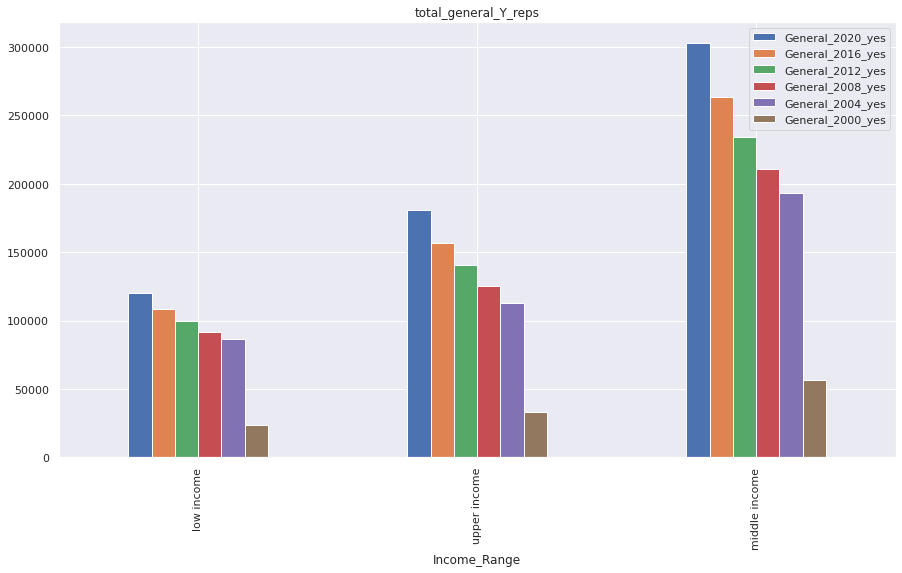

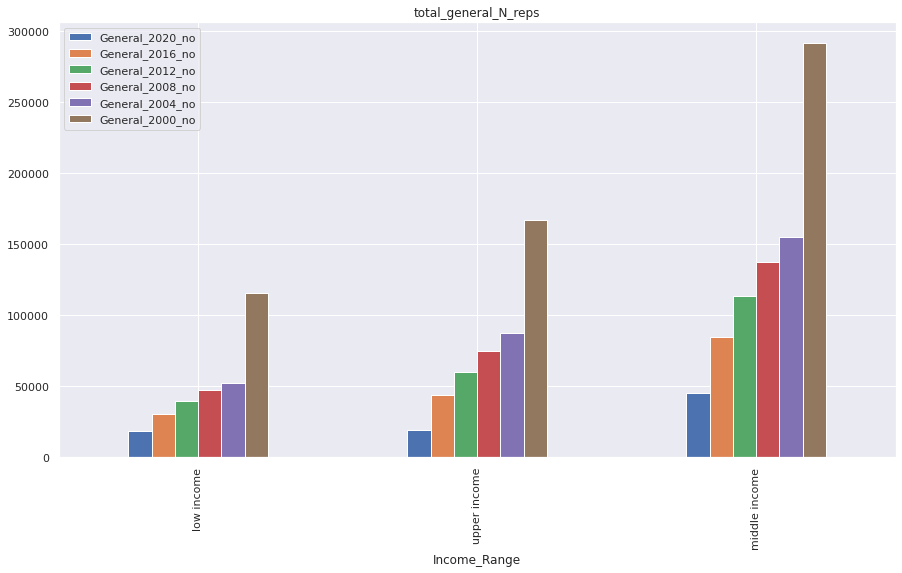

In [111]:
df_total_primary_yes = df_total_primary_yes.toPandas()
df_total_primary_yes.plot(x="Income_Range", y=["Primary_2020_yes", "Primary_2016_yes", "Primary_2012_yes","Primary_2008_yes",'Primary_2004_yes','Primary_2000_yes'], kind="bar")
plt.title('total_primary_Y_reps');

df_total_primary_no = df_total_primary_no.toPandas()
df_total_primary_no.plot(x="Income_Range", y=["Primary_2020_no", "Primary_2016_no", "Primary_2012_no","Primary_2008_no",'Primary_2004_no','Primary_2000_no'], kind="bar")
plt.title('total_primary_N_reps');

df_total_general_yes = df_total_general_yes.toPandas()
df_total_general_yes.plot(x="Income_Range", y=["General_2020_yes", "General_2016_yes", "General_2012_yes","General_2008_yes",'General_2004_yes','General_2000_yes'], kind="bar")
plt.title('total_general_Y_reps');


df_total_general_no = df_total_general_no.toPandas()
df_total_general_no.plot(x="Income_Range", y=["General_2020_no", "General_2016_no", "General_2012_no","General_2008_no",'General_2004_no','General_2000_no'], kind="bar")
plt.title('total_general_N_reps');

In New Hempshire, middle income range groups did not turn out to general election vote the most, but it has been decreasing over time. However, for primary, it seems like people who did not vote in all income classes continue to not vote.

## New Hampshire Public Services EDA

New Hamphsire followed the same exact trend as Iowa in that, all demographics suffer signifcant less particiaption by about 30% from the general to the primary election. Both parties can mainly predict that European ethnicity  will influence  their primiary more than other groups, but the larger sum of minority in the democractic party could push candidates in this primary to be prepared to cater to these groups as they are increasing their voter turnout overall 

## New Hampshire model prediction

In [411]:
df_nh = spark.read.format("csv")\
 .option("header", "true")\
 .option("nullValue", "NA")\
 .option("delimiter","\t")\
 .option("inferSchema", "true")\
 .load(data + "VM2Uniform--NH--2021-03-25.tab")

In [412]:
df_big_ml = df_nh.select('Parties_Description',
'Ethnic_Description',
'CommercialData_EstimatedAreaMedianHHIncome',
'CommercialData_ISPSA',              
'Primary_2020')

df_big_ml= df_big_ml.na.fill(value='N')

In [413]:
[(c, df_big_ml.where(col(c).isNull()).count()) for c in df_big_ml.columns]

[('Parties_Description', 0),
 ('Ethnic_Description', 0),
 ('CommercialData_EstimatedAreaMedianHHIncome', 0),
 ('CommercialData_ISPSA', 88653),
 ('Primary_2020', 0)]

In [414]:
df_big_ml = df_big_ml.dropna()

In [415]:
import pyspark.sql.functions as f
df_big_ml = df_big_ml.withColumn('CommercialData_EstimatedAreaMedianHHIncome', f.regexp_replace('CommercialData_EstimatedAreaMedianHHIncome', '[$,]', '').cast('integer'))




In [416]:
df_big_ml.show()

+-------------------+------------------+------------------------------------------+--------------------+------------+
|Parties_Description|Ethnic_Description|CommercialData_EstimatedAreaMedianHHIncome|CommercialData_ISPSA|Primary_2020|
+-------------------+------------------+------------------------------------------+--------------------+------------+
|       Non-Partisan|             Irish|                                     78727|                   2|           Y|
|         Democratic|             Irish|                                     78727|                   2|           Y|
|         Republican|     English/Welsh|                                     78727|                   2|           N|
|         Democratic|            French|                                     78727|                   2|           Y|
|       Non-Partisan|           Italian|                                     78727|                   2|           Y|
|       Non-Partisan|           Italian|                

### Model for training and predicting on primaries

## Democratic Presidential Primary 2020

In [417]:
df_big_ml_dem=df_big_ml.filter(df_big_ml.Parties_Description == 'Democratic')

df_big_ml_dem = df_big_ml_dem.drop('Parties_Description')




df_big_ml_dem.printSchema



<bound method DataFrame.printSchema of DataFrame[Ethnic_Description: string, CommercialData_EstimatedAreaMedianHHIncome: int, CommercialData_ISPSA: int, Primary_2020: string]>

In [418]:
from pyspark.ml.feature import RFormula

supervised = RFormula(formula="Primary_2020 ~ .")

print(supervised)


RFormula(Primary_2020 ~ .) (uid=RFormula_beac787d206e)


In [422]:
import pandas as pd
import numpy as np
from pyspark.sql.functions import *
fittedRF = supervised.fit(df_big_ml_dem)

In [423]:
import pandas as pd
import numpy as np
from pyspark.sql.functions import *

preparedDF = fittedRF.transform(df_big_ml_dem)

In [424]:
preparedDF.select('features', 'label').distinct().show( truncate=False)

+----------------------------------+-----+
|features                          |label|
+----------------------------------+-----+
|(73,[2,71,72],[1.0,72822.0,3.0])  |0.0  |
|(73,[7,71,72],[1.0,80400.0,6.0])  |0.0  |
|(73,[6,71,72],[1.0,59499.0,3.0])  |0.0  |
|(73,[7,71,72],[1.0,118604.0,7.0]) |1.0  |
|(73,[3,71,72],[1.0,101828.0,8.0]) |1.0  |
|(73,[5,71],[1.0,64499.0])         |0.0  |
|(73,[1,71,72],[1.0,83271.0,6.0])  |0.0  |
|(73,[6,71,72],[1.0,82360.0,4.0])  |1.0  |
|(73,[17,71,72],[1.0,81116.0,5.0]) |0.0  |
|(73,[0,71,72],[1.0,89893.0,5.0])  |1.0  |
|(73,[1,71,72],[1.0,84654.0,2.0])  |0.0  |
|(73,[3,71,72],[1.0,97499.0,7.0])  |0.0  |
|(73,[4,71,72],[1.0,106562.0,5.0]) |1.0  |
|(73,[4,71,72],[1.0,72735.0,4.0])  |1.0  |
|(73,[6,71,72],[1.0,98749.0,7.0])  |0.0  |
|(73,[12,71,72],[1.0,109999.0,7.0])|1.0  |
|(73,[17,71,72],[1.0,75228.0,4.0]) |1.0  |
|(73,[14,71],[1.0,67013.0])        |1.0  |
|(73,[5,71,72],[1.0,106785.0,9.0]) |0.0  |
|(73,[1,71,72],[1.0,113234.0,7.0]) |0.0  |
+----------

In [438]:
fittedTest = lrModel_dem.transform(preparedDF)

In [439]:
fittedTest.select("label", "prediction", "rawPrediction").show(30, False)
fittedTest.select('prediction').distinct()

+-----+----------+------------------------------------------+
|label|prediction|rawPrediction                             |
+-----+----------+------------------------------------------+
|0.0  |0.0       |[0.2712509325686263,-0.2712509325686263]  |
|0.0  |0.0       |[0.514749770247239,-0.514749770247239]    |
|0.0  |0.0       |[0.33249993930644983,-0.33249993930644983]|
|0.0  |0.0       |[0.33249993930644983,-0.33249993930644983]|
|0.0  |0.0       |[0.2861735945108639,-0.2861735945108639]  |
|1.0  |0.0       |[0.2209586264934007,-0.2209586264934007]  |
|1.0  |0.0       |[0.17842108378499533,-0.17842108378499533]|
|1.0  |0.0       |[0.17842108378499533,-0.17842108378499533]|
|1.0  |0.0       |[0.17842108378499533,-0.17842108378499533]|
|1.0  |0.0       |[0.17842108378499533,-0.17842108378499533]|
|0.0  |0.0       |[0.2861735945108639,-0.2861735945108639]  |
|1.0  |0.0       |[0.2861735945108639,-0.2861735945108639]  |
|0.0  |0.0       |[0.2861735945108639,-0.2861735945108639]  |
|1.0  |0

DataFrame[prediction: double]

In [440]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

aucEvaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')

In [441]:
# Your answer goes here
print('Test AUC:', aucEvaluator.evaluate(fittedTest))
print('Train AUC:', summary.areaUnderROC)

Test AUC: 0.5950196925772674
Train AUC: 0.5934389705086128


## Republican Presidential Primary 2020

In [442]:
df_big_ml_rep=df_big_ml.filter(df_big_ml.Parties_Description == 'Republican')

df_big_ml_rep = df_big_ml_rep.drop('Parties_Description')




df_big_ml_rep.printSchema



<bound method DataFrame.printSchema of DataFrame[Ethnic_Description: string, CommercialData_EstimatedAreaMedianHHIncome: int, CommercialData_ISPSA: int, Primary_2020: string]>

## Transform data to fit model

In [443]:
from pyspark.ml.feature import RFormula

supervised = RFormula(formula="Primary_2020 ~ .")

print(supervised)

RFormula(Primary_2020 ~ .) (uid=RFormula_2987b4f5978e)


In [444]:
import pandas as pd
import numpy as np
from pyspark.sql.functions import *
fittedRF = supervised.fit(df_big_ml_rep)

In [445]:
import pandas as pd
import numpy as np
from pyspark.sql.functions import *

preparedDF = fittedRF.transform(df_big_ml_rep)

In [446]:
preparedDF.select('features', 'label').distinct().show( truncate=False)

+---------------------------------+-----+
|features                         |label|
+---------------------------------+-----+
|(68,[2,66,67],[1.0,62726.0,2.0]) |1.0  |
|(68,[2,66,67],[1.0,57762.0,5.0]) |0.0  |
|(68,[4,66,67],[1.0,72187.0,6.0]) |1.0  |
|(68,[12,66,67],[1.0,38249.0,4.0])|1.0  |
|(68,[12,66,67],[1.0,71412.0,1.0])|1.0  |
|(68,[3,66,67],[1.0,79544.0,8.0]) |1.0  |
|(68,[12,66,67],[1.0,76762.0,5.0])|0.0  |
|(68,[9,66,67],[1.0,74008.0,5.0]) |0.0  |
|(68,[0,66,67],[1.0,79166.0,3.0]) |1.0  |
|(68,[3,66,67],[1.0,80356.0,2.0]) |0.0  |
|(68,[9,66,67],[1.0,67097.0,1.0]) |0.0  |
|(68,[7,66,67],[1.0,98749.0,5.0]) |0.0  |
|(68,[13,66,67],[1.0,71553.0,7.0])|0.0  |
|(68,[27,66,67],[1.0,95832.0,1.0])|0.0  |
|(68,[6,66,67],[1.0,72580.0,7.0]) |1.0  |
|(68,[8,66,67],[1.0,63124.0,4.0]) |0.0  |
|(68,[1,66],[1.0,57777.0])        |1.0  |
|(68,[0,66,67],[1.0,57975.0,2.0]) |1.0  |
|(68,[3,66,67],[1.0,62332.0,4.0]) |1.0  |
|(68,[5,66,67],[1.0,71412.0,1.0]) |0.0  |
+---------------------------------

In [450]:
fittedTest = lrModel_rep.transform(preparedDF)

In [451]:
fittedTest.select("label", "prediction", "rawPrediction").show(30, False)
fittedTest.select('prediction').distinct()

22/05/01 19:23:49 WARN org.apache.spark.scheduler.TaskSetManager: Lost task 0.0 in stage 2916.0 (TID 87806) (bigteamcluster-w-1.c.is843-team3-342902.internal executor 3): org.apache.spark.SparkException: Failed to execute user defined function(ProbabilisticClassificationModel$$Lambda$4535/1899556152: (struct<type:tinyint,size:int,indices:array<int>,values:array<double>>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:755)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:345)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:898)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2

Py4JJavaError: An error occurred while calling o9239.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 2916.0 failed 4 times, most recent failure: Lost task 0.3 in stage 2916.0 (TID 87809) (bigteamcluster-w-0.c.is843-team3-342902.internal executor 5): org.apache.spark.SparkException: Failed to execute user defined function(ProbabilisticClassificationModel$$Lambda$4535/1899556152: (struct<type:tinyint,size:int,indices:array<int>,values:array<double>>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:755)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:345)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:898)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:898)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)
Caused by: java.lang.IllegalArgumentException: requirement failed: BLAS.dot(x: Vector, y:Vector) was given Vectors with non-matching sizes: x.size = 68, y.size = 78
	at scala.Predef$.require(Predef.scala:281)
	at org.apache.spark.ml.linalg.BLAS$.dot(BLAS.scala:115)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1(LogisticRegression.scala:1099)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1$adapted(LogisticRegression.scala:1098)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:1213)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:998)
	at org.apache.spark.ml.classification.ProbabilisticClassificationModel.$anonfun$transform$2(ProbabilisticClassifier.scala:121)
	... 17 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2259)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2208)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2207)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2207)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1079)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2446)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2388)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2377)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:868)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2204)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2225)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2244)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:472)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:425)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:47)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:3696)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:2722)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3687)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:103)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:163)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:90)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:775)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3685)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2722)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2929)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:301)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:338)
	at sun.reflect.GeneratedMethodAccessor213.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:750)
Caused by: org.apache.spark.SparkException: Failed to execute user defined function(ProbabilisticClassificationModel$$Lambda$4535/1899556152: (struct<type:tinyint,size:int,indices:array<int>,values:array<double>>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:755)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:345)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:898)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:898)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
Caused by: java.lang.IllegalArgumentException: requirement failed: BLAS.dot(x: Vector, y:Vector) was given Vectors with non-matching sizes: x.size = 68, y.size = 78
	at scala.Predef$.require(Predef.scala:281)
	at org.apache.spark.ml.linalg.BLAS$.dot(BLAS.scala:115)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1(LogisticRegression.scala:1099)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1$adapted(LogisticRegression.scala:1098)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:1213)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:998)
	at org.apache.spark.ml.classification.ProbabilisticClassificationModel.$anonfun$transform$2(ProbabilisticClassifier.scala:121)
	... 17 more


In [452]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

aucEvaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')

In [453]:
# Your answer goes here
print('Test AUC:', aucEvaluator.evaluate(fittedTest))
print('Train AUC:', summary.areaUnderROC)

Test AUC: 0.5950174315672131
Train AUC: 0.5934389705086128


# Nevada 

## Nevada Ethnic EDA

In [516]:
data = "gs://state_voter_info/"

In [517]:
df = spark.read.format("csv")\
 .option("header", "true")\
 .option("nullValue", "NA")\
 .option("delimiter","\t")\
 .option("inferSchema", "true")\
 .load(data + "VM2Uniform--NV--2021-06-13.tab")

In [518]:
# Custom columns for ethnics dataframe
columns_ethnic=['SEQUENCE',
'LALVOTERID',
'Voters_Active',
'Voters_StateVoterID',
'Voters_CountyVoterID',
'Ethnic_Description',
'Parties_Description',
'EthnicGroups_EthnicGroup1Desc',
'CountyEthnic_LALEthnicCode',
'CountyEthnic_Description',
'US_Congressional_District',
'AddressDistricts_Change_Changed_CD',
'State_Senate_District',
'AddressDistricts_Change_Changed_SD',
'State_House_District',
'AddressDistricts_Change_Changed_HD',
'State_Legislative_District',
'AddressDistricts_Change_Changed_LD',
'2001_US_Congressional_District',
'2001_State_Senate_District',
'2001_State_House_District',
'2001_State_Legislative_District',
'County',
'Residence_Addresses_State',
'Voters_FIPS',
'AddressDistricts_Change_Changed_County',
'CommercialDataLL_Donates_to_Conservative_Causes',
'CommercialDataLL_Donates_to_Healthcare',
'CommercialDataLL_Donates_to_International_Aid_Causes',
'CommercialDataLL_Donates_to_Liberal_Causes',
'CommercialDataLL_Donates_to_Local_Community',
'CommercialDataLL_Donates_to_Veterans_Causes',
'ElectionReturns_G08_Cnty_Margin_McCain_R',
'ElectionReturns_G08_Cnty_Percent_McCain_R',
'ElectionReturns_G08_Cnty_Vote_McCain_R',
'ElectionReturns_G08_Cnty_Margin_Obama_D',
'ElectionReturns_G08_Cnty_Percent_Obama_D',
'ElectionReturns_G08_Cnty_Vote_Obama_D',
'ElectionReturns_G08CountyTurnoutAllRegisteredVoters',
'ElectionReturns_G08CountyTurnoutDemocrats',
'ElectionReturns_G08CountyTurnoutIndependentsAllOthers',
'ElectionReturns_G08CountyTurnoutRepublicans',
'ElectionReturns_G08PrecinctTurnoutAllRegisteredVoters',
'ElectionReturns_G08PrecinctTurnoutDemocrats',
'ElectionReturns_G08PrecinctTurnoutIndependentsAllOthers',
'ElectionReturns_G08PrecinctTurnoutRepublicans',
'ElectionReturns_G12_Cnty_Margin_Obama_D',
'ElectionReturns_G12_Cnty_Percent_Obama_D',
'ElectionReturns_G12_Cnty_Vote_Obama_D',
'ElectionReturns_G12_Cnty_Margin_Romney_R',
'ElectionReturns_G12_Cnty_Percent_Romney_R',
'ElectionReturns_G12_Cnty_Vote_Romney_R',
'ElectionReturns_G12CountyTurnoutAllRegisteredVoters',
'ElectionReturns_G12CountyTurnoutDemocrats',
'ElectionReturns_G12CountyTurnoutIndependentsAllOthers',
'ElectionReturns_G12CountyTurnoutRepublicans',
'ElectionReturns_G12PrecinctTurnoutAllRegisteredVoters',
'ElectionReturns_G12PrecinctTurnoutDemocrats',
'ElectionReturns_G12PrecinctTurnoutIndependentsAllOthers',
'ElectionReturns_G12PrecinctTurnoutRepublicans',
'ElectionReturns_G16CountyTurnoutAllRegisteredVoters',
'ElectionReturns_G16CountyTurnoutDemocrats',
'ElectionReturns_G16CountyTurnoutIndependentsAllOthers',
'ElectionReturns_G16CountyTurnoutRepublicans',
'ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters',
'ElectionReturns_G16PrecinctTurnoutDemocrats',
'ElectionReturns_G16PrecinctTurnoutIndependentsAllOthers',
'ElectionReturns_G16PrecinctTurnoutRepublicans',
'ElectionReturns_P08CountyTurnoutAllRegisteredVoters',
'ElectionReturns_P08CountyTurnoutDemocrats',
'ElectionReturns_P08CountyTurnoutRepublicans',
'ElectionReturns_P08PrecinctTurnoutAllRegisteredVoters',
'ElectionReturns_P08PrecinctTurnoutDemocrats',
'ElectionReturns_P08PrecinctTurnoutRepublicans',
'ElectionReturns_P12CountyTurnoutAllRegisteredVoters',
'ElectionReturns_P12CountyTurnoutDemocrats',
'ElectionReturns_P12CountyTurnoutRepublicans',
'ElectionReturns_P12PrecinctTurnoutAllRegisteredVoters',
'ElectionReturns_P12PrecinctTurnoutDemocrats',
'ElectionReturns_P12PrecinctTurnoutRepublicans',
'General_2020',
'Primary_2020',
'PresidentialPrimary_2020',
'General_2016',
'Primary_2016',
'PresidentialPrimary_2016',
'General_2012',
'Primary_2012',
'PresidentialPrimary_2012',
'General_2008',
'Primary_2008',
'PresidentialPrimary_2008',
'General_2004',
'Primary_2004',
'PresidentialPrimary_2004',
'General_2000',
'Primary_2000',
'PresidentialPrimary_2000',
'Voters_Gender',
'Voters_Age',
'Religions_Description',   
]

In [519]:
# Load custom columns into df_ethnics dataframe
from pyspark.sql.functions import *
df_ethnic = df.select(*columns_ethnic)


In [520]:
# Drop null ethnic records
from pyspark.sql.functions import *
df_ethnic= df_ethnic.na.drop(subset=["Ethnic_Description"])

In [521]:
# Drop duplicates and cache dataset
df_ethnic = df_ethnic.drop_duplicates()
df_ethnic.cache()

22/05/01 20:09:19 WARN org.apache.spark.sql.execution.CacheManager: Asked to cache already cached data.


DataFrame[SEQUENCE: int, LALVOTERID: string, Voters_Active: string, Voters_StateVoterID: int, Voters_CountyVoterID: int, Ethnic_Description: string, Parties_Description: string, EthnicGroups_EthnicGroup1Desc: string, CountyEthnic_LALEthnicCode: string, CountyEthnic_Description: string, US_Congressional_District: int, AddressDistricts_Change_Changed_CD: string, State_Senate_District: int, AddressDistricts_Change_Changed_SD: string, State_House_District: int, AddressDistricts_Change_Changed_HD: string, State_Legislative_District: string, AddressDistricts_Change_Changed_LD: string, 2001_US_Congressional_District: string, 2001_State_Senate_District: string, 2001_State_House_District: string, 2001_State_Legislative_District: string, County: string, Residence_Addresses_State: string, Voters_FIPS: int, AddressDistricts_Change_Changed_County: string, CommercialDataLL_Donates_to_Conservative_Causes: string, CommercialDataLL_Donates_to_Healthcare: string, CommercialDataLL_Donates_to_Internationa

What is the difference between 'Ethnic_Description' and 'EthnicGroups_EthnicGroup1Desc'?

We found that 'EthnicGroups_EthnicGroup1Desc' contained overacrching categorization while 'Ethnic_Description' contained a
breakdown of each of the Ethnic Groups. For EDA we decided to focus on EthnicGroups_EthnicGroup1Desc as this would help us find larger trends between the ethnic demographics. Then we could narrow down our focus to see if certain 'Ethnic_Description' within the groups had any importance. 

Is there a a divided between Ethnic Groups over party affiliation? 

Europeans had an overwhelmingly large Republican party affiliation, while all the non-Europeans favored the Democratic party.

In [522]:
#Replace all null values with 'N'

df_ethnic = df_ethnic.na.fill(value='N',subset=['General_2020',
'Primary_2020',
'PresidentialPrimary_2020',
'General_2016',
'Primary_2016',
'PresidentialPrimary_2016',
'General_2012',
'Primary_2012',
'PresidentialPrimary_2012',
'General_2008',
'Primary_2008',
'PresidentialPrimary_2008',
'General_2004',
'Primary_2004',
'PresidentialPrimary_2004',
'General_2000',
'Primary_2000',
'PresidentialPrimary_2000'])




### Nevada Ethnic Demographic Voter Turnout Summary 

In [523]:
# Split-up primary votes by years and decision and aggegate by Ethnic group

import pyspark.sql.functions as F


df_ethnic_P2020count_Y=df_ethnic.filter(F.col('Primary_2020')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2020').alias('P_Y_Count20'))
df_ethnic_P2020count_N=df_ethnic.filter(F.col('Primary_2020')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2020').alias('P_N_Count20'))
df_ethnic_P2016count_Y=df_ethnic.filter(F.col('Primary_2016')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2016').alias('P_Y_Count16'))
df_ethnic_P2016count_N=df_ethnic.filter(F.col('Primary_2016')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2016').alias('P_N_Count16'))
df_ethnic_G2020count_Y=df_ethnic.filter(F.col('General_2020')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2020').alias('G_Y_Count20'))
df_ethnic_G2020count_N=df_ethnic.filter(F.col('General_2020')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2020').alias('G_N_Count20'))
df_ethnic_G2016count_Y=df_ethnic.filter(F.col('General_2016')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2016').alias('G_Y_Count16'))
df_ethnic_G2016count_N=df_ethnic.filter(F.col('General_2016')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2016').alias('G_N_Count16'))



Total voting trends across primaries and general elections during presidential election years

In [524]:
# Total count of 'Y' for last two general and primary elections  across EthnicGroups

df_total_vote_Y = df_ethnic_G2020count_Y.join(df_ethnic_P2020count_Y,["EthnicGroups_EthnicGroup1Desc"])\
            .join(df_ethnic_G2016count_Y,["EthnicGroups_EthnicGroup1Desc"])\
            .join(df_ethnic_P2016count_Y,["EthnicGroups_EthnicGroup1Desc"])
    
df_total_vote_Y.show(truncate=False)

+-----------------------------+-----------+-----------+-----------+-----------+
|EthnicGroups_EthnicGroup1Desc|G_Y_Count20|P_Y_Count20|G_Y_Count16|P_Y_Count16|
+-----------------------------+-----------+-----------+-----------+-----------+
|East and South Asian         |47890      |12664      |26459      |3838       |
|European                     |833587     |312730     |602929     |142787     |
|Other                        |38029      |10157      |24233      |3578       |
|Likely African-American      |53959      |18534      |37659      |7207       |
|Hispanic and Portuguese      |246560     |53068      |169148     |19534      |
+-----------------------------+-----------+-----------+-----------+-----------+



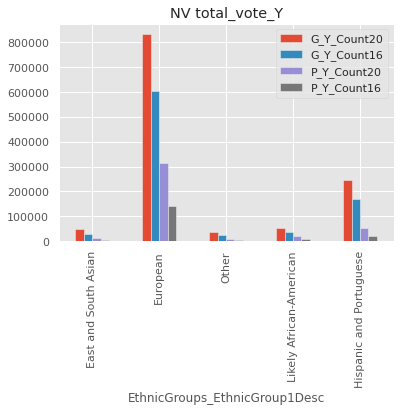

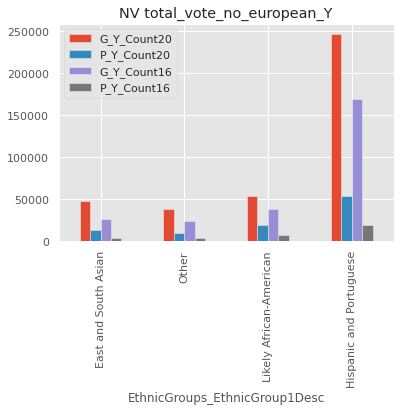

In [525]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd




# Plot primary election 'Y' totals

df_total_votes_Y = df_total_vote_Y.toPandas()

df = df_total_votes_Y.set_index('EthnicGroups_EthnicGroup1Desc')
df[["G_Y_Count20", "G_Y_Count16", "P_Y_Count20", "P_Y_Count16"]].plot.bar()
plt.title("NV total_vote_Y");

# Take a closer look at no european columns  
no_euro = df_total_vote_Y.filter("EthnicGroups_EthnicGroup1Desc != 'European'")
no_euro = no_euro.toPandas()

df = no_euro.set_index('EthnicGroups_EthnicGroup1Desc')
df[["G_Y_Count20", "P_Y_Count20", "G_Y_Count16", "P_Y_Count16"]].plot.bar()
plt.title('NV total_vote_no_european_Y');





In [526]:
# Totals for each Ethnic Description and Party 

import pyspark.sql.functions as F
df_ethnic.groupBy('EthnicGroups_EthnicGroup1Desc', 'Parties_Description').agg(F.count('*').alias('Count')).orderBy('Count','EthnicGroups_EthnicGroup1Desc', 'Parties_Description', ascending=False).show(25)


+-----------------------------+--------------------+------+
|EthnicGroups_EthnicGroup1Desc| Parties_Description| Count|
+-----------------------------+--------------------+------+
|                     European|          Republican|415422|
|                     European|          Democratic|325745|
|                     European|        Non-Partisan|269254|
|         Hispanic and Port...|          Democratic|178786|
|         Hispanic and Port...|        Non-Partisan|106035|
|         Likely African-Am...|          Democratic| 71886|
|         Hispanic and Port...|          Republican| 67664|
|                     European|American Independent| 58306|
|         East and South Asian|        Non-Partisan| 24436|
|         East and South Asian|          Democratic| 22588|
|                     European|               Other| 20292|
|                        Other|          Democratic| 19521|
|         East and South Asian|          Republican| 16527|
|                        Other|        N

### Democratic Party breakdown by group

In [527]:
# Total count of 'Y' for all primaries across EthnicGroups for Dems
df_ethnic_dems = df_ethnic.filter(df_ethnic.Parties_Description == 'Democratic')
df_ethnic_rep = df_ethnic.filter(df_ethnic.Parties_Description == 'Republican')
df_ethnic_other = df_ethnic.filter( (df_ethnic.Parties_Description !='Republican') & (df_ethnic.Parties_Description !='Democratic') )



In [528]:
# Split-up primary Dem votes by years and decision and aggegate by Ethnic group

import pyspark.sql.functions as F


df_ethnic_P2020count_Y=df_ethnic_dems.filter(F.col('Primary_2020')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2020').alias('P_Y_Count20'))
df_ethnic_P2020count_N=df_ethnic_dems.filter(F.col('Primary_2020')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2020').alias('P_N_Count20'))
df_ethnic_P2016count_Y=df_ethnic_dems.filter(F.col('Primary_2016')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2016').alias('P_Y_Count16'))
df_ethnic_P2016count_N=df_ethnic_dems.filter(F.col('Primary_2016')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2016').alias('P_N_Count16'))
df_ethnic_G2020count_Y=df_ethnic_dems.filter(F.col('General_2020')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2020').alias('G_Y_Count20'))
df_ethnic_G2020count_N=df_ethnic_dems.filter(F.col('General_2020')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2020').alias('G_N_Count20'))
df_ethnic_G2016count_Y=df_ethnic_dems.filter(F.col('General_2016')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2016').alias('G_Y_Count16'))
df_ethnic_G2016count_N=df_ethnic_dems.filter(F.col('General_2016')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2016').alias('G_N_Count16'))






Democratic voter breakdown during primary and general elections for presidential election years

In [529]:
# Dems that voted in primaries by ethnic group

df_dems_total_vote_Y = df_ethnic_G2020count_Y.join(df_ethnic_P2020count_Y,["EthnicGroups_EthnicGroup1Desc"])\
            .join(df_ethnic_G2016count_Y,["EthnicGroups_EthnicGroup1Desc"])\
            .join(df_ethnic_P2016count_Y,["EthnicGroups_EthnicGroup1Desc"])
df_dems_total_vote_Y.show(truncate=False)

+-----------------------------+-----------+-----------+-----------+-----------+
|EthnicGroups_EthnicGroup1Desc|G_Y_Count20|P_Y_Count20|G_Y_Count16|P_Y_Count16|
+-----------------------------+-----------+-----------+-----------+-----------+
|East and South Asian         |17052      |5707       |10420      |1713       |
|European                     |259171     |119090     |195204     |52814      |
|Other                        |14690      |4756       |10016      |1610       |
|Likely African-American      |46795      |17152      |33432      |6887       |
|Hispanic and Portuguese      |127445     |30858      |94695      |11886      |
+-----------------------------+-----------+-----------+-----------+-----------+



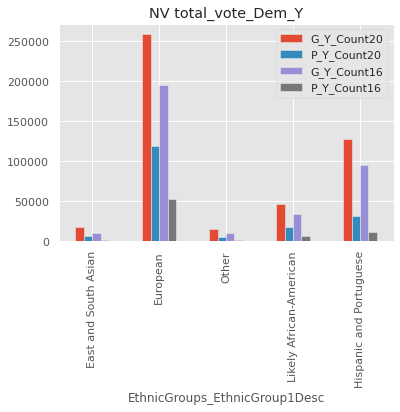

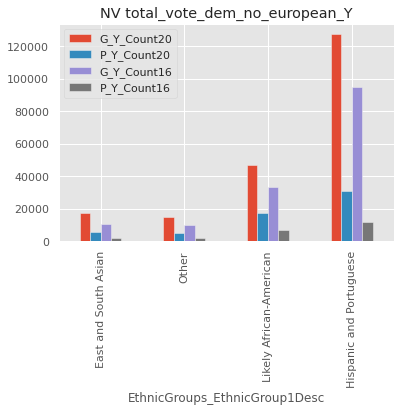

In [530]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd




# Plot total vote election Dem 'Y' totals

pd_df_total_vote_Y = df_dems_total_vote_Y.toPandas()

df = pd_df_total_vote_Y.set_index('EthnicGroups_EthnicGroup1Desc')
df[["G_Y_Count20", "P_Y_Count20", "G_Y_Count16", "P_Y_Count16"]].plot.bar()
plt.title('NV total_vote_Dem_Y');


# Take a closer look at no european columns  
dem_no_euro = df_dems_total_vote_Y.filter("EthnicGroups_EthnicGroup1Desc != 'European'")
dem_no_euro = dem_no_euro.toPandas()

df = dem_no_euro.set_index('EthnicGroups_EthnicGroup1Desc')
df[["G_Y_Count20", "P_Y_Count20", "G_Y_Count16", "P_Y_Count16"]].plot.bar()
plt.title('NV total_vote_dem_no_european_Y');




### Republican Party breakdown by group

In [531]:
# Split-up primary Rep votes by years and decision and aggegate by Ethnic group

import pyspark.sql.functions as F


df_ethnic_P2020count_Y=df_ethnic_rep.filter(F.col('Primary_2020')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2020').alias('P_Y_Count20'))
df_ethnic_P2020count_N=df_ethnic_rep.filter(F.col('Primary_2020')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2020').alias('P_N_Count20'))
df_ethnic_P2016count_Y=df_ethnic_rep.filter(F.col('Primary_2016')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2016').alias('P_Y_Count16'))
df_ethnic_P2016count_N=df_ethnic_rep.filter(F.col('Primary_2016')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('Primary_2016').alias('P_N_Count16'))
df_ethnic_G2020count_Y=df_ethnic_rep.filter(F.col('General_2020')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2020').alias('G_Y_Count20'))
df_ethnic_G2020count_N=df_ethnic_rep.filter(F.col('General_2020')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2020').alias('G_N_Count20'))
df_ethnic_G2016count_Y=df_ethnic_rep.filter(F.col('General_2016')== 'Y').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2016').alias('G_Y_Count16'))
df_ethnic_G2016count_N=df_ethnic_rep.filter(F.col('General_2016')== 'N').groupby(col('EthnicGroups_EthnicGroup1Desc')).agg(count('General_2016').alias('G_N_Count16'))



In [532]:
# Rep that voted in primaries by ethnic group

df_rep_total_vote_Y = df_ethnic_G2020count_Y.join(df_ethnic_P2020count_Y,["EthnicGroups_EthnicGroup1Desc"])\
            .join(df_ethnic_G2016count_Y,["EthnicGroups_EthnicGroup1Desc"])\
            .join(df_ethnic_P2016count_Y,["EthnicGroups_EthnicGroup1Desc"])
    
df_rep_total_vote_Y.show(truncate=False)

+-----------------------------+-----------+-----------+-----------+-----------+
|EthnicGroups_EthnicGroup1Desc|G_Y_Count20|P_Y_Count20|G_Y_Count16|P_Y_Count16|
+-----------------------------+-----------+-----------+-----------+-----------+
|East and South Asian         |13016      |3791       |7499       |1505       |
|European                     |346044     |141349     |260884     |75108      |
|Other                        |11283      |3256       |7318       |1516       |
|Likely African-American      |776        |209        |487        |102        |
|Hispanic and Portuguese      |50845      |12786      |33080      |5445       |
+-----------------------------+-----------+-----------+-----------+-----------+



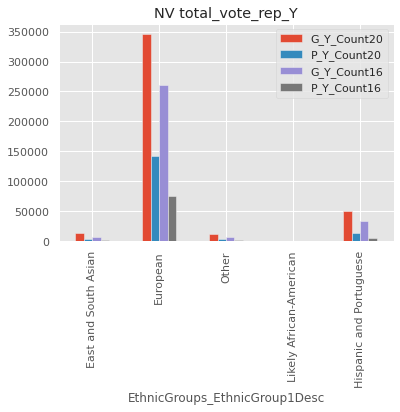

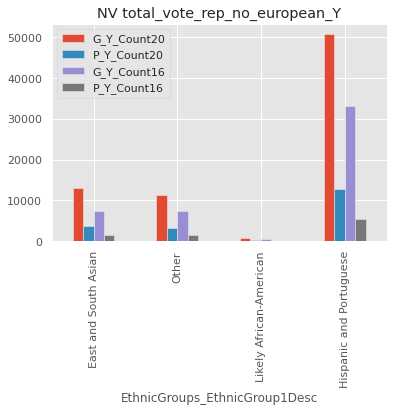

In [533]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd




# Plot primary election Rep 'Y' totals

pd_df_total_vote_Y = df_rep_total_vote_Y.toPandas()

df = pd_df_total_vote_Y.set_index('EthnicGroups_EthnicGroup1Desc')
df[["G_Y_Count20", "P_Y_Count20", "G_Y_Count16", "P_Y_Count16"]].plot.bar()
plt.title('NV total_vote_rep_Y');

# Take a closer look at no european columns  
rep_no_euro = df_rep_total_vote_Y.filter("EthnicGroups_EthnicGroup1Desc != 'European'")
rep_no_euro = rep_no_euro.toPandas()

df = rep_no_euro.set_index('EthnicGroups_EthnicGroup1Desc')
df[["G_Y_Count20", "P_Y_Count20", "G_Y_Count16", "P_Y_Count16"]].plot.bar()
plt.title('NV total_vote_rep_no_european_Y');





Nevada skews from the previous two states on in that voter turn out is not purely dominated by European Ethnicity and then the other minority ethnic gorups are roughly evenly distributed. The |Hispanic and Portuguese demographics takes up a large share of the Nevada population as well and in the last primary say 40% less turnout than the general election.  However their turnout overall of rougly 22,000 is the largest non european turnout of any state. Democractic candidates specifically need to be prepared for |Hispanic and Portuguese  voter turn out and for this gorup along with the European to have a l large influence in primary vote

## Nevada Income EDA

In [90]:
df_nv = spark.read.format("csv")\
 .option("header", "true")\
 .option("nullValue", "NA")\
 .option("delimiter","\t")\
 .option("inferSchema", "true")\
 .load(data + "VM2Uniform--NV--2021-06-13.tab")

### Income Data Cleaning

In [91]:
## Income Demographic columns

income = df_nv.select('SEQUENCE',
'LALVOTERID',
'Voters_Active',
'Voters_StateVoterID',
'Voters_CountyVoterID',
'Parties_Description',
'Mailing_Addresses_City',
'Mailing_Addresses_State',
'Mailing_Addresses_Zip',
'Mailing_Addresses_ZipPlus4',
'CommercialData_EstHomeValue','CommercialData_EstimatedHHIncome','CommercialData_EstimatedHHIncomeAmount',
'CommercialData_EstimatedAreaMedianHHIncome',
'CommercialData_HomePurchasePrice',
'CommercialData_ISPSA',
'CommercialData_LandValue',
'State_Legislative_District',
'CommercialData_AreaMedianHousingValue',
'General_2020',
'Primary_2020',
'PresidentialPrimary_2020',
'General_2016',
'Primary_2016',
'PresidentialPrimary_2016',
'General_2012',
'Primary_2012',
'PresidentialPrimary_2012',
'General_2008',
'Primary_2008',
'PresidentialPrimary_2008',
'General_2004',
'Primary_2004',
'PresidentialPrimary_2004',
'General_2000',
'Primary_2000',
'PresidentialPrimary_2000')

In [92]:
import pyspark.sql.functions as f
income = income.withColumn('CommercialData_EstHomeValue', f.regexp_replace('CommercialData_EstHomeValue', '[$,]', '').cast('integer'))
income = income.withColumn('CommercialData_EstimatedHHIncome', f.regexp_replace('CommercialData_EstimatedHHIncome', '[$,]', '').cast('integer'))
income = income.withColumn('CommercialData_EstimatedHHIncomeAmount', f.regexp_replace('CommercialData_EstimatedHHIncomeAmount', '[$,]', '').cast('integer'))
income = income.withColumn('CommercialData_HomePurchasePrice', f.regexp_replace('CommercialData_HomePurchasePrice', '[$,]', '').cast('integer'))
income = income.withColumn('CommercialData_LandValue', f.regexp_replace('CommercialData_LandValue', '[$,]', '').cast('integer'))
income = income.withColumn('CommercialData_AreaMedianHousingValue', f.regexp_replace('CommercialData_AreaMedianHousingValue', '[$,]', '').cast('integer'))
income = income.withColumn('CommercialData_EstimatedAreaMedianHHIncome', f.regexp_replace('CommercialData_EstimatedAreaMedianHHIncome', '[$,]', '').cast('integer'))

In [93]:
income=income\
.withColumn('General_2020',when(income.General_2020 =='Y', 1).otherwise(0))\
.withColumn('General_2016',when(income.General_2016 =='Y', 1).otherwise(0))\
.withColumn('General_2012',when(income.General_2012 =='Y', 1).otherwise(0))\
.withColumn('General_2008',when(income.General_2008 =='Y', 1).otherwise(0))\
.withColumn('General_2004',when(income.General_2004 =='Y', 1).otherwise(0))\
.withColumn('General_2000',when(income.General_2000 =='Y', 1).otherwise(0))

In [94]:
from pyspark.sql.functions import *
from pyspark.sql.types import IntegerType
income = income.withColumn("General_2020", income["General_2020"].cast(IntegerType()))\
.withColumn("General_2016", income["General_2016"].cast(IntegerType()))\
.withColumn("General_2012", income["General_2012"].cast(IntegerType()))\
.withColumn("General_2008", income["General_2008"].cast(IntegerType()))\
.withColumn("General_2004", income["General_2004"].cast(IntegerType()))\
.withColumn("General_2000", income["General_2000"].cast(IntegerType()))

In [95]:
income=income\
.withColumn('Primary_2020',when(income.Primary_2020 =='Y', 1).otherwise(0))\
.withColumn('PresidentialPrimary_2020',when(income.PresidentialPrimary_2020 =='Y', 1).otherwise(0))\
.withColumn('Primary_2016',when(income.Primary_2016 =='Y', 1).otherwise(0))\
.withColumn('PresidentialPrimary_2016',when(income.PresidentialPrimary_2016 =='Y', 1).otherwise(0))\
.withColumn('Primary_2012',when(income.Primary_2012 =='Y', 1).otherwise(0))\
.withColumn('PresidentialPrimary_2012',when(income.PresidentialPrimary_2012 =='Y', 1).otherwise(0))\
.withColumn('Primary_2008',when(income.Primary_2008 =='Y', 1).otherwise(0))\
.withColumn('PresidentialPrimary_2008',when(income.PresidentialPrimary_2008 =='Y', 1).otherwise(0))\
.withColumn('PresidentialPrimary_2004',when(income.PresidentialPrimary_2004 =='Y', 1).otherwise(0))\
.withColumn('Primary_2004',when(income.Primary_2004 =='Y', 1).otherwise(0))\
.withColumn('Primary_2000',when(income.Primary_2000 =='Y', 1).otherwise(0))\
.withColumn('PresidentialPrimary_2000',when(income.PresidentialPrimary_2000 =='Y', 1).otherwise(0))

In [96]:
income = income.withColumn("PresidentialPrimary_2000", income["PresidentialPrimary_2000"].cast(IntegerType()))\
.withColumn("Primary_2020", income["Primary_2020"].cast(IntegerType()))\
.withColumn("PresidentialPrimary_2020", income["PresidentialPrimary_2020"].cast(IntegerType()))\
.withColumn("Primary_2016", income["Primary_2016"].cast(IntegerType()))\
.withColumn("PresidentialPrimary_2016", income["PresidentialPrimary_2016"].cast(IntegerType()))\
.withColumn("Primary_2012", income["Primary_2012"].cast(IntegerType()))\
.withColumn("PresidentialPrimary_2012", income["PresidentialPrimary_2012"].cast(IntegerType()))\
.withColumn("Primary_2008", income["Primary_2008"].cast(IntegerType()))\
.withColumn("PresidentialPrimary_2008", income["PresidentialPrimary_2008"].cast(IntegerType()))\
.withColumn("PresidentialPrimary_2004", income["PresidentialPrimary_2004"].cast(IntegerType()))\
.withColumn("Primary_2004", income["Primary_2004"].cast(IntegerType()))\
.withColumn("CommercialData_EstimatedHHIncomeAmount", income["CommercialData_EstimatedHHIncomeAmount"].cast(IntegerType()))\
.withColumn("Primary_2000", income["Primary_2000"].cast(IntegerType()))

In [97]:
import pyspark.sql.functions as F
def drop_null_columns(df):
    """
    This function drops all columns which contain null values.
    :param df: A PySpark DataFrame
    """
    null_counts = df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df.columns]).collect()[0].asDict()
    to_drop = [k for k, v in null_counts.items() if v > 2100358*.3]
    df = df.drop(*to_drop)
    return df

In [98]:
income = drop_null_columns(income)
income = income.dropna()
income.cache()

DataFrame[SEQUENCE: int, LALVOTERID: string, Voters_Active: string, Voters_StateVoterID: int, Voters_CountyVoterID: int, Parties_Description: string, Mailing_Addresses_City: string, Mailing_Addresses_State: string, Mailing_Addresses_Zip: int, Mailing_Addresses_ZipPlus4: int, CommercialData_EstHomeValue: int, CommercialData_EstimatedHHIncomeAmount: int, CommercialData_EstimatedAreaMedianHHIncome: int, CommercialData_ISPSA: int, CommercialData_AreaMedianHousingValue: int, General_2020: int, Primary_2020: int, PresidentialPrimary_2020: int, General_2016: int, Primary_2016: int, PresidentialPrimary_2016: int, General_2012: int, Primary_2012: int, PresidentialPrimary_2012: int, General_2008: int, Primary_2008: int, PresidentialPrimary_2008: int, General_2004: int, Primary_2004: int, PresidentialPrimary_2004: int, General_2000: int, Primary_2000: int, PresidentialPrimary_2000: int]

### Income Demographic Breakdown By different income measures

### What are some of the highly correlated values that affect voter turnout?

In [103]:
ic = income.toPandas()
ic.drop(columns=["Mailing_Addresses_State","Mailing_Addresses_City"],inplace=True)

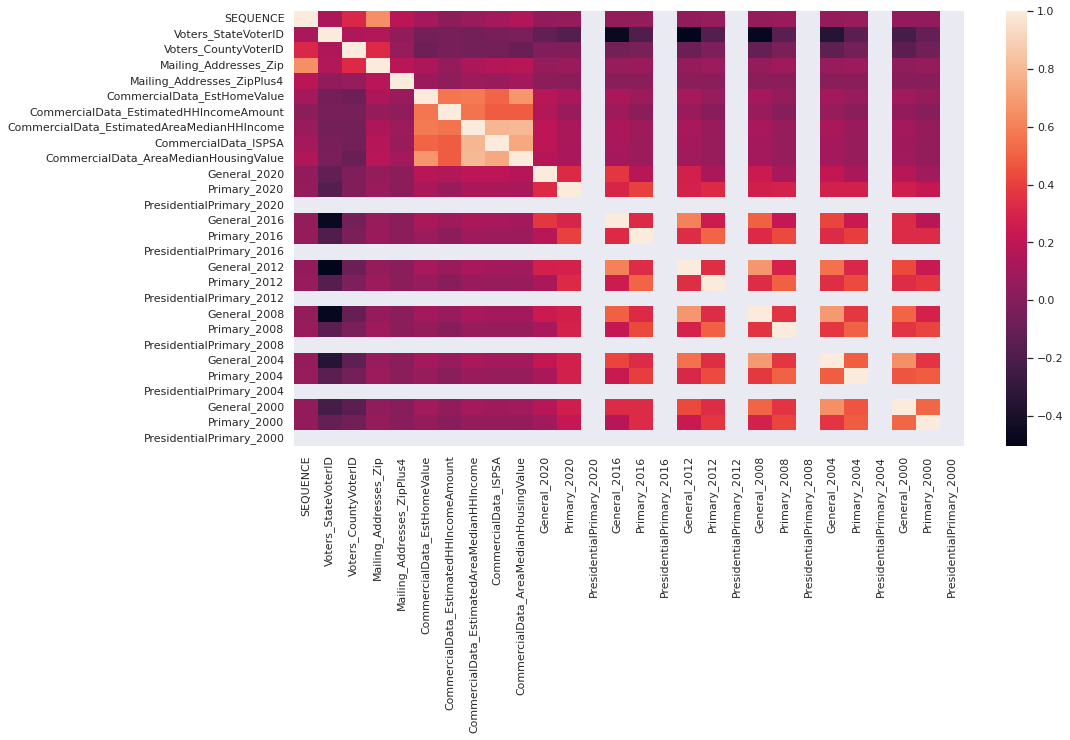

In [104]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(ic.corr())
plt.show()

From the heatmap we analyzed correlation between all the variables.
Besides from correlation in between variables related to finance,
Some of the highlights we discovered is that whether or not an individual voted in one election
is highly correlated with voter turnout in the previous election.
For instance, if you voted in the general election 2008, then you are more likely to go vote in 2012.
Using this information, politicians can target people who have voted in the previous election to secure their votes.
In order for the government to increase the turnout rate, it would be more effective for them to target ones who
did not vote in the previous one, because the ones who did are likely to vote anyways.

In [105]:
icc = income.groupBy("Mailing_Addresses_City").agg(F.mean('CommercialData_EstimatedAreaMedianHHIncome').alias("Avg_Income"),F.sum('General_2020').alias('General_2020'),
                                                   F.mean('CommercialData_AreaMedianHousingValue').alias("Avg_Housing_Value"))
iccc = icc.toPandas()
iccc = iccc.sort_values(by = 'General_2020', ascending = False).head(15)
iccc

,Mailing_Addresses_City,Avg_Income,General_2020,Avg_Housing_Value
60,Las Vegas,73379.018816,621231,243162.270153
77,Henderson,91694.304098,170911,307650.097878
58,Reno,85846.893992,154891,322337.866551
3,North Las Vegas,66465.210416,90153,204752.837455
85,Sparks,82482.084061,62327,300511.284230
34,Carson City,77243.601021,33080,288859.679931
29,Pahrump,62047.315506,20114,177375.856664
14,Gardnerville,79489.757507,14759,354762.275933
90,Fallon,72753.792187,11862,207169.320090
31,Mesquite,57763.322221,10526,234525.830402


### Does Average Income and Average Housing Value in different cities affect voter turnout?

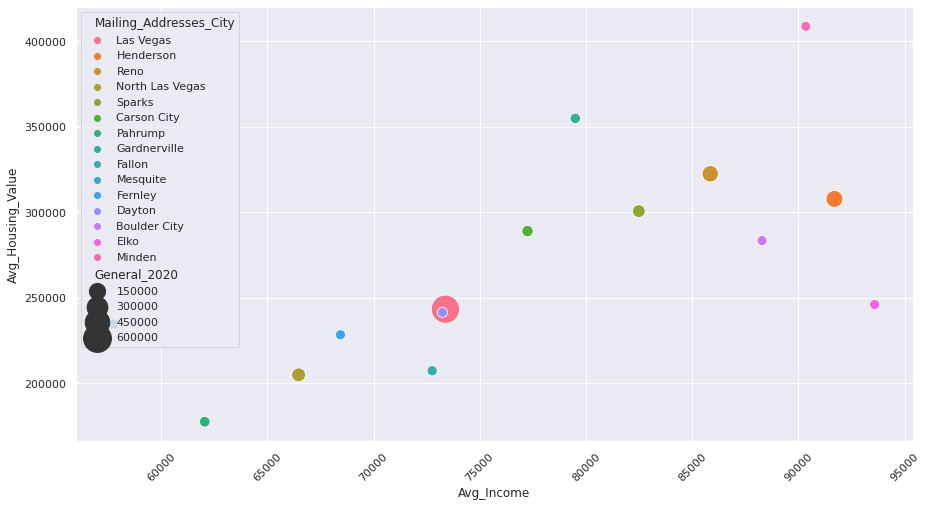

In [106]:
sns.scatterplot(x = 'Avg_Income', y='Avg_Housing_Value', hue = 'Mailing_Addresses_City', size = 'General_2020', sizes=(100, 800), data = iccc)
plt.xticks(rotation=45)
plt.show()

In General 2020 Election there does not seem to be any pattern of specific cities average income and value that shows voting habits. 
Overall we do not spot any significant evidence that income affects voter turnout.

### Total Income Demographic Breakdown by Income Range

In [107]:
# We take a look at the estimated house hold income amount and split it into low, middle and upper income range
from pyspark.sql.functions import when

income = income.withColumn("Income_Range", \
   when((income.CommercialData_EstimatedHHIncomeAmount >= 0) & (income.CommercialData_EstimatedHHIncomeAmount <= 53413), lit("low income")) \
     .when((income.CommercialData_EstimatedHHIncomeAmount > 53413) & (income.CommercialData_EstimatedHHIncomeAmount <= 106827), lit("middle income")) \
     .otherwise(lit("upper income")) \
  )

In [108]:
income.createOrReplaceTempView("income_table")

In [109]:
# how does the total voter distrution in income range look like in IA state
spark.sql("""
select
      Income_Range, count(*) as TotalWithinRange
   from
      income_table
   group by Income_Range
""").show()

+-------------+----------------+
| Income_Range|TotalWithinRange|
+-------------+----------------+
|   low income|          406333|
| upper income|          503191|
|middle income|          871512|
+-------------+----------------+



In [110]:
# Total voter who vote in primary in election years
df_total_primary_yes = spark.sql("""
select
      Income_Range,
      sum(case when Primary_2020 == 1 then 1 else 0 end) as Primary_2020_yes,
      sum(case when Primary_2016 == 1 then 1 else 0 end) as Primary_2016_yes,
      sum(case when Primary_2012 == 1 then 1 else 0 end) as Primary_2012_yes,
      sum(case when Primary_2008 == 1 then 1 else 0 end) as Primary_2008_yes,
      sum(case when Primary_2004 == 1 then 1 else 0 end) as Primary_2004_yes,
      sum(case when Primary_2000 == 1 then 1 else 0 end) as Primary_2000_yes
   from
      income_table
   group by Income_Range
""")
df_total_primary_yes.show()

+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
| Income_Range|Primary_2020_yes|Primary_2016_yes|Primary_2012_yes|Primary_2008_yes|Primary_2004_yes|Primary_2000_yes|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   low income|           87754|           43164|           31682|           25392|           29579|           18051|
| upper income|          147642|           58580|           38657|           32666|           39789|           23643|
|middle income|          197840|           83604|           57636|           47467|           56875|           33281|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+



In [111]:
# Total voter who don't vote in primary in election years
df_total_primary_no = spark.sql("""
select
      Income_Range,
      sum(case when Primary_2020 == 0 then 1 else 0 end) as Primary_2020_no,
      sum(case when Primary_2016 == 0 then 1 else 0 end) as Primary_2016_no,
      sum(case when Primary_2012 == 0 then 1 else 0 end) as Primary_2012_no,
      sum(case when Primary_2008 == 0 then 1 else 0 end) as Primary_2008_no,
      sum(case when Primary_2004 == 0 then 1 else 0 end) as Primary_2004_no,
      sum(case when Primary_2000 == 0 then 1 else 0 end) as Primary_2000_no
   from
      income_table
   group by Income_Range
""")
df_total_primary_no.show()

+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
| Income_Range|Primary_2020_no|Primary_2016_no|Primary_2012_no|Primary_2008_no|Primary_2004_no|Primary_2000_no|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
|   low income|         318579|         363169|         374651|         380941|         376754|         388282|
| upper income|         355549|         444611|         464534|         470525|         463402|         479548|
|middle income|         673672|         787908|         813876|         824045|         814637|         838231|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+



In [112]:
# Total voter who vote in general in election years
df_total_general_yes = spark.sql("""
select
      Income_Range,
      sum(case when General_2020 == 1 then 1 else 0 end) as General_2020_yes,
      sum(case when General_2016 == 1 then 1 else 0 end) as General_2016_yes,
      sum(case when General_2012 == 1 then 1 else 0 end) as General_2012_yes,
      sum(case when General_2008 == 1 then 1 else 0 end) as General_2008_yes,
      sum(case when General_2004 == 1 then 1 else 0 end) as General_2004_yes,
      sum(case when General_2000 == 1 then 1 else 0 end) as General_2000_yes
   from
      income_table
   group by Income_Range
""")
df_total_general_yes.show()

+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
| Income_Range|General_2020_yes|General_2016_yes|General_2012_yes|General_2008_yes|General_2004_yes|General_2000_yes|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   low income|          257140|          185838|          147571|          118207|           85247|           52733|
| upper income|          417550|          293651|          228329|          187671|          136883|           80635|
|middle income|          623691|          429058|          329369|          265800|          187826|          108805|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+



In [113]:
# Total voter who don't vote in general in election years
df_total_general_no = spark.sql("""
select
      Income_Range,
      sum(case when General_2020 == 0 then 1 else 0 end) as General_2020_no,
      sum(case when General_2016 == 0 then 1 else 0 end) as General_2016_no,
      sum(case when General_2012 == 0 then 1 else 0 end) as General_2012_no,
      sum(case when General_2008 == 0 then 1 else 0 end) as General_2008_no,
      sum(case when General_2004 == 0 then 1 else 0 end) as General_2004_no,
      sum(case when General_2000 == 0 then 1 else 0 end) as General_2000_no
   from
      income_table
   group by Income_Range
""")
df_total_general_no.show()

+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
| Income_Range|General_2020_no|General_2016_no|General_2012_no|General_2008_no|General_2004_no|General_2000_no|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
|   low income|         149193|         220495|         258762|         288126|         321086|         353600|
| upper income|          85641|         209540|         274862|         315520|         366308|         422556|
|middle income|         247821|         442454|         542143|         605712|         683686|         762707|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+



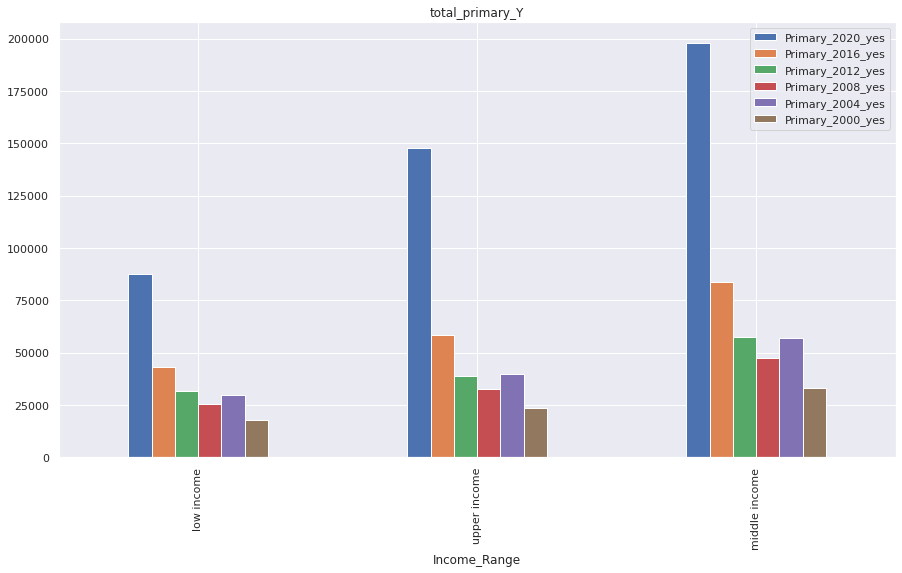

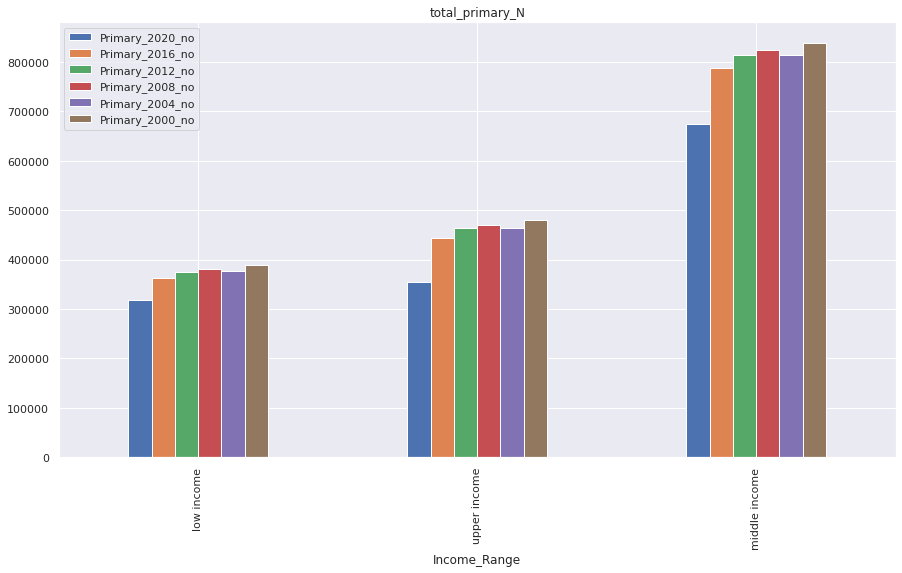

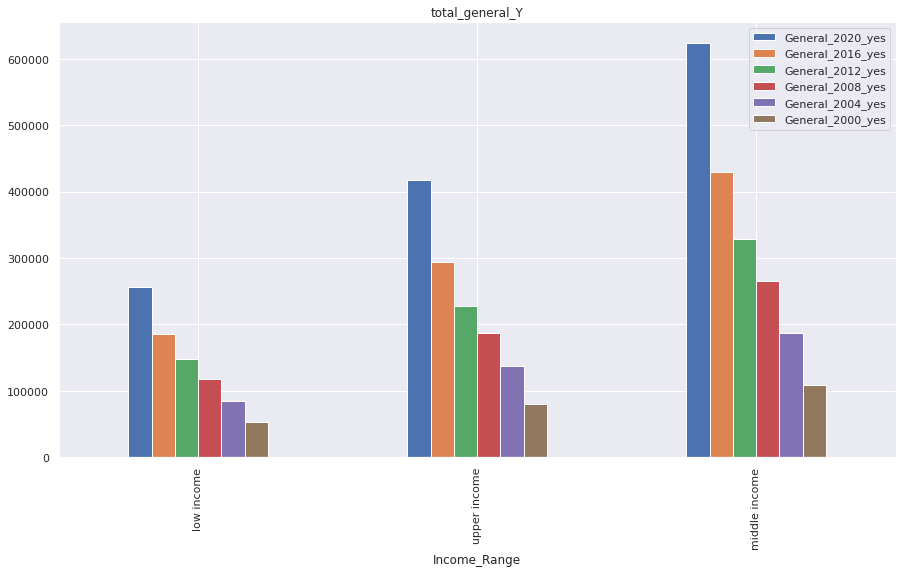

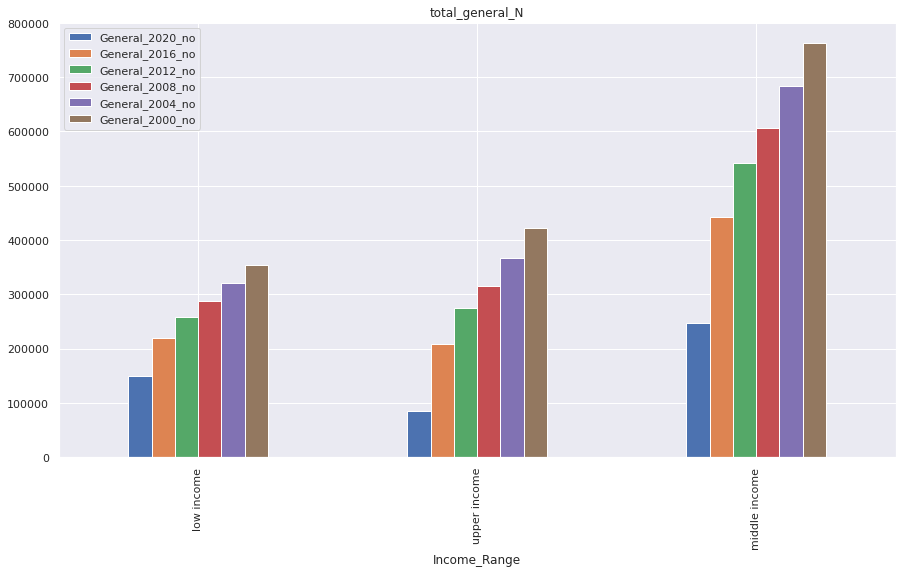

In [114]:
df_total_primary_yes = df_total_primary_yes.toPandas()
df_total_primary_yes.plot(x="Income_Range", y=["Primary_2020_yes", "Primary_2016_yes", "Primary_2012_yes","Primary_2008_yes",'Primary_2004_yes','Primary_2000_yes'], kind="bar")
plt.title('total_primary_Y');

df_total_primary_no = df_total_primary_no.toPandas()
df_total_primary_no.plot(x="Income_Range", y=["Primary_2020_no", "Primary_2016_no", "Primary_2012_no","Primary_2008_no",'Primary_2004_no','Primary_2000_no'], kind="bar")
plt.title('total_primary_N');

df_total_general_yes = df_total_general_yes.toPandas()
df_total_general_yes.plot(x="Income_Range", y=["General_2020_yes", "General_2016_yes", "General_2012_yes","General_2008_yes",'General_2004_yes','General_2000_yes'], kind="bar")
plt.title('total_general_Y');


df_total_general_no = df_total_general_no.toPandas()
df_total_general_no.plot(x="Income_Range", y=["General_2020_no", "General_2016_no", "General_2012_no","General_2008_no",'General_2004_no','General_2000_no'], kind="bar")
plt.title('total_general_N');

With similar distribution among all income groups. each year the growth rate of the number of voters who voted increases in both primaries and general. Because the distribution are the same across all income groups, we do not find any significant finding here.

### Income demographic breakdown by party - Democratic Party

In [115]:
income_dems = income.filter(income.Parties_Description == 'Democratic')
income_dems.createOrReplaceTempView("income_table_dems")

In [116]:
# Democratic voter who vote in primary in election years
df_total_primary_yes = spark.sql("""
select
      Income_Range,
      sum(case when Primary_2020 == 1 then 1 else 0 end) as Primary_2020_yes,
      sum(case when Primary_2016 == 1 then 1 else 0 end) as Primary_2016_yes,
      sum(case when Primary_2012 == 1 then 1 else 0 end) as Primary_2012_yes,
      sum(case when Primary_2008 == 1 then 1 else 0 end) as Primary_2008_yes,
      sum(case when Primary_2004 == 1 then 1 else 0 end) as Primary_2004_yes,
      sum(case when Primary_2000 == 1 then 1 else 0 end) as Primary_2000_yes
   from
      income_table_dems
   group by Income_Range
""")
df_total_primary_yes.show()

+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
| Income_Range|Primary_2020_yes|Primary_2016_yes|Primary_2012_yes|Primary_2008_yes|Primary_2004_yes|Primary_2000_yes|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   low income|           44499|           21444|           14356|           11516|           13939|            8205|
| upper income|           57316|           21846|           12718|           10973|           13492|            7679|
|middle income|           88314|           36081|           21971|           18337|           22556|           12683|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+



In [117]:
# Democratic voter who don't vote in primary in election years
df_total_primary_no = spark.sql("""
select
      Income_Range,
      sum(case when Primary_2020 == 0 then 1 else 0 end) as Primary_2020_no,
      sum(case when Primary_2016 == 0 then 1 else 0 end) as Primary_2016_no,
      sum(case when Primary_2012 == 0 then 1 else 0 end) as Primary_2012_no,
      sum(case when Primary_2008 == 0 then 1 else 0 end) as Primary_2008_no,
      sum(case when Primary_2004 == 0 then 1 else 0 end) as Primary_2004_no,
      sum(case when Primary_2000 == 0 then 1 else 0 end) as Primary_2000_no
   from
      income_table_dems
   group by Income_Range
""")
df_total_primary_no.show()

+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
| Income_Range|Primary_2020_no|Primary_2016_no|Primary_2012_no|Primary_2008_no|Primary_2004_no|Primary_2000_no|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
|   low income|         131718|         154773|         161861|         164701|         162278|         168012|
| upper income|          97452|         132922|         142050|         143795|         141276|         147089|
|middle income|         228623|         280856|         294966|         298600|         294381|         304254|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+



In [118]:
# Democratic voter who vote in general in election years
df_total_general_yes = spark.sql("""
select
      Income_Range,
      sum(case when General_2020 == 1 then 1 else 0 end) as General_2020_yes,
      sum(case when General_2016 == 1 then 1 else 0 end) as General_2016_yes,
      sum(case when General_2012 == 1 then 1 else 0 end) as General_2012_yes,
      sum(case when General_2008 == 1 then 1 else 0 end) as General_2008_yes,
      sum(case when General_2004 == 1 then 1 else 0 end) as General_2004_yes,
      sum(case when General_2000 == 1 then 1 else 0 end) as General_2000_yes
   from
      income_table_dems
   group by Income_Range
""")
df_total_general_yes.show()

+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
| Income_Range|General_2020_yes|General_2016_yes|General_2012_yes|General_2008_yes|General_2004_yes|General_2000_yes|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   low income|          119966|           90500|           72813|           57677|           39809|           24715|
| upper income|          132922|           97725|           76983|           64537|           45118|           27004|
|middle income|          240804|          174369|          136334|          109915|           73959|           43233|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+



In [119]:
# Democratic voter who don't vote in general in election years
df_total_general_no = spark.sql("""
select
      Income_Range,
      sum(case when General_2020 == 0 then 1 else 0 end) as General_2020_no,
      sum(case when General_2016 == 0 then 1 else 0 end) as General_2016_no,
      sum(case when General_2012 == 0 then 1 else 0 end) as General_2012_no,
      sum(case when General_2008 == 0 then 1 else 0 end) as General_2008_no,
      sum(case when General_2004 == 0 then 1 else 0 end) as General_2004_no,
      sum(case when General_2000 == 0 then 1 else 0 end) as General_2000_no
   from
      income_table_dems
   group by Income_Range
""")
df_total_general_no.show()

+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
| Income_Range|General_2020_no|General_2016_no|General_2012_no|General_2008_no|General_2004_no|General_2000_no|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
|   low income|          56251|          85717|         103404|         118540|         136408|         151502|
| upper income|          21846|          57043|          77785|          90231|         109650|         127764|
|middle income|          76133|         142568|         180603|         207022|         242978|         273704|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+



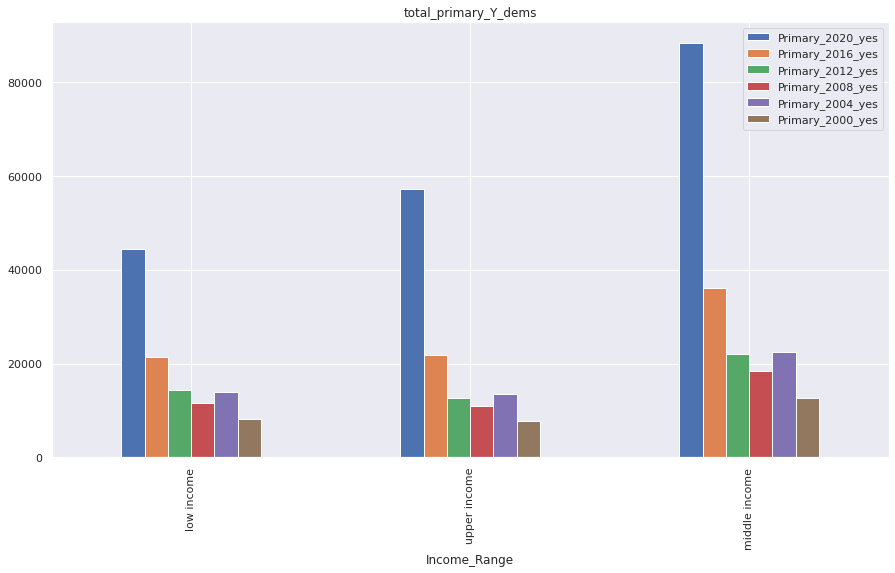

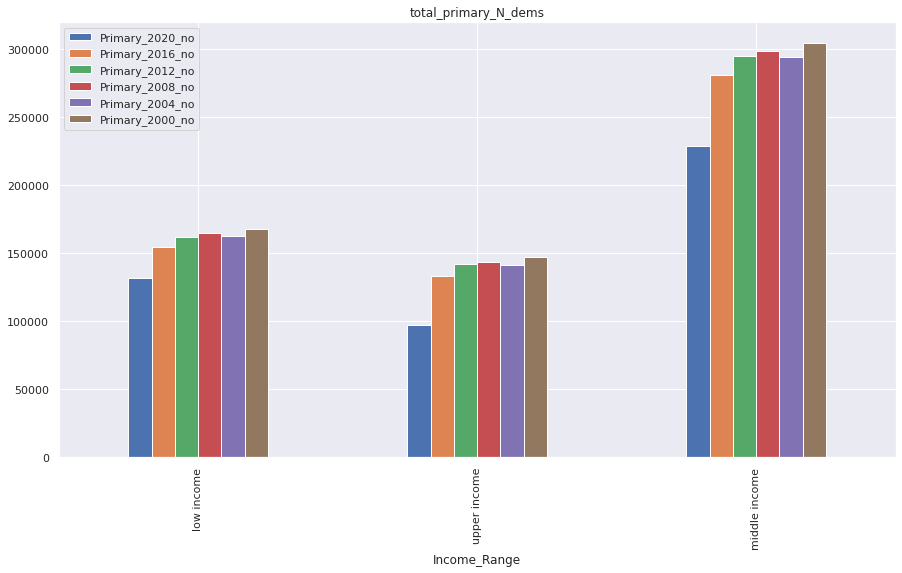

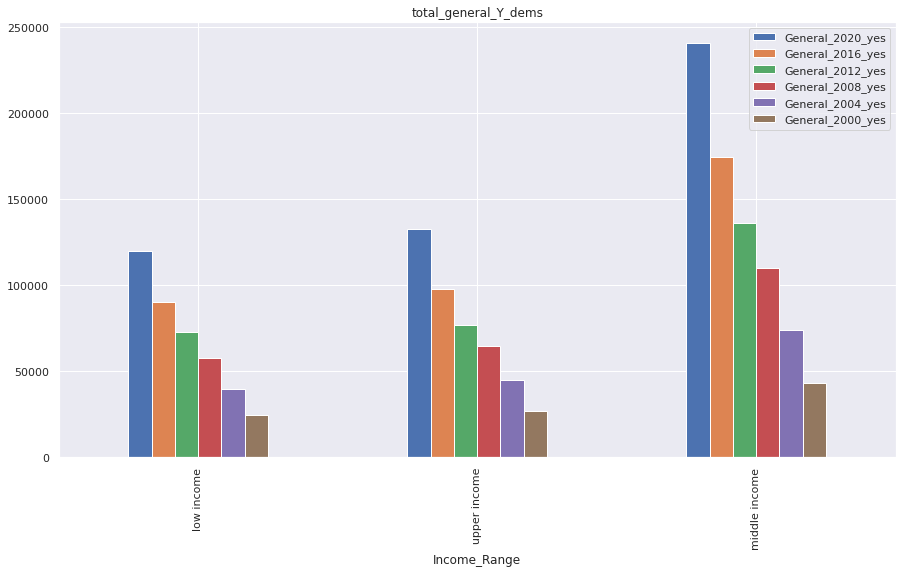

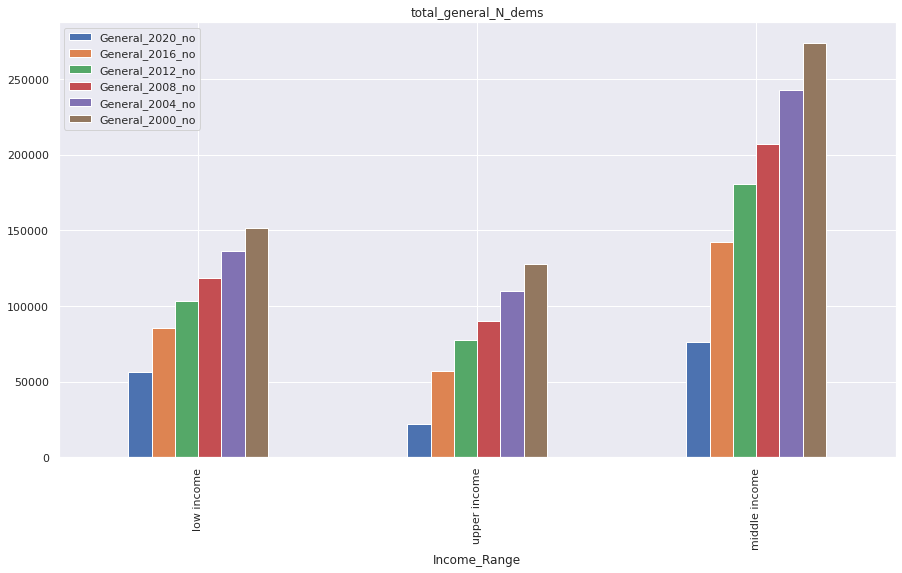

In [120]:
df_total_primary_yes = df_total_primary_yes.toPandas()
df_total_primary_yes.plot(x="Income_Range", y=["Primary_2020_yes", "Primary_2016_yes", "Primary_2012_yes","Primary_2008_yes",'Primary_2004_yes','Primary_2000_yes'], kind="bar")
plt.title('total_primary_Y_dems');

df_total_primary_no = df_total_primary_no.toPandas()
df_total_primary_no.plot(x="Income_Range", y=["Primary_2020_no", "Primary_2016_no", "Primary_2012_no","Primary_2008_no",'Primary_2004_no','Primary_2000_no'], kind="bar")
plt.title('total_primary_N_dems');

df_total_general_yes = df_total_general_yes.toPandas()
df_total_general_yes.plot(x="Income_Range", y=["General_2020_yes", "General_2016_yes", "General_2012_yes","General_2008_yes",'General_2004_yes','General_2000_yes'], kind="bar")
plt.title('total_general_Y_dems');


df_total_general_no = df_total_general_no.toPandas()
df_total_general_no.plot(x="Income_Range", y=["General_2020_no", "General_2016_no", "General_2012_no","General_2008_no",'General_2004_no','General_2000_no'], kind="bar")
plt.title('total_general_N_dems');

Similar to the one before, the number of people who are voting are increasing over time, more observable for general election and less observable for the primary.

### Income demographic breakdown by party - Republican Party

In [121]:
income_reps = income.filter(income.Parties_Description == 'Republican')
income_reps.createOrReplaceTempView("income_table_reps")

In [122]:
# Republican voter who vote in primary in election years
df_total_primary_yes = spark.sql("""
select
      Income_Range,
      sum(case when Primary_2020 == 1 then 1 else 0 end) as Primary_2020_yes,
      sum(case when Primary_2016 == 1 then 1 else 0 end) as Primary_2016_yes,
      sum(case when Primary_2012 == 1 then 1 else 0 end) as Primary_2012_yes,
      sum(case when Primary_2008 == 1 then 1 else 0 end) as Primary_2008_yes,
      sum(case when Primary_2004 == 1 then 1 else 0 end) as Primary_2004_yes,
      sum(case when Primary_2000 == 1 then 1 else 0 end) as Primary_2000_yes
   from
      income_table_reps
   group by Income_Range
""")
df_total_primary_yes.show()

+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
| Income_Range|Primary_2020_yes|Primary_2016_yes|Primary_2012_yes|Primary_2008_yes|Primary_2004_yes|Primary_2000_yes|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   low income|           29096|           17305|           14096|           11030|           12249|            8067|
| upper income|           65041|           30548|           21998|           17758|           21566|           13524|
|middle income|           75355|           38670|           29543|           23359|           27234|           17036|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+



In [123]:
# Republican voter who don't vote in primary in election years
df_total_primary_no = spark.sql("""
select
      Income_Range,
      sum(case when Primary_2020 == 0 then 1 else 0 end) as Primary_2020_no,
      sum(case when Primary_2016 == 0 then 1 else 0 end) as Primary_2016_no,
      sum(case when Primary_2012 == 0 then 1 else 0 end) as Primary_2012_no,
      sum(case when Primary_2008 == 0 then 1 else 0 end) as Primary_2008_no,
      sum(case when Primary_2004 == 0 then 1 else 0 end) as Primary_2004_no,
      sum(case when Primary_2000 == 0 then 1 else 0 end) as Primary_2000_no
   from
      income_table_reps
   group by Income_Range
""")
df_total_primary_no.show()

+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
| Income_Range|Primary_2020_no|Primary_2016_no|Primary_2012_no|Primary_2008_no|Primary_2004_no|Primary_2000_no|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
|   low income|          62269|          74060|          77269|          80335|          79116|          83298|
| upper income|         127148|         161641|         170191|         174431|         170623|         178665|
|middle income|         183569|         220254|         229381|         235565|         231690|         241888|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+



In [124]:
# Republican voter who vote in general in election years
df_total_general_yes = spark.sql("""
select
      Income_Range,
      sum(case when General_2020 == 1 then 1 else 0 end) as General_2020_yes,
      sum(case when General_2016 == 1 then 1 else 0 end) as General_2016_yes,
      sum(case when General_2012 == 1 then 1 else 0 end) as General_2012_yes,
      sum(case when General_2008 == 1 then 1 else 0 end) as General_2008_yes,
      sum(case when General_2004 == 1 then 1 else 0 end) as General_2004_yes,
      sum(case when General_2000 == 1 then 1 else 0 end) as General_2000_yes
   from
      income_table_reps
   group by Income_Range
""")
df_total_general_yes.show()

+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
| Income_Range|General_2020_yes|General_2016_yes|General_2012_yes|General_2008_yes|General_2004_yes|General_2000_yes|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+
|   low income|           70035|           52839|           43576|           37100|           30296|           20121|
| upper income|          169116|          123882|           99868|           83183|           65566|           40844|
|middle income|          207639|          147920|          117934|           98578|           77380|           47923|
+-------------+----------------+----------------+----------------+----------------+----------------+----------------+



In [125]:
# Republican voter who don't vote in general in election years
df_total_general_no = spark.sql("""
select
      Income_Range,
      sum(case when General_2020 == 0 then 1 else 0 end) as General_2020_no,
      sum(case when General_2016 == 0 then 1 else 0 end) as General_2016_no,
      sum(case when General_2012 == 0 then 1 else 0 end) as General_2012_no,
      sum(case when General_2008 == 0 then 1 else 0 end) as General_2008_no,
      sum(case when General_2004 == 0 then 1 else 0 end) as General_2004_no,
      sum(case when General_2000 == 0 then 1 else 0 end) as General_2000_no
   from
      income_table_reps
   group by Income_Range
""")
df_total_general_no.show()

+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
| Income_Range|General_2020_no|General_2016_no|General_2012_no|General_2008_no|General_2004_no|General_2000_no|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+
|   low income|          21330|          38526|          47789|          54265|          61069|          71244|
| upper income|          23073|          68307|          92321|         109006|         126623|         151345|
|middle income|          51285|         111004|         140990|         160346|         181544|         211001|
+-------------+---------------+---------------+---------------+---------------+---------------+---------------+



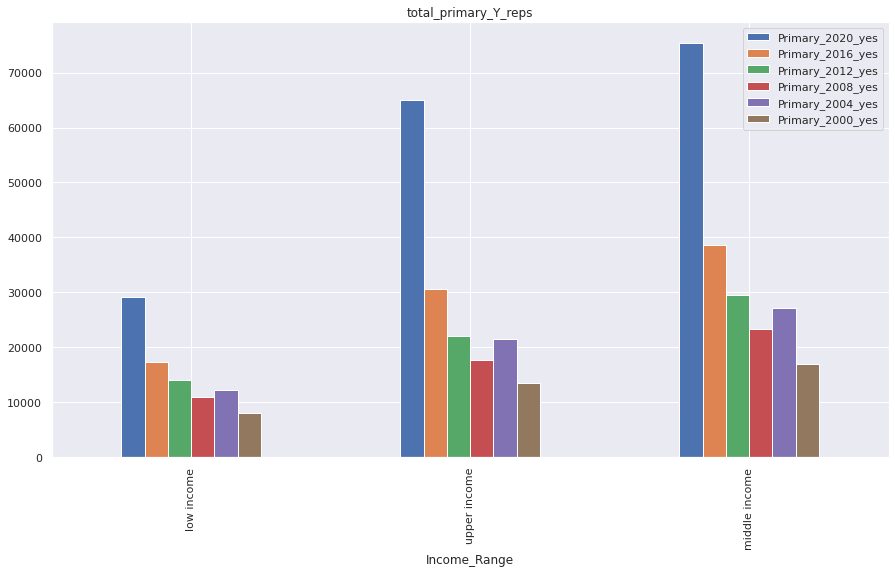

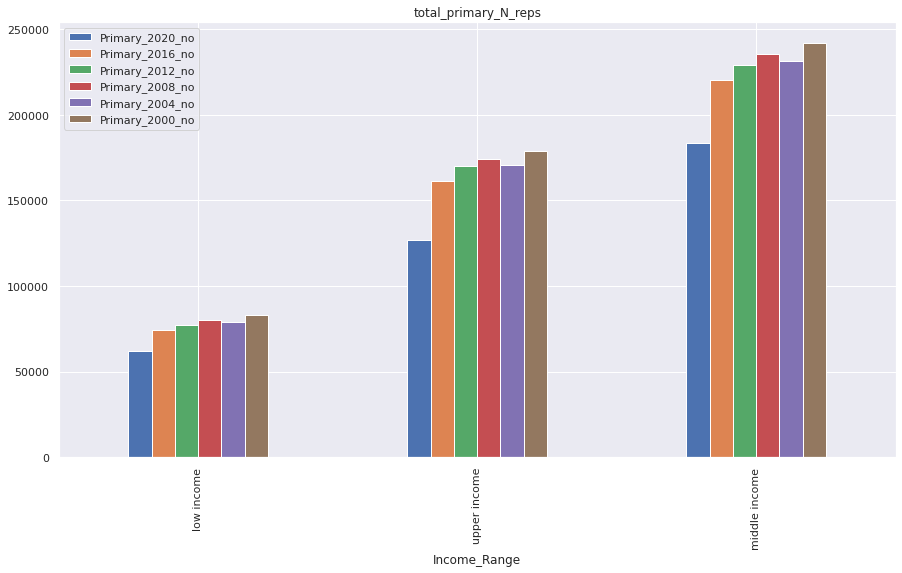

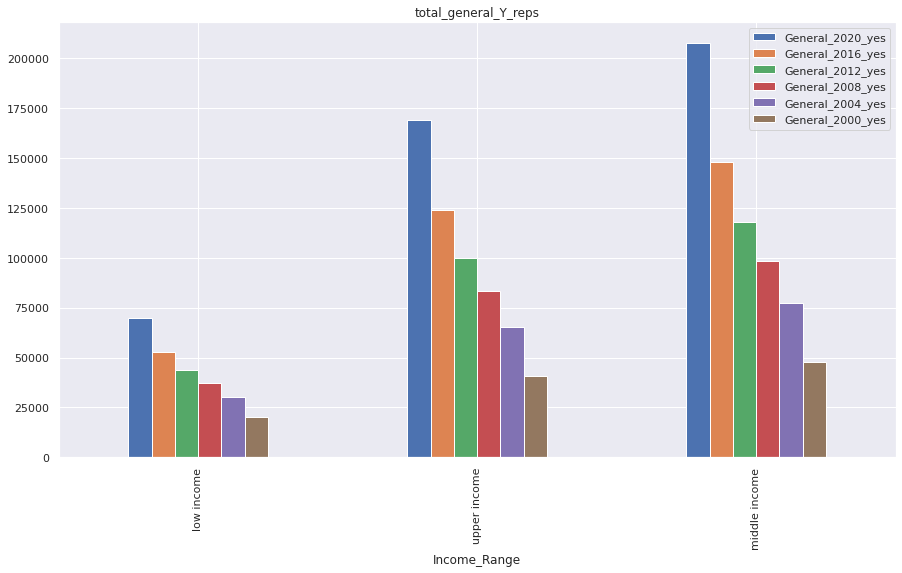

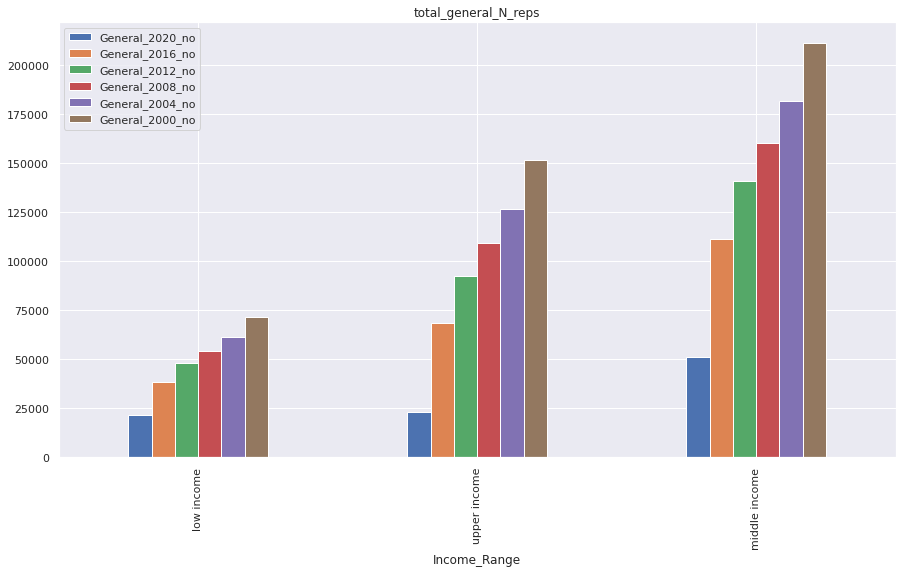

In [126]:
df_total_primary_yes = df_total_primary_yes.toPandas()
df_total_primary_yes.plot(x="Income_Range", y=["Primary_2020_yes", "Primary_2016_yes", "Primary_2012_yes","Primary_2008_yes",'Primary_2004_yes','Primary_2000_yes'], kind="bar")
plt.title('total_primary_Y_reps');

df_total_primary_no = df_total_primary_no.toPandas()
df_total_primary_no.plot(x="Income_Range", y=["Primary_2020_no", "Primary_2016_no", "Primary_2012_no","Primary_2008_no",'Primary_2004_no','Primary_2000_no'], kind="bar")
plt.title('total_primary_N_reps');

df_total_general_yes = df_total_general_yes.toPandas()
df_total_general_yes.plot(x="Income_Range", y=["General_2020_yes", "General_2016_yes", "General_2012_yes","General_2008_yes",'General_2004_yes','General_2000_yes'], kind="bar")
plt.title('total_general_Y_reps');


df_total_general_no = df_total_general_no.toPandas()
df_total_general_no.plot(x="Income_Range", y=["General_2020_no", "General_2016_no", "General_2012_no","General_2008_no",'General_2004_no','General_2000_no'], kind="bar")
plt.title('total_general_N_reps');

Similar to the one before, the number of people who are voting are increasing over time, more observable for general election and less observable for the primary.

## Nevada Public Service EDA

## Nevada model prediction

In [454]:
df_nv = spark.read.format("csv")\
 .option("header", "true")\
 .option("nullValue", "NA")\
 .option("delimiter","\t")\
 .option("inferSchema", "true")\
 .load(data + "VM2Uniform--NV--2021-06-13.tab")

In [455]:
df_big_ml = df_nv.select('Parties_Description',
'Ethnic_Description',
'CommercialData_EstimatedAreaMedianHHIncome',
'CommercialData_ISPSA',              
'Primary_2020')

df_big_ml= df_big_ml.na.fill(value='N')

In [456]:
[(c, df_big_ml.where(col(c).isNull()).count()) for c in df_big_ml.columns]

[('Parties_Description', 0),
 ('Ethnic_Description', 0),
 ('CommercialData_EstimatedAreaMedianHHIncome', 0),
 ('CommercialData_ISPSA', 82382),
 ('Primary_2020', 0)]

In [457]:
df_big_ml = df_big_ml.dropna()

In [458]:
import pyspark.sql.functions as f
df_big_ml = df_big_ml.withColumn('CommercialData_EstimatedAreaMedianHHIncome', f.regexp_replace('CommercialData_EstimatedAreaMedianHHIncome', '[$,]', '').cast('integer'))




In [459]:
df_big_ml.show()

+--------------------+------------------+------------------------------------------+--------------------+------------+
| Parties_Description|Ethnic_Description|CommercialData_EstimatedAreaMedianHHIncome|CommercialData_ISPSA|Primary_2020|
+--------------------+------------------+------------------------------------------+--------------------+------------+
|          Republican|            French|                                     86084|                   7|           N|
|          Democratic|            French|                                     86084|                   7|           N|
|          Republican|            French|                                     86084|                   7|           Y|
|        Non-Partisan|          Hispanic|                                     73076|                   5|           N|
|          Republican|     English/Welsh|                                     83973|                   4|           Y|
|          Republican|           Swedish|       

### Model for training and predicting on primaries

## Democratic Presidential Primary 2020

In [460]:
df_big_ml_dem=df_big_ml.filter(df_big_ml.Parties_Description == 'Democratic')

df_big_ml_dem = df_big_ml_dem.drop('Parties_Description')




df_big_ml_dem.printSchema



<bound method DataFrame.printSchema of DataFrame[Ethnic_Description: string, CommercialData_EstimatedAreaMedianHHIncome: int, CommercialData_ISPSA: int, Primary_2020: string]>

In [461]:
from pyspark.ml.feature import RFormula

supervised = RFormula(formula="Primary_2020 ~ .")

print(supervised)


RFormula(Primary_2020 ~ .) (uid=RFormula_9f4e6ba2fe2f)


In [464]:
import pandas as pd
import numpy as np
from pyspark.sql.functions import *
fittedRF = supervised.fit(df_big_ml_dem)

In [465]:
import pandas as pd
import numpy as np
from pyspark.sql.functions import *

preparedDF = fittedRF.transform(df_big_ml_dem)

In [466]:
preparedDF.select('features', 'label').distinct().show( truncate=False)

+----------------------------------+-----+
|features                          |label|
+----------------------------------+-----+
|(80,[3,78,79],[1.0,82499.0,6.0])  |0.0  |
|(80,[10,78,79],[1.0,78962.0,3.0]) |0.0  |
|(80,[1,78,79],[1.0,88418.0,6.0])  |0.0  |
|(80,[16,78,79],[1.0,88418.0,6.0]) |0.0  |
|(80,[9,78,79],[1.0,72892.0,5.0])  |0.0  |
|(80,[9,78,79],[1.0,137945.0,9.0]) |1.0  |
|(80,[1,78,79],[1.0,92020.0,6.0])  |1.0  |
|(80,[1,78,79],[1.0,90651.0,7.0])  |1.0  |
|(80,[7,78,79],[1.0,165740.0,8.0]) |0.0  |
|(80,[1,78,79],[1.0,104807.0,9.0]) |1.0  |
|(80,[28,78,79],[1.0,78962.0,3.0]) |0.0  |
|(80,[13,78,79],[1.0,83055.0,7.0]) |0.0  |
|(80,[20,78,79],[1.0,73477.0,5.0]) |0.0  |
|(80,[53,78,79],[1.0,71493.0,4.0]) |0.0  |
|(80,[14,78,79],[1.0,70567.0,5.0]) |0.0  |
|(80,[30,78,79],[1.0,74829.0,6.0]) |1.0  |
|(80,[4,78,79],[1.0,104747.0,9.0]) |1.0  |
|(80,[4,78,79],[1.0,110801.0,8.0]) |1.0  |
|(80,[10,78,79],[1.0,130249.0,9.0])|0.0  |
|(80,[5,78,79],[1.0,138919.0,9.0]) |1.0  |
+----------

In [478]:
fittedTest = lrModel_dem.transform(preparedDF)

In [479]:
fittedTest.select("label", "prediction", "rawPrediction").show(30, False)
fittedTest.select('prediction').distinct()

22/05/01 19:37:34 WARN org.apache.spark.scheduler.TaskSetManager: Lost task 0.0 in stage 3105.0 (TID 91395) (bigteamcluster-w-1.c.is843-team3-342902.internal executor 4): org.apache.spark.SparkException: Failed to execute user defined function(ProbabilisticClassificationModel$$Lambda$4535/1899556152: (struct<type:tinyint,size:int,indices:array<int>,values:array<double>>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:755)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:345)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:898)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2

Py4JJavaError: An error occurred while calling o9808.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 3105.0 failed 4 times, most recent failure: Lost task 0.3 in stage 3105.0 (TID 91398) (bigteamcluster-w-0.c.is843-team3-342902.internal executor 1): org.apache.spark.SparkException: Failed to execute user defined function(ProbabilisticClassificationModel$$Lambda$4535/1899556152: (struct<type:tinyint,size:int,indices:array<int>,values:array<double>>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:755)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:345)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:898)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:898)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)
Caused by: java.lang.IllegalArgumentException: requirement failed: BLAS.dot(x: Vector, y:Vector) was given Vectors with non-matching sizes: x.size = 80, y.size = 78
	at scala.Predef$.require(Predef.scala:281)
	at org.apache.spark.ml.linalg.BLAS$.dot(BLAS.scala:115)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1(LogisticRegression.scala:1099)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1$adapted(LogisticRegression.scala:1098)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:1213)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:998)
	at org.apache.spark.ml.classification.ProbabilisticClassificationModel.$anonfun$transform$2(ProbabilisticClassifier.scala:121)
	... 17 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2259)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2208)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2207)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2207)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1079)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2446)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2388)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2377)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:868)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2204)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2225)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2244)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:472)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:425)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:47)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:3696)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:2722)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3687)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:103)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:163)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:90)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:775)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3685)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2722)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2929)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:301)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:338)
	at sun.reflect.GeneratedMethodAccessor213.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:750)
Caused by: org.apache.spark.SparkException: Failed to execute user defined function(ProbabilisticClassificationModel$$Lambda$4535/1899556152: (struct<type:tinyint,size:int,indices:array<int>,values:array<double>>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:755)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:345)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:898)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:898)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
Caused by: java.lang.IllegalArgumentException: requirement failed: BLAS.dot(x: Vector, y:Vector) was given Vectors with non-matching sizes: x.size = 80, y.size = 78
	at scala.Predef$.require(Predef.scala:281)
	at org.apache.spark.ml.linalg.BLAS$.dot(BLAS.scala:115)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1(LogisticRegression.scala:1099)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1$adapted(LogisticRegression.scala:1098)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:1213)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:998)
	at org.apache.spark.ml.classification.ProbabilisticClassificationModel.$anonfun$transform$2(ProbabilisticClassifier.scala:121)
	... 17 more


In [480]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

aucEvaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')

In [504]:
# Your answer goes here
print('Test AUC:', aucEvaluator.evaluate(fittedTest))
print('Train AUC:', summary.areaUnderROC)

22/05/01 19:43:11 WARN org.apache.spark.scheduler.TaskSetManager: Lost task 1.0 in stage 3161.0 (TID 92260) (bigteamcluster-w-1.c.is843-team3-342902.internal executor 4): org.apache.spark.SparkException: Failed to execute user defined function(ProbabilisticClassificationModel$$Lambda$4535/1899556152: (struct<type:tinyint,size:int,indices:array<int>,values:array<double>>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:755)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$

Py4JJavaError: An error occurred while calling o10226.evaluate.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 3161.0 failed 4 times, most recent failure: Lost task 0.3 in stage 3161.0 (TID 92272) (bigteamcluster-w-1.c.is843-team3-342902.internal executor 3): org.apache.spark.SparkException: Failed to execute user defined function(ProbabilisticClassificationModel$$Lambda$4535/1899556152: (struct<type:tinyint,size:int,indices:array<int>,values:array<double>>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:755)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.util.collection.ExternalSorter.insertAll(ExternalSorter.scala:192)
	at org.apache.spark.shuffle.sort.SortShuffleWriter.write(SortShuffleWriter.scala:63)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)
Caused by: java.lang.IllegalArgumentException: requirement failed: BLAS.dot(x: Vector, y:Vector) was given Vectors with non-matching sizes: x.size = 80, y.size = 78
	at scala.Predef$.require(Predef.scala:281)
	at org.apache.spark.ml.linalg.BLAS$.dot(BLAS.scala:115)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1(LogisticRegression.scala:1099)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1$adapted(LogisticRegression.scala:1098)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:1213)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:998)
	at org.apache.spark.ml.classification.ProbabilisticClassificationModel.$anonfun$transform$2(ProbabilisticClassifier.scala:121)
	... 19 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2259)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2208)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2207)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2207)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1079)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2446)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2388)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2377)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:868)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2204)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2225)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2244)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2269)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1030)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1029)
	at org.apache.spark.RangePartitioner$.sketch(Partitioner.scala:304)
	at org.apache.spark.RangePartitioner.<init>(Partitioner.scala:171)
	at org.apache.spark.RangePartitioner.<init>(Partitioner.scala:151)
	at org.apache.spark.rdd.OrderedRDDFunctions.$anonfun$sortByKey$1(OrderedRDDFunctions.scala:63)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.OrderedRDDFunctions.sortByKey(OrderedRDDFunctions.scala:62)
	at org.apache.spark.mllib.evaluation.BinaryClassificationMetrics.x$3$lzycompute(BinaryClassificationMetrics.scala:189)
	at org.apache.spark.mllib.evaluation.BinaryClassificationMetrics.x$3(BinaryClassificationMetrics.scala:178)
	at org.apache.spark.mllib.evaluation.BinaryClassificationMetrics.confusions$lzycompute(BinaryClassificationMetrics.scala:180)
	at org.apache.spark.mllib.evaluation.BinaryClassificationMetrics.confusions(BinaryClassificationMetrics.scala:180)
	at org.apache.spark.mllib.evaluation.BinaryClassificationMetrics.createCurve(BinaryClassificationMetrics.scala:272)
	at org.apache.spark.mllib.evaluation.BinaryClassificationMetrics.roc(BinaryClassificationMetrics.scala:103)
	at org.apache.spark.mllib.evaluation.BinaryClassificationMetrics.areaUnderROC(BinaryClassificationMetrics.scala:123)
	at org.apache.spark.ml.evaluation.BinaryClassificationEvaluator.evaluate(BinaryClassificationEvaluator.scala:102)
	at sun.reflect.GeneratedMethodAccessor310.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:750)
Caused by: org.apache.spark.SparkException: Failed to execute user defined function(ProbabilisticClassificationModel$$Lambda$4535/1899556152: (struct<type:tinyint,size:int,indices:array<int>,values:array<double>>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:755)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.util.collection.ExternalSorter.insertAll(ExternalSorter.scala:192)
	at org.apache.spark.shuffle.sort.SortShuffleWriter.write(SortShuffleWriter.scala:63)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
Caused by: java.lang.IllegalArgumentException: requirement failed: BLAS.dot(x: Vector, y:Vector) was given Vectors with non-matching sizes: x.size = 80, y.size = 78
	at scala.Predef$.require(Predef.scala:281)
	at org.apache.spark.ml.linalg.BLAS$.dot(BLAS.scala:115)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1(LogisticRegression.scala:1099)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1$adapted(LogisticRegression.scala:1098)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:1213)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:998)
	at org.apache.spark.ml.classification.ProbabilisticClassificationModel.$anonfun$transform$2(ProbabilisticClassifier.scala:121)
	... 19 more


## Republican Presidential Primary 2020

In [482]:
df_big_ml_rep=df_big_ml.filter(df_big_ml.Parties_Description == 'Democratic')

df_big_ml_rep = df_big_ml_rep.drop('Parties_Description')




df_big_ml_rep.printSchema



<bound method DataFrame.printSchema of DataFrame[Ethnic_Description: string, CommercialData_EstimatedAreaMedianHHIncome: int, CommercialData_ISPSA: int, Primary_2020: string]>

## Fit data to to run in republican model

In [483]:
from pyspark.ml.feature import RFormula

supervised = RFormula(formula="Primary_2020 ~ .")

print(supervised)


RFormula(Primary_2020 ~ .) (uid=RFormula_ed2e1c27524d)


In [484]:
import pandas as pd
import numpy as np
from pyspark.sql.functions import *
fittedRF = supervised.fit(df_big_ml_rep)

In [494]:
import pandas as pd
import numpy as np
from pyspark.sql.functions import *

preparedDF_rep_nv = fittedRF.transform(df_big_ml_rep)

In [495]:
preparedDF_rep_nv.select('features', 'label').distinct().show( truncate=False)

+----------------------------------+-----+
|features                          |label|
+----------------------------------+-----+
|(80,[3,78,79],[1.0,82499.0,6.0])  |0.0  |
|(80,[10,78,79],[1.0,78962.0,3.0]) |0.0  |
|(80,[1,78,79],[1.0,88418.0,6.0])  |0.0  |
|(80,[16,78,79],[1.0,88418.0,6.0]) |0.0  |
|(80,[9,78,79],[1.0,72892.0,5.0])  |0.0  |
|(80,[9,78,79],[1.0,137945.0,9.0]) |1.0  |
|(80,[1,78,79],[1.0,92020.0,6.0])  |1.0  |
|(80,[1,78,79],[1.0,90651.0,7.0])  |1.0  |
|(80,[7,78,79],[1.0,165740.0,8.0]) |0.0  |
|(80,[1,78,79],[1.0,104807.0,9.0]) |1.0  |
|(80,[28,78,79],[1.0,78962.0,3.0]) |0.0  |
|(80,[13,78,79],[1.0,83055.0,7.0]) |0.0  |
|(80,[20,78,79],[1.0,73477.0,5.0]) |0.0  |
|(80,[53,78,79],[1.0,71493.0,4.0]) |0.0  |
|(80,[14,78,79],[1.0,70567.0,5.0]) |0.0  |
|(80,[30,78,79],[1.0,74829.0,6.0]) |1.0  |
|(80,[4,78,79],[1.0,104747.0,9.0]) |1.0  |
|(80,[4,78,79],[1.0,110801.0,8.0]) |1.0  |
|(80,[10,78,79],[1.0,130249.0,9.0])|0.0  |
|(80,[5,78,79],[1.0,138919.0,9.0]) |1.0  |
+----------

In [499]:
fittedTest = lrModel_rep.transform(preparedDF_rep_nv)

In [500]:
fittedTest.select("label", "prediction", "rawPrediction").show(30, False)
fittedTest.select('prediction').distinct()

22/05/01 19:42:33 WARN org.apache.spark.scheduler.TaskSetManager: Lost task 0.0 in stage 3156.0 (TID 92217) (bigteamcluster-w-1.c.is843-team3-342902.internal executor 4): org.apache.spark.SparkException: Failed to execute user defined function(ProbabilisticClassificationModel$$Lambda$4535/1899556152: (struct<type:tinyint,size:int,indices:array<int>,values:array<double>>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:755)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:345)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:898)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2

Py4JJavaError: An error occurred while calling o10222.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 3156.0 failed 4 times, most recent failure: Lost task 0.3 in stage 3156.0 (TID 92220) (bigteamcluster-w-1.c.is843-team3-342902.internal executor 4): org.apache.spark.SparkException: Failed to execute user defined function(ProbabilisticClassificationModel$$Lambda$4535/1899556152: (struct<type:tinyint,size:int,indices:array<int>,values:array<double>>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:755)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:345)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:898)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:898)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)
Caused by: java.lang.IllegalArgumentException: requirement failed: BLAS.dot(x: Vector, y:Vector) was given Vectors with non-matching sizes: x.size = 80, y.size = 78
	at scala.Predef$.require(Predef.scala:281)
	at org.apache.spark.ml.linalg.BLAS$.dot(BLAS.scala:115)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1(LogisticRegression.scala:1099)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1$adapted(LogisticRegression.scala:1098)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:1213)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:998)
	at org.apache.spark.ml.classification.ProbabilisticClassificationModel.$anonfun$transform$2(ProbabilisticClassifier.scala:121)
	... 17 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2259)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2208)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2207)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2207)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1079)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2446)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2388)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2377)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:868)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2204)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2225)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2244)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:472)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:425)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:47)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:3696)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:2722)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3687)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:103)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:163)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:90)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:775)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3685)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2722)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2929)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:301)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:338)
	at sun.reflect.GeneratedMethodAccessor213.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:750)
Caused by: org.apache.spark.SparkException: Failed to execute user defined function(ProbabilisticClassificationModel$$Lambda$4535/1899556152: (struct<type:tinyint,size:int,indices:array<int>,values:array<double>>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:755)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:345)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:898)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:898)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
Caused by: java.lang.IllegalArgumentException: requirement failed: BLAS.dot(x: Vector, y:Vector) was given Vectors with non-matching sizes: x.size = 80, y.size = 78
	at scala.Predef$.require(Predef.scala:281)
	at org.apache.spark.ml.linalg.BLAS$.dot(BLAS.scala:115)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1(LogisticRegression.scala:1099)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1$adapted(LogisticRegression.scala:1098)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:1213)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:998)
	at org.apache.spark.ml.classification.ProbabilisticClassificationModel.$anonfun$transform$2(ProbabilisticClassifier.scala:121)
	... 17 more


In [501]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

aucEvaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')

In [505]:
# Your answer goes here
print('Test AUC:', aucEvaluator.evaluate(fittedTest))
print('Train AUC:', summary.areaUnderROC)

22/05/01 19:48:33 WARN org.apache.spark.scheduler.TaskSetManager: Lost task 1.0 in stage 3163.0 (TID 92278) (bigteamcluster-w-1.c.is843-team3-342902.internal executor 4): org.apache.spark.SparkException: Failed to execute user defined function(ProbabilisticClassificationModel$$Lambda$4535/1899556152: (struct<type:tinyint,size:int,indices:array<int>,values:array<double>>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:755)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$

Py4JJavaError: An error occurred while calling o10226.evaluate.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 3163.0 failed 4 times, most recent failure: Lost task 1.3 in stage 3163.0 (TID 92290) (bigteamcluster-w-0.c.is843-team3-342902.internal executor 5): org.apache.spark.SparkException: Failed to execute user defined function(ProbabilisticClassificationModel$$Lambda$4535/1899556152: (struct<type:tinyint,size:int,indices:array<int>,values:array<double>>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:755)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.util.collection.ExternalSorter.insertAll(ExternalSorter.scala:192)
	at org.apache.spark.shuffle.sort.SortShuffleWriter.write(SortShuffleWriter.scala:63)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)
Caused by: java.lang.IllegalArgumentException: requirement failed: BLAS.dot(x: Vector, y:Vector) was given Vectors with non-matching sizes: x.size = 80, y.size = 78
	at scala.Predef$.require(Predef.scala:281)
	at org.apache.spark.ml.linalg.BLAS$.dot(BLAS.scala:115)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1(LogisticRegression.scala:1099)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1$adapted(LogisticRegression.scala:1098)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:1213)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:998)
	at org.apache.spark.ml.classification.ProbabilisticClassificationModel.$anonfun$transform$2(ProbabilisticClassifier.scala:121)
	... 19 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2259)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2208)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2207)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2207)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1079)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2446)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2388)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2377)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:868)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2204)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2225)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2244)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2269)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1030)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1029)
	at org.apache.spark.RangePartitioner$.sketch(Partitioner.scala:304)
	at org.apache.spark.RangePartitioner.<init>(Partitioner.scala:171)
	at org.apache.spark.RangePartitioner.<init>(Partitioner.scala:151)
	at org.apache.spark.rdd.OrderedRDDFunctions.$anonfun$sortByKey$1(OrderedRDDFunctions.scala:63)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.OrderedRDDFunctions.sortByKey(OrderedRDDFunctions.scala:62)
	at org.apache.spark.mllib.evaluation.BinaryClassificationMetrics.x$3$lzycompute(BinaryClassificationMetrics.scala:189)
	at org.apache.spark.mllib.evaluation.BinaryClassificationMetrics.x$3(BinaryClassificationMetrics.scala:178)
	at org.apache.spark.mllib.evaluation.BinaryClassificationMetrics.confusions$lzycompute(BinaryClassificationMetrics.scala:180)
	at org.apache.spark.mllib.evaluation.BinaryClassificationMetrics.confusions(BinaryClassificationMetrics.scala:180)
	at org.apache.spark.mllib.evaluation.BinaryClassificationMetrics.createCurve(BinaryClassificationMetrics.scala:272)
	at org.apache.spark.mllib.evaluation.BinaryClassificationMetrics.roc(BinaryClassificationMetrics.scala:103)
	at org.apache.spark.mllib.evaluation.BinaryClassificationMetrics.areaUnderROC(BinaryClassificationMetrics.scala:123)
	at org.apache.spark.ml.evaluation.BinaryClassificationEvaluator.evaluate(BinaryClassificationEvaluator.scala:102)
	at sun.reflect.GeneratedMethodAccessor310.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:750)
Caused by: org.apache.spark.SparkException: Failed to execute user defined function(ProbabilisticClassificationModel$$Lambda$4535/1899556152: (struct<type:tinyint,size:int,indices:array<int>,values:array<double>>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:755)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.util.collection.ExternalSorter.insertAll(ExternalSorter.scala:192)
	at org.apache.spark.shuffle.sort.SortShuffleWriter.write(SortShuffleWriter.scala:63)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
Caused by: java.lang.IllegalArgumentException: requirement failed: BLAS.dot(x: Vector, y:Vector) was given Vectors with non-matching sizes: x.size = 80, y.size = 78
	at scala.Predef$.require(Predef.scala:281)
	at org.apache.spark.ml.linalg.BLAS$.dot(BLAS.scala:115)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1(LogisticRegression.scala:1099)
	at org.apache.spark.ml.classification.LogisticRegressionModel.$anonfun$margin$1$adapted(LogisticRegression.scala:1098)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:1213)
	at org.apache.spark.ml.classification.LogisticRegressionModel.predictRaw(LogisticRegression.scala:998)
	at org.apache.spark.ml.classification.ProbabilisticClassificationModel.$anonfun$transform$2(ProbabilisticClassifier.scala:121)
	... 19 more


# Conclusion

We initally created individual models to find the most important factors for these three categories: Ethnicity, Income, Public Services. We only focused on Iowa since this is the first state that has primary. We then took the top 2-3 features from these models and created a large model to run on all states. We ended up creating two models, one for Democratic candidates and one for Republican candidates. We had to drop the public services features as not all states collected complete data for those features. 